# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:57:03.211331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:57:06.188644
2025-04-14 23:57:06.188644


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:57:01"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

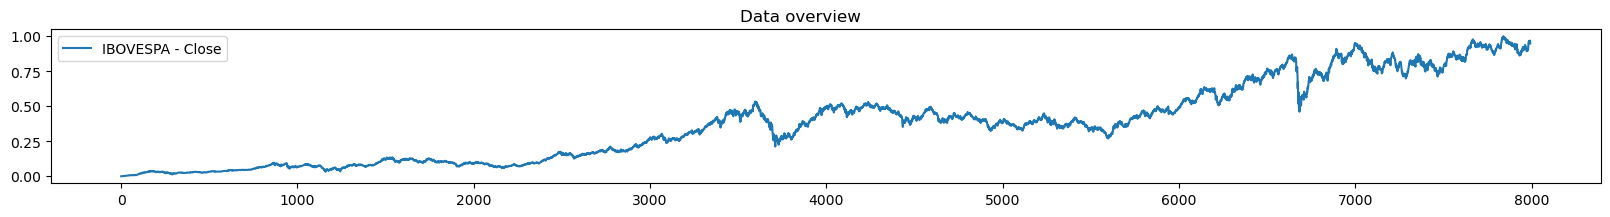

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

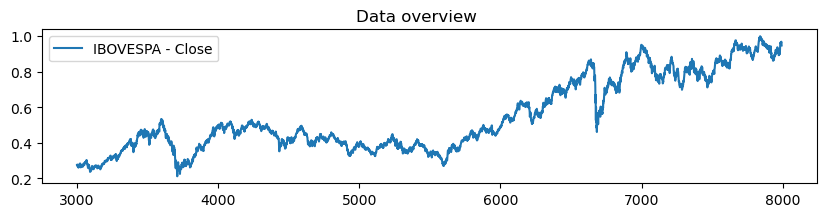

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

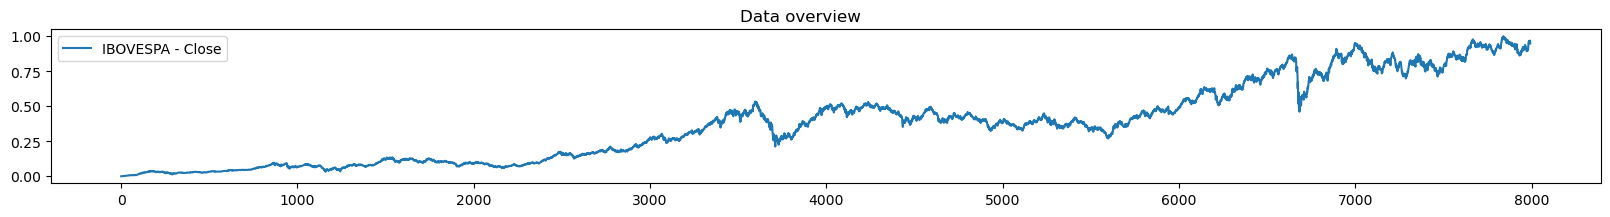

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

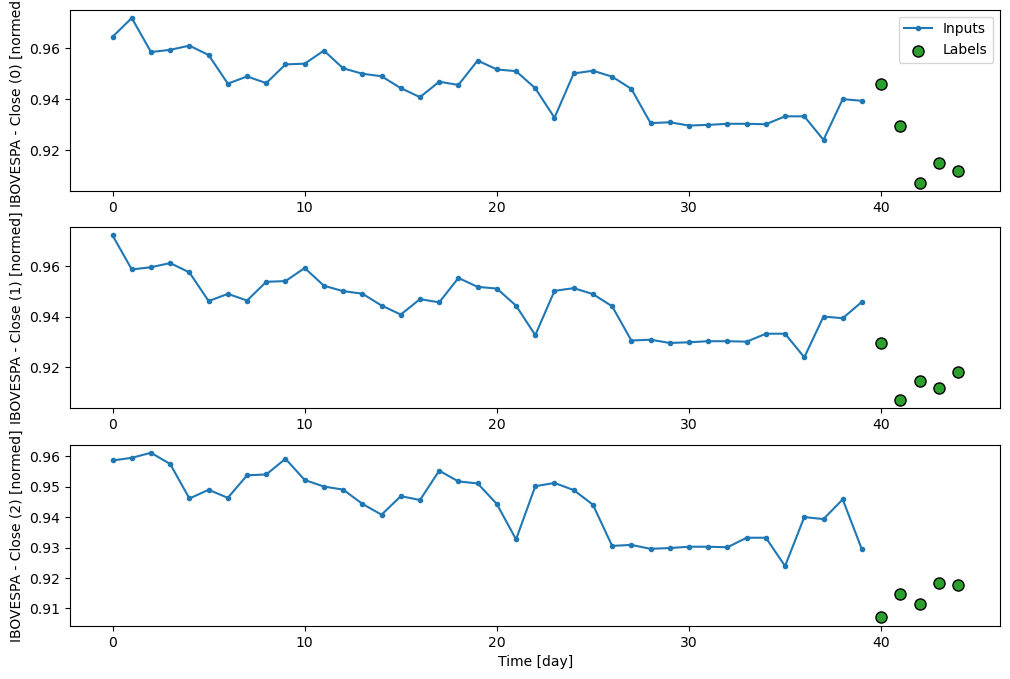

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:15 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 74.8312 - mean_squared_error: 6.6582e-05 - root_mean_squared_error: 0.0080 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.2572 - mean_squared_error: 7.5163e-05 - root_mean_squared_error: 0.0085

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 57.1107 - mean_squared_error: 7.4563e-05 - root_mean_squared_error: 0.0085

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 52.8587 - mean_squared_error: 9.1733e-05 - root_mean_squared_error: 0.0093

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 51.0320 - mean_squared_error: 1.0053e-04 - root_mean_squared_error: 0.0098

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 48.9659 - mean_squared_error: 1.0385e-04 - root_mean_squared_error: 0.0100

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 47.1223 - mean_squared_error: 1.0525e-04 - root_mean_squared_error: 0.0101

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 45.4001 - mean_squared_error: 1.0517e-04 - root_mean_squared_error: 0.0101

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 42.9573 - mean_squared_error: 1.0334e-04 - root_mean_squared_error: 0.0100

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 41.4661 - mean_squared_error: 1.0173e-04 - root_mean_squared_error: 0.0100

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 40.1609 - mean_squared_error: 1.0083e-04 - root_mean_squared_error: 0.0099

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.4630 - mean_squared_error: 1.0110e-04 - root_mean_squared_error: 0.0099

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.5561 - mean_squared_error: 1.0382e-04 - root_mean_squared_error: 0.0101

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 36.7294 - mean_squared_error: 1.0653e-04 - root_mean_squared_error: 0.0102

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 35.9721 - mean_squared_error: 1.0917e-04 - root_mean_squared_error: 0.0103

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.3502 - mean_squared_error: 1.1267e-04 - root_mean_squared_error: 0.0105

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.8482 - mean_squared_error: 1.1679e-04 - root_mean_squared_error: 0.0107

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 34.1748 - mean_squared_error: 1.2282e-04 - root_mean_squared_error: 0.0109

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.7683 - mean_squared_error: 1.2679e-04 - root_mean_squared_error: 0.0111

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.3749 - mean_squared_error: 1.3045e-04 - root_mean_squared_error: 0.0112

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.0006 - mean_squared_error: 1.3440e-04 - root_mean_squared_error: 0.0114

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.7288 - mean_squared_error: 1.5290e-04 - root_mean_squared_error: 0.0119

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.4529 - mean_squared_error: 1.6933e-04 - root_mean_squared_error: 0.0124

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.1721 - mean_squared_error: 1.8383e-04 - root_mean_squared_error: 0.0128

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 32.0303 - mean_squared_error: 1.9044e-04 - root_mean_squared_error: 0.0130

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 31.8886 - mean_squared_error: 1.9667e-04 - root_mean_squared_error: 0.0132

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 31.7478 - mean_squared_error: 2.0255e-04 - root_mean_squared_error: 0.0133

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 31.6073 - mean_squared_error: 2.0809e-04 - root_mean_squared_error: 0.0135

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 31.4681 - mean_squared_error: 2.1333e-04 - root_mean_squared_error: 0.0137

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 31.3355 - mean_squared_error: 2.1840e-04 - root_mean_squared_error: 0.0138

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 31.2023 - mean_squared_error: 2.2316e-04 - root_mean_squared_error: 0.0140

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 31.0710 - mean_squared_error: 2.2769e-04 - root_mean_squared_error: 0.0141

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 30.8151 - mean_squared_error: 2.3612e-04 - root_mean_squared_error: 0.0144

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 30.5645 - mean_squared_error: 2.4371e-04 - root_mean_squared_error: 0.0146

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 30.3408 - mean_squared_error: 2.5097e-04 - root_mean_squared_error: 0.0148

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 30.1287 - mean_squared_error: 2.5765e-04 - root_mean_squared_error: 0.0150

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 29.9168 - mean_squared_error: 2.6365e-04 - root_mean_squared_error: 0.0152

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 29.7194 - mean_squared_error: 2.6944e-04 - root_mean_squared_error: 0.0154

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 29.5384 - mean_squared_error: 2.7551e-04 - root_mean_squared_error: 0.0156

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 29.3755 - mean_squared_error: 2.8289e-04 - root_mean_squared_error: 0.0158

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 29.2210 - mean_squared_error: 2.9064e-04 - root_mean_squared_error: 0.0160

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 29.0719 - mean_squared_error: 2.9824e-04 - root_mean_squared_error: 0.0162

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 28.9202 - mean_squared_error: 3.0523e-04 - root_mean_squared_error: 0.0164

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 28.7687 - mean_squared_error: 3.1178e-04 - root_mean_squared_error: 0.0166

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 28.6174 - mean_squared_error: 3.1794e-04 - root_mean_squared_error: 0.0168

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 28.4655 - mean_squared_error: 3.2365e-04 - root_mean_squared_error: 0.0169

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 28.3134 - mean_squared_error: 3.2901e-04 - root_mean_squared_error: 0.0171

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 28.1647 - mean_squared_error: 3.3454e-04 - root_mean_squared_error: 0.0172

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 28.0185 - mean_squared_error: 3.4024e-04 - root_mean_squared_error: 0.0174

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 27.8779 - mean_squared_error: 3.4687e-04 - root_mean_squared_error: 0.0176

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 27.7410 - mean_squared_error: 3.5395e-04 - root_mean_squared_error: 0.0177

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 27.6052 - mean_squared_error: 3.6099e-04 - root_mean_squared_error: 0.0179

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 27.4073 - mean_squared_error: 3.7258e-04 - root_mean_squared_error: 0.0182

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 27.2775 - mean_squared_error: 3.8073e-04 - root_mean_squared_error: 0.0184

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 27.1472 - mean_squared_error: 3.8853e-04 - root_mean_squared_error: 0.0186

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 27.0160 - mean_squared_error: 3.9590e-04 - root_mean_squared_error: 0.0187

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 26.8847 - mean_squared_error: 4.0308e-04 - root_mean_squared_error: 0.0189

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 26.7581 - mean_squared_error: 4.1225e-04 - root_mean_squared_error: 0.0191

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 26.6470 - mean_squared_error: 4.2898e-04 - root_mean_squared_error: 0.0194

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 26.5955 - mean_squared_error: 4.3869e-04 - root_mean_squared_error: 0.0196

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 26.5452 - mean_squared_error: 4.4846e-04 - root_mean_squared_error: 0.0198

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 26.4945 - mean_squared_error: 4.5799e-04 - root_mean_squared_error: 0.0199

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 26.4446 - mean_squared_error: 4.6759e-04 - root_mean_squared_error: 0.0201

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 26.3956 - mean_squared_error: 4.7747e-04 - root_mean_squared_error: 0.0203

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 26.3481 - mean_squared_error: 4.8816e-04 - root_mean_squared_error: 0.0205

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 26.3024 - mean_squared_error: 5.0036e-04 - root_mean_squared_error: 0.0206

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 26.2585 - mean_squared_error: 5.1447e-04 - root_mean_squared_error: 0.0209

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 26.2163 - mean_squared_error: 5.3028e-04 - root_mean_squared_error: 0.0211

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 26.1756 - mean_squared_error: 5.4735e-04 - root_mean_squared_error: 0.0213

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 26.1360 - mean_squared_error: 5.6544e-04 - root_mean_squared_error: 0.0216

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 26.0969 - mean_squared_error: 5.8348e-04 - root_mean_squared_error: 0.0218

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 26.0183 - mean_squared_error: 6.1858e-04 - root_mean_squared_error: 0.0223

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 25.9385 - mean_squared_error: 6.5220e-04 - root_mean_squared_error: 0.0228

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 25.8571 - mean_squared_error: 6.8424e-04 - root_mean_squared_error: 0.0232

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 25.7742 - mean_squared_error: 7.1476e-04 - root_mean_squared_error: 0.0237

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 25.6482 - mean_squared_error: 7.5804e-04 - root_mean_squared_error: 0.0243

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 25.5643 - mean_squared_error: 7.8563e-04 - root_mean_squared_error: 0.0247

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 25.5232 - mean_squared_error: 7.9956e-04 - root_mean_squared_error: 0.0249

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 25.4827 - mean_squared_error: 8.1361e-04 - root_mean_squared_error: 0.0251

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 25.4422 - mean_squared_error: 8.2741e-04 - root_mean_squared_error: 0.0253

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 25.4014 - mean_squared_error: 8.4089e-04 - root_mean_squared_error: 0.0255

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 25.3604 - mean_squared_error: 8.5406e-04 - root_mean_squared_error: 0.0256

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 25.3191 - mean_squared_error: 8.6693e-04 - root_mean_squared_error: 0.0258

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 25.2778 - mean_squared_error: 8.7954e-04 - root_mean_squared_error: 0.0260

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 25.2363 - mean_squared_error: 8.9186e-04 - root_mean_squared_error: 0.0262

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 25.1947 - mean_squared_error: 9.0391e-04 - root_mean_squared_error: 0.0264

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 25.1531 - mean_squared_error: 9.1573e-04 - root_mean_squared_error: 0.0265

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 25.1115 - mean_squared_error: 9.2731e-04 - root_mean_squared_error: 0.0267

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 25.0291 - mean_squared_error: 9.4993e-04 - root_mean_squared_error: 0.0270

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 24.9878 - mean_squared_error: 9.6089e-04 - root_mean_squared_error: 0.0272

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 24.9467 - mean_squared_error: 9.7165e-04 - root_mean_squared_error: 0.0273

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 24.9056 - mean_squared_error: 9.8219e-04 - root_mean_squared_error: 0.0275

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 24.8644 - mean_squared_error: 9.9250e-04 - root_mean_squared_error: 0.0276

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 24.8231 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0278    

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 24.7819 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 24.7409 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 24.7002 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 24.6598 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 24.5789 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0286

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 24.4987 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 24.4185 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 24.3388 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 24.2599 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

174/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 24.2211 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

175/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 24.1824 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

177/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 24.1060 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 24.0317 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 23.9602 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 23.9254 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 23.8576 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 23.7914 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 23.7264 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 23.6618 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 23.5972 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 23.5330 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

196/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 23.4689 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 23.4056 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 23.3437 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 23.2826 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 23.2216 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 23.1605 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 23.0999 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 23.0414 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 22.9829 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 22.9246 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 22.8673 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 22.8108 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.7546 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 22.6994 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 22.6454 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 22.5917 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 22.5382 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 22.4852 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 22.4068 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 22.3552 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 22.2787 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562 - val_mean_absolute_percentage_error: 5.9439 - val_mean_squared_error: 0.0037 - val_root_mean_squared_error: 0.0612 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.6133 - mean_absolute_error: 0.6133 - mean_absolute_percentage_error: 8239.7744 - mean_squared_error: 0.3761 - root_mean_squared_error: 0.6133

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6188 - mean_absolute_error: 0.6188 - mean_absolute_percentage_error: 6935.2368 - mean_squared_error: 0.3829 - root_mean_squared_error: 0.6188 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6182 - mean_absolute_error: 0.6182 - mean_absolute_percentage_error: 5904.5254 - mean_squared_error: 0.3822 - root_mean_squared_error: 0.6182

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6131 - mean_absolute_error: 0.6131 - mean_absolute_percentage_error: 5235.8735 - mean_squared_error: 0.3762 - root_mean_squared_error: 0.6133

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6033 - mean_absolute_error: 0.6033 - mean_absolute_percentage_error: 4790.4453 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.6043

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5857 - mean_absolute_error: 0.5857 - mean_absolute_percentage_error: 4429.9634 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5907

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5709 - mean_absolute_error: 0.5709 - mean_absolute_percentage_error: 4145.5342 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5784

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5585 - mean_absolute_error: 0.5585 - mean_absolute_percentage_error: 3915.0149 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5676

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5474 - mean_absolute_error: 0.5474 - mean_absolute_percentage_error: 3719.4795 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5577

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5362 - mean_absolute_error: 0.5362 - mean_absolute_percentage_error: 3546.9028 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5479

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5380 - mean_absolute_error: 0.5380 - mean_absolute_percentage_error: 3422.0417 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5727

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5366 - mean_absolute_error: 0.5366 - mean_absolute_percentage_error: 3304.3066 - mean_squared_error: 0.3597 - root_mean_squared_error: 0.5902

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5333 - mean_absolute_error: 0.5333 - mean_absolute_percentage_error: 3193.9172 - mean_squared_error: 0.3752 - root_mean_squared_error: 0.6025

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5255 - mean_absolute_error: 0.5255 - mean_absolute_percentage_error: 3040.3540 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.6140

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5189 - mean_absolute_error: 0.5189 - mean_absolute_percentage_error: 2945.5188 - mean_squared_error: 0.3938 - root_mean_squared_error: 0.6183

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5118 - mean_absolute_error: 0.5118 - mean_absolute_percentage_error: 2856.5571 - mean_squared_error: 0.3962 - root_mean_squared_error: 0.6208

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 2772.8560 - mean_squared_error: 0.3968 - root_mean_squared_error: 0.6218

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4964 - mean_absolute_error: 0.4964 - mean_absolute_percentage_error: 2694.3494 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6217

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4885 - mean_absolute_error: 0.4885 - mean_absolute_percentage_error: 2620.5327 - mean_squared_error: 0.3944 - root_mean_squared_error: 0.6207

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4807 - mean_absolute_error: 0.4807 - mean_absolute_percentage_error: 2550.9578 - mean_squared_error: 0.3919 - root_mean_squared_error: 0.6190

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 2453.9385 - mean_squared_error: 0.3872 - root_mean_squared_error: 0.6156

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4653 - mean_absolute_error: 0.4653 - mean_absolute_percentage_error: 2423.3665 - mean_squared_error: 0.3855 - root_mean_squared_error: 0.6143

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4578 - mean_absolute_error: 0.4578 - mean_absolute_percentage_error: 2364.6396 - mean_squared_error: 0.3818 - root_mean_squared_error: 0.6114

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 2308.9604 - mean_squared_error: 0.3778 - root_mean_squared_error: 0.6082

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - mean_absolute_percentage_error: 2256.1165 - mean_squared_error: 0.3737 - root_mean_squared_error: 0.6049

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2205.8743 - mean_squared_error: 0.3696 - root_mean_squared_error: 0.6014

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 2158.0576 - mean_squared_error: 0.3653 - root_mean_squared_error: 0.5979

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4227 - mean_absolute_error: 0.4227 - mean_absolute_percentage_error: 2112.4946 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5942

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 2090.5078 - mean_squared_error: 0.3589 - root_mean_squared_error: 0.5924

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4163 - mean_absolute_error: 0.4163 - mean_absolute_percentage_error: 2069.0295 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5905

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4100 - mean_absolute_error: 0.4100 - mean_absolute_percentage_error: 2027.5386 - mean_squared_error: 0.3526 - root_mean_squared_error: 0.5868

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 1987.8716 - mean_squared_error: 0.3483 - root_mean_squared_error: 0.5831

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1949.9111 - mean_squared_error: 0.3442 - root_mean_squared_error: 0.5794

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 1913.5554 - mean_squared_error: 0.3401 - root_mean_squared_error: 0.5756

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3866 - mean_absolute_error: 0.3866 - mean_absolute_percentage_error: 1878.7070 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5719

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 1845.2634 - mean_squared_error: 0.3320 - root_mean_squared_error: 0.5683

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3760 - mean_absolute_error: 0.3760 - mean_absolute_percentage_error: 1813.1458 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5646

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3683 - mean_absolute_error: 0.3683 - mean_absolute_percentage_error: 1767.2657 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5592

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1738.1014 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5557

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 1710.0059 - mean_squared_error: 0.3150 - root_mean_squared_error: 0.5522

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 1696.3429 - mean_squared_error: 0.3132 - root_mean_squared_error: 0.5504

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1669.7446 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5470

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1656.7955 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5453

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1631.5691 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5419

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1607.1987 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5386

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1583.6354 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5353

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1560.8383 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5321

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1549.7151 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5305

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 1527.9982 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5273

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1517.3950 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5258

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1496.6830 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5227

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1486.5663 - mean_squared_error: 0.2838 - root_mean_squared_error: 0.5212

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1466.7902 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5182

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1447.5984 - mean_squared_error: 0.2780 - root_mean_squared_error: 0.5152

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1428.9672 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5123

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1410.8724 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.5094

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1393.2902 - mean_squared_error: 0.2697 - root_mean_squared_error: 0.5066

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1376.1954 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.5038

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1359.5673 - mean_squared_error: 0.2645 - root_mean_squared_error: 0.5011

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1351.4231 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4997

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1343.3903 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4984

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1335.4690 - mean_squared_error: 0.2608 - root_mean_squared_error: 0.4970

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1319.9520 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4944

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1304.8481 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4919

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1290.1318 - mean_squared_error: 0.2536 - root_mean_squared_error: 0.4893

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1275.7866 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4868

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1254.9392 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4832

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1241.4677 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4808

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1228.3208 - mean_squared_error: 0.2437 - root_mean_squared_error: 0.4784

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1215.4858 - mean_squared_error: 0.2416 - root_mean_squared_error: 0.4761

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1202.9497 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4738

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1190.7031 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4716

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1178.7382 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4693

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1167.0460 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4671

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1155.6147 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4650

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1144.4332 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4629

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1133.4929 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4608

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1122.7865 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4587

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1112.3073 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4567

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1102.0470 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4547

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1091.9980 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4527

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1082.1528 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4507

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1072.5057 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4488

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1063.0507 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4469

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1058.3931 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4459

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1049.2147 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4441

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1040.2137 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4422

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1031.3853 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4404

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1022.7234 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4386

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1018.4536 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4377

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1014.2239 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4368

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1010.0336 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4359

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1005.8823 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4350

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1001.7695 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4342

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 997.6944 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4333 

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 993.6567 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4325

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 989.6558 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4316

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 985.6913 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4308

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 981.7629 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4299

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 974.0122 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4282

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 966.3995 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4266

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 958.9205 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4250

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 951.5706 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4234

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 944.3464 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4218

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 937.2441 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4202

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 930.2607 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4186

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 926.8130 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4179

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 923.3942 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4171

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 920.0037 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4163

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 916.6410 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4156

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 913.3057 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4148

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 909.9977 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4141

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 906.7166 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4133

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 903.4620 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4126

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 897.0312 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4111

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 890.7026 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4097

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 884.4734 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4082

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 878.3431 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4068

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 875.3143 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.4061

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 869.3276 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.4047

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 863.4328 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.4034

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 857.6269 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4020

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 851.9081 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.4007

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 846.2744 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3994

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 840.7237 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3980

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 835.2541 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3968

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 829.8636 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3955

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 827.1975 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3948

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 821.9226 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3936

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 816.7225 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3923

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 814.1499 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3917

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 806.5401 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3898

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 799.0974 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3880 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353 - val_mean_absolute_percentage_error: 3.7198 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0394 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.4408 - mean_absolute_error: 0.4408 - mean_absolute_percentage_error: 5922.8398 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4409

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 4523.1743 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4368 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 3921.9976 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4323

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - mean_absolute_percentage_error: 3537.0703 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4271

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4169 - mean_absolute_error: 0.4169 - mean_absolute_percentage_error: 3160.7952 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.4178

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 2968.6238 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.4105

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3993 - mean_absolute_error: 0.3993 - mean_absolute_percentage_error: 2803.3381 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.4024

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3834 - mean_absolute_error: 0.3834 - mean_absolute_percentage_error: 2589.4976 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3898

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 2465.2705 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 2352.4509 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3734

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 2249.8572 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3656

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 2156.4092 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3582

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 2070.9963 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3511

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1992.7209 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3443

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1920.7281 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3379

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1886.8488 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3348

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1854.2765 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3318

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1822.9390 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3289

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1792.7668 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.3260

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1763.6936 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3232

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1735.6611 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3205

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1708.6136 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3179

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1682.4967 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.3153

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1657.2637 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.3128

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1632.8732 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.3103

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1609.2805 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.3079

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1586.4430 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.3056

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1564.3281 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.3033

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1522.1281 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2988

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1501.9773 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2967

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1482.4205 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2946

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1444.9822 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2905

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1427.0509 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2886

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1409.6167 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2866

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1392.6588 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2847

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1360.0887 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2811

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1329.1954 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2776

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1299.8495 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2742

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1271.9404 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2709

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1245.3560 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2678

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1220.0099 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2647

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1195.8093 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2618

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1172.6782 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2590

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 1150.5405 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2563

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1129.3285 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2536

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 1108.9806 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2510

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 1089.4432 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2486

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 1070.6683 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2462

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 1052.6093 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2438

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1035.2241 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2416

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 1018.4738 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2394

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 994.4633 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2362 

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 979.1523 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2341

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 964.3638 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2321

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 950.0696 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2302

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 936.2462 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2283

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 922.8693 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2264

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 909.9155 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2246

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 891.2351 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2220

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 879.2534 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2203

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 867.6280 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2187

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 850.8243 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2163

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 840.0218 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2147

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 824.3862 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2125

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 814.3218 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2110

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 804.5314 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2096

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 795.0049 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2081

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 785.7316 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2068

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 776.7002 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2054

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 767.8991 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2041

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 759.3198 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2029

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 750.9536 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2016

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 746.8477 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2010

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 738.7853 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.1998

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 730.9152 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1986

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 723.2306 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1974

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 715.7250 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1962

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 708.3926 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1951

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 701.2267 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1940

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 694.2216 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1929

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 690.7774 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1924

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 684.0024 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1913

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 677.3743 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1903

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 670.8884 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1893

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 664.5402 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1882

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 655.2657 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1868

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 649.2417 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1858

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 643.3402 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1848

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 637.5579 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1839

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 631.8915 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1830

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 626.3369 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1821

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 620.8903 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1812

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 612.9160 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1799

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 605.1685 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1786

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 600.1254 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1778

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 595.1763 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1769

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 590.3182 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1761

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 585.5479 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1753

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 580.8632 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1745

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 576.2614 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1738

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 571.7403 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1730

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 567.2977 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1723

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 562.9315 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1715

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 558.6397 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1708

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 554.4204 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1701

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 550.2717 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1693

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 548.2232 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1690

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 546.1916 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1686

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 544.1767 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1683

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 540.1962 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1676

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 536.2803 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1669

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 532.4283 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1663

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 528.6374 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1656

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 526.7644 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1653

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 523.0630 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1646

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 519.4196 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1640

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 515.8325 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1634

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 512.3006 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1628

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 508.8229 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1622

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 505.3979 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1616

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 502.0241 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1610

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 498.7003 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1604

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 495.4256 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1598

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 492.1989 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1593

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 489.0189 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1587

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 484.3390 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1579 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141 - val_mean_absolute_percentage_error: 1.5220 - val_mean_squared_error: 2.9715e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 3612.3328 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2691

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 3020.2561 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2688 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 2399.8826 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2653

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 2160.2446 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2612

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1987.9204 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2558

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1846.3502 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2493

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1723.4821 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2424

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1574.0991 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2328

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1491.2917 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2270

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1383.4917 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2189

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 1320.9783 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2138

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1264.5653 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2091

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 1213.2500 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.2047

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1166.4763 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2005

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1123.6932 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1966

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 1084.3108 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1929

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 1047.9608 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1894

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 1014.3162 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1861

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 983.0287 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1829 

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 953.8576 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1800

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 913.5983 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1757

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 877.0096 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1718

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 854.4069 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1694

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 833.0869 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1670

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 812.9383 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1647

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 793.8685 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1626

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 775.7847 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1605

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 758.6156 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1585

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 734.4182 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1556

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 719.2350 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1538

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 704.7512 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1521

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 684.2267 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1496

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 671.2795 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1480

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 658.8749 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1464

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 646.9775 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1449

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 635.5561 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1434

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 624.5816 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1420

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 614.0272 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1407

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 603.8674 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1393

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 594.0796 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1380

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 584.6432 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1368

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 575.5389 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1356

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 566.7488 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1344

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 554.1161 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1327

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 546.0410 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1316

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 538.2265 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1305

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 530.6596 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1295

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 523.3284 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1284

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 519.7474 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1279

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 516.2213 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1274

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 512.7486 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1269

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 509.3281 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1265

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 505.9586 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1260

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 502.6390 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1255

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 496.1446 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1246

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 489.8361 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1237

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 486.7492 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1232

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 483.7062 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1228

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 480.7058 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1224

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 477.7472 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1219

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 474.8293 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1215

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 471.9514 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1211

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 469.1125 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1207

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 466.3116 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1203

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 463.5481 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1198

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 458.1299 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1190

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 452.8519 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1183

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 447.7085 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1175

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 442.6945 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1167

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 435.4049 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1156

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 430.6927 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1149

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 426.0934 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1142

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 421.6028 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1135

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 417.2173 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1129

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 412.9330 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1122

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 408.7464 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1116

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 404.6541 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1109

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 398.6848 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1100

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 394.8135 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1094

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 391.0257 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1088

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 387.3182 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1082

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 381.9020 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1073

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 378.3843 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1068

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 374.9384 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1062

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 371.5622 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1057

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 368.2538 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1051

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 365.0105 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1046

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 361.8304 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1041

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 358.7118 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1036

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 355.6526 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1031

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 354.1450 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1028

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 351.1721 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1023

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 348.2544 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1018

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 345.3905 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1014

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 342.5787 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1009

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 339.8176 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1004

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 337.1059 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1000

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 334.4421 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0995

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 331.8249 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0991

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 329.2533 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0986

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 326.7260 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0982

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 324.2417 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0978

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 321.7995 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0974

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 320.5938 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0972

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 318.2122 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0967

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 315.8699 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0963

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 313.5657 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0960

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 312.4279 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0958

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 310.1797 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0954

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 307.9673 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0950

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 305.7899 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0946

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 303.6465 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0942

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 301.5365 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0939

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 299.4589 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0935

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 297.4129 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0932

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 295.3979 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0928

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 293.4133 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0925

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 291.4581 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0921

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 289.5318 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0918

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 287.6336 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0914

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 285.7630 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0911

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 283.9193 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0908

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 282.1050 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0905 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.3015 - val_mean_squared_error: 2.4359e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1338.9877 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1008.4498 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 863.0854 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 758.4096 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 680.9070 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0839

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 623.1443 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0805

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 577.3790 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 538.8838 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 506.3057 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0726

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 478.4422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0706

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 454.0374 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0687

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 432.3314 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0669

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 412.9221 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0653

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 395.3916 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0638

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 379.4921 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0624

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 364.9830 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0611

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 351.6964 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0599

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 345.4674 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 333.7522 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0582

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 322.9400 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0572

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 312.9107 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0562

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 303.5814 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 294.8800 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 286.7365 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 279.0996 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 271.9132 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 265.1425 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 258.7477 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 252.6968 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 246.9624 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 241.5205 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 236.3470 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 231.4220 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 226.7296 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 222.2529 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 217.9759 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 213.8834 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 208.0637 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 204.3814 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 200.8458 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 197.4482 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 194.1790 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 191.0314 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 187.9980 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 185.0731 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 182.2500 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 179.5233 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 176.8880 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 174.3396 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 171.8734 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 169.4851 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 167.1708 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 164.9273 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 162.7512 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 160.6395 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 157.5860 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 155.6233 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 153.7163 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 151.8621 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 150.0580 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 148.3019 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 146.5917 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 144.9254 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 143.3015 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 141.7182 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 140.1739 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 138.6671 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 137.1964 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 135.7606 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 134.3586 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 132.3161 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 130.9933 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 130.3431 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 129.7001 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 129.0643 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 128.4355 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 127.8135 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 126.5899 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 125.9880 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 125.3925 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 124.8034 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 123.6436 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 122.5079 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 121.3955 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 120.3058 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 119.2383 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 118.7125 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 117.6766 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 116.6609 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 115.6649 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 114.6880 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 114.2066 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 113.2575 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 112.3260 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.4118 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 110.0715 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 109.1981 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 108.3403 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 107.4976 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 106.6696 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 105.8561 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 105.0565 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 103.8829 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 102.7385 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 101.9913 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 100.8934 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 100.1767 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 99.4714 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303 

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 98.7773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.0942 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 97.4217 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 96.7597 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 96.1077 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 95.4658 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 94.8336 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 94.2108 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 93.5972 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 92.9927 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 92.3970 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 91.5200 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 91.2325 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 2.2658 - val_mean_squared_error: 6.2073e-04 - val_root_mean_squared_error: 0.0249 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 920.5604 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0695

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 760.9531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0681 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 637.5759 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0656

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 551.2353 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0622

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 491.0855 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 448.6215 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 415.5336 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 387.6048 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 364.2939 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 344.5043 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 327.1091 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 311.7032 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 297.9045 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 285.4411 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 274.1369 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 263.8192 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 254.3486 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 245.6244 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 237.5791 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 230.1335 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 223.2151 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 216.7679 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 210.7440 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 205.1019 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 199.8017 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 194.8085 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 190.0948 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 185.6415 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 181.4239 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 177.4260 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 175.5042 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 173.6308 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 170.0226 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 166.5864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 163.3155 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 161.7359 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 160.1928 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 157.2087 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 155.7641 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 154.3505 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 151.6111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 148.9818 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 146.4560 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 144.0290 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 141.6929 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 139.4427 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 137.2736 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 135.1816 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 133.1618 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 131.2109 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 129.3251 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 127.5012 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 125.7367 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 124.0273 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 122.3707 - mean_squared_error: 9.9842e-04 - root_mean_squared_error: 0.0293

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 120.7643 - mean_squared_error: 9.8622e-04 - root_mean_squared_error: 0.0291

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 119.2058 - mean_squared_error: 9.7447e-04 - root_mean_squared_error: 0.0289

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 117.6931 - mean_squared_error: 9.6316e-04 - root_mean_squared_error: 0.0287

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.2239 - mean_squared_error: 9.5224e-04 - root_mean_squared_error: 0.0285

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 114.7962 - mean_squared_error: 9.4169e-04 - root_mean_squared_error: 0.0284

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 113.4091 - mean_squared_error: 9.3158e-04 - root_mean_squared_error: 0.0282

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 112.0611 - mean_squared_error: 9.2187e-04 - root_mean_squared_error: 0.0281

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.7497 - mean_squared_error: 9.1245e-04 - root_mean_squared_error: 0.0279

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 109.4734 - mean_squared_error: 9.0331e-04 - root_mean_squared_error: 0.0278

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 108.2305 - mean_squared_error: 8.9443e-04 - root_mean_squared_error: 0.0276

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.4255 - mean_squared_error: 8.8157e-04 - root_mean_squared_error: 0.0274

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.2600 - mean_squared_error: 8.7328e-04 - root_mean_squared_error: 0.0273

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.1233 - mean_squared_error: 8.6521e-04 - root_mean_squared_error: 0.0271

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 103.0143 - mean_squared_error: 8.5733e-04 - root_mean_squared_error: 0.0270

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.9319 - mean_squared_error: 8.4964e-04 - root_mean_squared_error: 0.0269

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.3560 - mean_squared_error: 8.3844e-04 - root_mean_squared_error: 0.0267

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.3361 - mean_squared_error: 8.3121e-04 - root_mean_squared_error: 0.0266 

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.3398 - mean_squared_error: 8.2416e-04 - root_mean_squared_error: 0.0265

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 97.3660 - mean_squared_error: 8.1725e-04 - root_mean_squared_error: 0.0263

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.4139 - mean_squared_error: 8.1050e-04 - root_mean_squared_error: 0.0262

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.4832 - mean_squared_error: 8.0393e-04 - root_mean_squared_error: 0.0261

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.5727 - mean_squared_error: 7.9750e-04 - root_mean_squared_error: 0.0260

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.6819 - mean_squared_error: 7.9120e-04 - root_mean_squared_error: 0.0259

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.8101 - mean_squared_error: 7.8503e-04 - root_mean_squared_error: 0.0258

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.9568 - mean_squared_error: 7.7900e-04 - root_mean_squared_error: 0.0257

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.1211 - mean_squared_error: 7.7308e-04 - root_mean_squared_error: 0.0256

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.3026 - mean_squared_error: 7.6727e-04 - root_mean_squared_error: 0.0255

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.1058 - mean_squared_error: 7.5876e-04 - root_mean_squared_error: 0.0253

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.3279 - mean_squared_error: 7.5323e-04 - root_mean_squared_error: 0.0252

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.5654 - mean_squared_error: 7.4781e-04 - root_mean_squared_error: 0.0252

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 86.8178 - mean_squared_error: 7.4249e-04 - root_mean_squared_error: 0.0251

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 86.0847 - mean_squared_error: 7.3726e-04 - root_mean_squared_error: 0.0250

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 85.3656 - mean_squared_error: 7.3214e-04 - root_mean_squared_error: 0.0249

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 84.6602 - mean_squared_error: 7.2710e-04 - root_mean_squared_error: 0.0248

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 83.9682 - mean_squared_error: 7.2218e-04 - root_mean_squared_error: 0.0247

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 83.2889 - mean_squared_error: 7.1734e-04 - root_mean_squared_error: 0.0246

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 82.2933 - mean_squared_error: 7.1024e-04 - root_mean_squared_error: 0.0245

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 81.6444 - mean_squared_error: 7.0562e-04 - root_mean_squared_error: 0.0244

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 81.0071 - mean_squared_error: 7.0107e-04 - root_mean_squared_error: 0.0243

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 80.3811 - mean_squared_error: 6.9661e-04 - root_mean_squared_error: 0.0242

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.4623 - mean_squared_error: 6.9004e-04 - root_mean_squared_error: 0.0241

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 78.5671 - mean_squared_error: 6.8365e-04 - root_mean_squared_error: 0.0240

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 77.9829 - mean_squared_error: 6.7949e-04 - root_mean_squared_error: 0.0239

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 77.1251 - mean_squared_error: 6.7340e-04 - root_mean_squared_error: 0.0238

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 76.5650 - mean_squared_error: 6.6943e-04 - root_mean_squared_error: 0.0238

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 76.0142 - mean_squared_error: 6.6555e-04 - root_mean_squared_error: 0.0237

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 75.4723 - mean_squared_error: 6.6173e-04 - root_mean_squared_error: 0.0236

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 74.9390 - mean_squared_error: 6.5797e-04 - root_mean_squared_error: 0.0235

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 74.1556 - mean_squared_error: 6.5281e-04 - root_mean_squared_error: 0.0235

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 73.3912 - mean_squared_error: 6.4802e-04 - root_mean_squared_error: 0.0234

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 72.8916 - mean_squared_error: 6.4496e-04 - root_mean_squared_error: 0.0233

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 72.1568 - mean_squared_error: 6.4063e-04 - root_mean_squared_error: 0.0233

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 71.6763 - mean_squared_error: 6.3783e-04 - root_mean_squared_error: 0.0232

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 71.2032 - mean_squared_error: 6.3512e-04 - root_mean_squared_error: 0.0232

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 70.7371 - mean_squared_error: 6.3247e-04 - root_mean_squared_error: 0.0231

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 70.2782 - mean_squared_error: 6.2996e-04 - root_mean_squared_error: 0.0231

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 69.8260 - mean_squared_error: 6.2750e-04 - root_mean_squared_error: 0.0230

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 69.3804 - mean_squared_error: 6.2509e-04 - root_mean_squared_error: 0.0230

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 68.9414 - mean_squared_error: 6.2274e-04 - root_mean_squared_error: 0.0230

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 68.5086 - mean_squared_error: 6.2043e-04 - root_mean_squared_error: 0.0229

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 68.0820 - mean_squared_error: 6.1819e-04 - root_mean_squared_error: 0.0229

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 67.4542 - mean_squared_error: 6.1491e-04 - root_mean_squared_error: 0.0228 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1730 - val_mean_squared_error: 1.8053e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 537.0334 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 432.9181 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 354.4378 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 303.2325 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 270.7192 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 246.1858 - mean_squared_error: 9.4250e-04 - root_mean_squared_error: 0.0301

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 226.7020 - mean_squared_error: 8.7433e-04 - root_mean_squared_error: 0.0289

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 211.0364 - mean_squared_error: 8.1853e-04 - root_mean_squared_error: 0.0279

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 197.7494 - mean_squared_error: 7.7009e-04 - root_mean_squared_error: 0.0270

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 186.3982 - mean_squared_error: 7.2823e-04 - root_mean_squared_error: 0.0262

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 176.4515 - mean_squared_error: 6.9106e-04 - root_mean_squared_error: 0.0255

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 167.6680 - mean_squared_error: 6.5792e-04 - root_mean_squared_error: 0.0248

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 159.8286 - mean_squared_error: 6.2814e-04 - root_mean_squared_error: 0.0241

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 152.7901 - mean_squared_error: 6.0135e-04 - root_mean_squared_error: 0.0236

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 146.4397 - mean_squared_error: 5.7717e-04 - root_mean_squared_error: 0.0230

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 140.6846 - mean_squared_error: 5.5523e-04 - root_mean_squared_error: 0.0225

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 135.4353 - mean_squared_error: 5.3516e-04 - root_mean_squared_error: 0.0221

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 128.3791 - mean_squared_error: 5.0811e-04 - root_mean_squared_error: 0.0215

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 124.1542 - mean_squared_error: 4.9189e-04 - root_mean_squared_error: 0.0211

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 120.2527 - mean_squared_error: 4.7690e-04 - root_mean_squared_error: 0.0207

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 114.9176 - mean_squared_error: 4.5640e-04 - root_mean_squared_error: 0.0202

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 111.6621 - mean_squared_error: 4.4389e-04 - root_mean_squared_error: 0.0199

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 108.6188 - mean_squared_error: 4.3228e-04 - root_mean_squared_error: 0.0196

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 104.4050 - mean_squared_error: 4.1628e-04 - root_mean_squared_error: 0.0192

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 101.8007 - mean_squared_error: 4.0638e-04 - root_mean_squared_error: 0.0189

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 99.3442 - mean_squared_error: 3.9704e-04 - root_mean_squared_error: 0.0187 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 97.0240 - mean_squared_error: 3.8823e-04 - root_mean_squared_error: 0.0185

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.8269 - mean_squared_error: 3.7986e-04 - root_mean_squared_error: 0.0183

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 92.7452 - mean_squared_error: 3.7193e-04 - root_mean_squared_error: 0.0180

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 90.7698 - mean_squared_error: 3.6440e-04 - root_mean_squared_error: 0.0178

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 88.8910 - mean_squared_error: 3.5723e-04 - root_mean_squared_error: 0.0176

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 86.2457 - mean_squared_error: 3.4713e-04 - root_mean_squared_error: 0.0174

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 84.5864 - mean_squared_error: 3.4079e-04 - root_mean_squared_error: 0.0172

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.2367 - mean_squared_error: 3.3181e-04 - root_mean_squared_error: 0.0169

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.7545 - mean_squared_error: 3.2614e-04 - root_mean_squared_error: 0.0168

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 79.3337 - mean_squared_error: 3.2070e-04 - root_mean_squared_error: 0.0166

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.3101 - mean_squared_error: 3.1300e-04 - root_mean_squared_error: 0.0164

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.0284 - mean_squared_error: 3.0816e-04 - root_mean_squared_error: 0.0163

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 74.7955 - mean_squared_error: 3.0350e-04 - root_mean_squared_error: 0.0161

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.6087 - mean_squared_error: 2.9903e-04 - root_mean_squared_error: 0.0160

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.4654 - mean_squared_error: 2.9474e-04 - root_mean_squared_error: 0.0159

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.3631 - mean_squared_error: 2.9062e-04 - root_mean_squared_error: 0.0158

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 70.2997 - mean_squared_error: 2.8666e-04 - root_mean_squared_error: 0.0157

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.2725 - mean_squared_error: 2.8284e-04 - root_mean_squared_error: 0.0155

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.2797 - mean_squared_error: 2.7918e-04 - root_mean_squared_error: 0.0154

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.3198 - mean_squared_error: 2.7567e-04 - root_mean_squared_error: 0.0153

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.3910 - mean_squared_error: 2.7230e-04 - root_mean_squared_error: 0.0152

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.4914 - mean_squared_error: 2.6903e-04 - root_mean_squared_error: 0.0151

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.6197 - mean_squared_error: 2.6590e-04 - root_mean_squared_error: 0.0150

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.7744 - mean_squared_error: 2.6288e-04 - root_mean_squared_error: 0.0150

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.9546 - mean_squared_error: 2.6001e-04 - root_mean_squared_error: 0.0149

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.1590 - mean_squared_error: 2.5729e-04 - root_mean_squared_error: 0.0148

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.3866 - mean_squared_error: 2.5470e-04 - root_mean_squared_error: 0.0147

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.6363 - mean_squared_error: 2.5225e-04 - root_mean_squared_error: 0.0146

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.9080 - mean_squared_error: 2.5002e-04 - root_mean_squared_error: 0.0146

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.2008 - mean_squared_error: 2.4796e-04 - root_mean_squared_error: 0.0145

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.5131 - mean_squared_error: 2.4599e-04 - root_mean_squared_error: 0.0145

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.8440 - mean_squared_error: 2.4409e-04 - root_mean_squared_error: 0.0144

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.8730 - mean_squared_error: 2.4138e-04 - root_mean_squared_error: 0.0144

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.2463 - mean_squared_error: 2.3964e-04 - root_mean_squared_error: 0.0143

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.3358 - mean_squared_error: 2.3715e-04 - root_mean_squared_error: 0.0142

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.7475 - mean_squared_error: 2.3555e-04 - root_mean_squared_error: 0.0142

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.1735 - mean_squared_error: 2.3400e-04 - root_mean_squared_error: 0.0142

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.6131 - mean_squared_error: 2.3248e-04 - root_mean_squared_error: 0.0141

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.0659 - mean_squared_error: 2.3098e-04 - root_mean_squared_error: 0.0141

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.5317 - mean_squared_error: 2.2955e-04 - root_mean_squared_error: 0.0140

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.0099 - mean_squared_error: 2.2818e-04 - root_mean_squared_error: 0.0140

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.5001 - mean_squared_error: 2.2685e-04 - root_mean_squared_error: 0.0140

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.0021 - mean_squared_error: 2.2558e-04 - root_mean_squared_error: 0.0139

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.5152 - mean_squared_error: 2.2436e-04 - root_mean_squared_error: 0.0139

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.0389 - mean_squared_error: 2.2316e-04 - root_mean_squared_error: 0.0139

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.5729 - mean_squared_error: 2.2198e-04 - root_mean_squared_error: 0.0138

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.8926 - mean_squared_error: 2.2026e-04 - root_mean_squared_error: 0.0138

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.4511 - mean_squared_error: 2.1915e-04 - root_mean_squared_error: 0.0138

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.0186 - mean_squared_error: 2.1805e-04 - root_mean_squared_error: 0.0137

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.3863 - mean_squared_error: 2.1644e-04 - root_mean_squared_error: 0.0137

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.9754 - mean_squared_error: 2.1538e-04 - root_mean_squared_error: 0.0137

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.5730 - mean_squared_error: 2.1438e-04 - root_mean_squared_error: 0.0137

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.1787 - mean_squared_error: 2.1341e-04 - root_mean_squared_error: 0.0136

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.7920 - mean_squared_error: 2.1246e-04 - root_mean_squared_error: 0.0136

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.4129 - mean_squared_error: 2.1153e-04 - root_mean_squared_error: 0.0136

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.0410 - mean_squared_error: 2.1061e-04 - root_mean_squared_error: 0.0136

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.4966 - mean_squared_error: 2.0927e-04 - root_mean_squared_error: 0.0135

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.1422 - mean_squared_error: 2.0843e-04 - root_mean_squared_error: 0.0135

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.7945 - mean_squared_error: 2.0760e-04 - root_mean_squared_error: 0.0135

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.2847 - mean_squared_error: 2.0641e-04 - root_mean_squared_error: 0.0134

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.9525 - mean_squared_error: 2.0564e-04 - root_mean_squared_error: 0.0134

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.6262 - mean_squared_error: 2.0490e-04 - root_mean_squared_error: 0.0134

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.3057 - mean_squared_error: 2.0418e-04 - root_mean_squared_error: 0.0134

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.9907 - mean_squared_error: 2.0348e-04 - root_mean_squared_error: 0.0134

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.6812 - mean_squared_error: 2.0281e-04 - root_mean_squared_error: 0.0134

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.3772 - mean_squared_error: 2.0220e-04 - root_mean_squared_error: 0.0133

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.0783 - mean_squared_error: 2.0163e-04 - root_mean_squared_error: 0.0133

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.7847 - mean_squared_error: 2.0113e-04 - root_mean_squared_error: 0.0133

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.4959 - mean_squared_error: 2.0068e-04 - root_mean_squared_error: 0.0133

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.2119 - mean_squared_error: 2.0025e-04 - root_mean_squared_error: 0.0133

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.7945 - mean_squared_error: 1.9965e-04 - root_mean_squared_error: 0.0133

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.5220 - mean_squared_error: 1.9941e-04 - root_mean_squared_error: 0.0133

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.2543 - mean_squared_error: 1.9937e-04 - root_mean_squared_error: 0.0133

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.9907 - mean_squared_error: 1.9933e-04 - root_mean_squared_error: 0.0133

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.7314 - mean_squared_error: 1.9937e-04 - root_mean_squared_error: 0.0133

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.4762 - mean_squared_error: 1.9953e-04 - root_mean_squared_error: 0.0133

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.2250 - mean_squared_error: 1.9969e-04 - root_mean_squared_error: 0.0133

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.9776 - mean_squared_error: 1.9992e-04 - root_mean_squared_error: 0.0134

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.7341 - mean_squared_error: 2.0021e-04 - root_mean_squared_error: 0.0134

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.4944 - mean_squared_error: 2.0056e-04 - root_mean_squared_error: 0.0134

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.2583 - mean_squared_error: 2.0101e-04 - root_mean_squared_error: 0.0134

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.0257 - mean_squared_error: 2.0147e-04 - root_mean_squared_error: 0.0134

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.7966 - mean_squared_error: 2.0195e-04 - root_mean_squared_error: 0.0135

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.5709 - mean_squared_error: 2.0248e-04 - root_mean_squared_error: 0.0135

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.3484 - mean_squared_error: 2.0303e-04 - root_mean_squared_error: 0.0135

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.0212 - mean_squared_error: 2.0409e-04 - root_mean_squared_error: 0.0135

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.9139 - mean_squared_error: 2.0445e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306 - val_mean_absolute_percentage_error: 3.2469 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0331 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 807.4517 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0622

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 664.5191 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0606 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 554.6177 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0580

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 478.2585 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 425.9689 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 388.8331 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 359.4246 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 334.8901 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 314.6516 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 297.4222 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 282.3098 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 269.0251 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 257.1592 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 246.4473 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 236.7523 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 227.9084 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 219.7888 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 212.3097 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 205.4138 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 199.0361 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 193.1017 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 187.5707 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 182.4001 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 175.2488 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 173.0085 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 170.8335 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 168.7209 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 166.6682 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 164.6726 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 162.7328 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 160.8467 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 159.0108 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.2226 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 155.4811 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 59/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 153.7869 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 152.1355 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 61/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.5251 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 62/237 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.9545 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 63/237 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 147.4224 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 64/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 145.9264 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 65/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.4668 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 66/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 143.0429 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 67/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 141.6528 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 68/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 140.2936 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 69/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 138.9658 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 70/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 137.6679 - mean_squared_error: 9.9425e-04 - root_mean_squared_error: 0.0297

 71/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 136.3981 - mean_squared_error: 9.8553e-04 - root_mean_squared_error: 0.0296

 72/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 135.1548 - mean_squared_error: 9.7698e-04 - root_mean_squared_error: 0.0294

 73/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.9381 - mean_squared_error: 9.6860e-04 - root_mean_squared_error: 0.0293

 74/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 132.7469 - mean_squared_error: 9.6040e-04 - root_mean_squared_error: 0.0292

 75/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.5798 - mean_squared_error: 9.5235e-04 - root_mean_squared_error: 0.0290

 76/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.4361 - mean_squared_error: 9.4445e-04 - root_mean_squared_error: 0.0289 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 128.2172 - mean_squared_error: 9.2916e-04 - root_mean_squared_error: 0.0286

 79/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 127.1402 - mean_squared_error: 9.2173e-04 - root_mean_squared_error: 0.0285

 80/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 126.0846 - mean_squared_error: 9.1446e-04 - root_mean_squared_error: 0.0284

 81/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 125.0493 - mean_squared_error: 9.0732e-04 - root_mean_squared_error: 0.0282

 83/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 123.0361 - mean_squared_error: 8.9343e-04 - root_mean_squared_error: 0.0280

 84/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 122.0573 - mean_squared_error: 8.8667e-04 - root_mean_squared_error: 0.0279

 85/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 121.0964 - mean_squared_error: 8.8004e-04 - root_mean_squared_error: 0.0278

 87/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.2262 - mean_squared_error: 8.6712e-04 - root_mean_squared_error: 0.0275

 88/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 118.3161 - mean_squared_error: 8.6084e-04 - root_mean_squared_error: 0.0274

 89/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.4222 - mean_squared_error: 8.5468e-04 - root_mean_squared_error: 0.0273

 91/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 115.6802 - mean_squared_error: 8.4267e-04 - root_mean_squared_error: 0.0271

 92/237 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.8315 - mean_squared_error: 8.3682e-04 - root_mean_squared_error: 0.0270

 93/237 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.9974 - mean_squared_error: 8.3109e-04 - root_mean_squared_error: 0.0269

 95/237 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 112.3706 - mean_squared_error: 8.1995e-04 - root_mean_squared_error: 0.0267

 97/237 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 110.7970 - mean_squared_error: 8.0922e-04 - root_mean_squared_error: 0.0265

 99/237 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.2746 - mean_squared_error: 7.9893e-04 - root_mean_squared_error: 0.0263

101/237 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 107.7996 - mean_squared_error: 7.8896e-04 - root_mean_squared_error: 0.0261

103/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.3700 - mean_squared_error: 7.7934e-04 - root_mean_squared_error: 0.0260

104/237 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.6716 - mean_squared_error: 7.7466e-04 - root_mean_squared_error: 0.0259

105/237 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 104.9837 - mean_squared_error: 7.7007e-04 - root_mean_squared_error: 0.0258

107/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 103.6385 - mean_squared_error: 7.6114e-04 - root_mean_squared_error: 0.0256

108/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.9808 - mean_squared_error: 7.5680e-04 - root_mean_squared_error: 0.0256

109/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.3327 - mean_squared_error: 7.5256e-04 - root_mean_squared_error: 0.0255

110/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.6940 - mean_squared_error: 7.4839e-04 - root_mean_squared_error: 0.0254

112/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.4437 - mean_squared_error: 7.4027e-04 - root_mean_squared_error: 0.0253

114/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 99.2286 - mean_squared_error: 7.3245e-04 - root_mean_squared_error: 0.0251 

116/237 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.0481 - mean_squared_error: 7.2503e-04 - root_mean_squared_error: 0.0250

118/237 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.9002 - mean_squared_error: 7.1785e-04 - root_mean_squared_error: 0.0248

120/237 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.7830 - mean_squared_error: 7.1088e-04 - root_mean_squared_error: 0.0247

122/237 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 94.6952 - mean_squared_error: 7.0412e-04 - root_mean_squared_error: 0.0246

125/237 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 93.1158 - mean_squared_error: 6.9433e-04 - root_mean_squared_error: 0.0244

127/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.0960 - mean_squared_error: 6.8803e-04 - root_mean_squared_error: 0.0243

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.1016 - mean_squared_error: 6.8190e-04 - root_mean_squared_error: 0.0242

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.6553 - mean_squared_error: 6.7300e-04 - root_mean_squared_error: 0.0240

134/237 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 88.7198 - mean_squared_error: 6.6723e-04 - root_mean_squared_error: 0.0239

137/237 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.3578 - mean_squared_error: 6.5884e-04 - root_mean_squared_error: 0.0238

139/237 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.4763 - mean_squared_error: 6.5343e-04 - root_mean_squared_error: 0.0237

141/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.6151 - mean_squared_error: 6.4816e-04 - root_mean_squared_error: 0.0236

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.7733 - mean_squared_error: 6.4301e-04 - root_mean_squared_error: 0.0235

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.9504 - mean_squared_error: 6.3797e-04 - root_mean_squared_error: 0.0234

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.1458 - mean_squared_error: 6.3308e-04 - root_mean_squared_error: 0.0233

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.3588 - mean_squared_error: 6.2829e-04 - root_mean_squared_error: 0.0232

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.5887 - mean_squared_error: 6.2361e-04 - root_mean_squared_error: 0.0231

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.8349 - mean_squared_error: 6.1902e-04 - root_mean_squared_error: 0.0230

154/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 80.4640 - mean_squared_error: 6.1676e-04 - root_mean_squared_error: 0.0230

155/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 80.0970 - mean_squared_error: 6.1453e-04 - root_mean_squared_error: 0.0229

156/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.7339 - mean_squared_error: 6.1232e-04 - root_mean_squared_error: 0.0229

158/237 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 79.0187 - mean_squared_error: 6.0795e-04 - root_mean_squared_error: 0.0228

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 78.3180 - mean_squared_error: 6.0366e-04 - root_mean_squared_error: 0.0227

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.6314 - mean_squared_error: 5.9944e-04 - root_mean_squared_error: 0.0227

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 77.2933 - mean_squared_error: 5.9736e-04 - root_mean_squared_error: 0.0226

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.9585 - mean_squared_error: 5.9531e-04 - root_mean_squared_error: 0.0226

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.6271 - mean_squared_error: 5.9328e-04 - root_mean_squared_error: 0.0225

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.9741 - mean_squared_error: 5.8928e-04 - root_mean_squared_error: 0.0225

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 75.3337 - mean_squared_error: 5.8534e-04 - root_mean_squared_error: 0.0224

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 74.7055 - mean_squared_error: 5.8148e-04 - root_mean_squared_error: 0.0223

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 74.0894 - mean_squared_error: 5.7769e-04 - root_mean_squared_error: 0.0222

174/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 73.7857 - mean_squared_error: 5.7582e-04 - root_mean_squared_error: 0.0222

176/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 73.1869 - mean_squared_error: 5.7215e-04 - root_mean_squared_error: 0.0221

178/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 72.5992 - mean_squared_error: 5.6854e-04 - root_mean_squared_error: 0.0221

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 72.3094 - mean_squared_error: 5.6676e-04 - root_mean_squared_error: 0.0220

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 72.0222 - mean_squared_error: 5.6499e-04 - root_mean_squared_error: 0.0220

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 71.4556 - mean_squared_error: 5.6151e-04 - root_mean_squared_error: 0.0219

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 70.8990 - mean_squared_error: 5.5808e-04 - root_mean_squared_error: 0.0219

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 70.3524 - mean_squared_error: 5.5472e-04 - root_mean_squared_error: 0.0218

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 69.8152 - mean_squared_error: 5.5141e-04 - root_mean_squared_error: 0.0217

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 69.2873 - mean_squared_error: 5.4816e-04 - root_mean_squared_error: 0.0217

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 68.7685 - mean_squared_error: 5.4496e-04 - root_mean_squared_error: 0.0216

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 68.2585 - mean_squared_error: 5.4183e-04 - root_mean_squared_error: 0.0215

196/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 67.7570 - mean_squared_error: 5.3875e-04 - root_mean_squared_error: 0.0215

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 67.2640 - mean_squared_error: 5.3574e-04 - root_mean_squared_error: 0.0214

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 66.7790 - mean_squared_error: 5.3279e-04 - root_mean_squared_error: 0.0213

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 66.3020 - mean_squared_error: 5.2989e-04 - root_mean_squared_error: 0.0213

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 65.8327 - mean_squared_error: 5.2705e-04 - root_mean_squared_error: 0.0212

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 65.3709 - mean_squared_error: 5.2426e-04 - root_mean_squared_error: 0.0212

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 64.9167 - mean_squared_error: 5.2167e-04 - root_mean_squared_error: 0.0211

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 64.4701 - mean_squared_error: 5.1934e-04 - root_mean_squared_error: 0.0211

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 64.0304 - mean_squared_error: 5.1705e-04 - root_mean_squared_error: 0.0210

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 63.5978 - mean_squared_error: 5.1487e-04 - root_mean_squared_error: 0.0210

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 63.1719 - mean_squared_error: 5.1282e-04 - root_mean_squared_error: 0.0210

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 62.7525 - mean_squared_error: 5.1081e-04 - root_mean_squared_error: 0.0209

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 62.3395 - mean_squared_error: 5.0889e-04 - root_mean_squared_error: 0.0209

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 61.9328 - mean_squared_error: 5.0702e-04 - root_mean_squared_error: 0.0209

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 61.5322 - mean_squared_error: 5.0524e-04 - root_mean_squared_error: 0.0208

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 61.1376 - mean_squared_error: 5.0354e-04 - root_mean_squared_error: 0.0208

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 60.7488 - mean_squared_error: 5.0187e-04 - root_mean_squared_error: 0.0208

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 60.1761 - mean_squared_error: 4.9947e-04 - root_mean_squared_error: 0.0207

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 59.8012 - mean_squared_error: 4.9791e-04 - root_mean_squared_error: 0.0207

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 59.4317 - mean_squared_error: 4.9641e-04 - root_mean_squared_error: 0.0207

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 59.0675 - mean_squared_error: 4.9494e-04 - root_mean_squared_error: 0.0207

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 58.8877 - mean_squared_error: 4.9421e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1543 - val_mean_squared_error: 1.7634e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 441.5653 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0334

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 353.1330 - mean_squared_error: 9.7337e-04 - root_mean_squared_error: 0.0311

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 287.2419 - mean_squared_error: 8.1948e-04 - root_mean_squared_error: 0.0284

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 232.6472 - mean_squared_error: 6.9300e-04 - root_mean_squared_error: 0.0260

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 211.4554 - mean_squared_error: 6.4583e-04 - root_mean_squared_error: 0.0250

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 194.4188 - mean_squared_error: 6.0317e-04 - root_mean_squared_error: 0.0242

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 181.0527 - mean_squared_error: 5.6953e-04 - root_mean_squared_error: 0.0235

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 169.9031 - mean_squared_error: 5.4023e-04 - root_mean_squared_error: 0.0228

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 160.4008 - mean_squared_error: 5.1474e-04 - root_mean_squared_error: 0.0222

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 152.3159 - mean_squared_error: 4.9377e-04 - root_mean_squared_error: 0.0218

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 145.1667 - mean_squared_error: 4.7465e-04 - root_mean_squared_error: 0.0213

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 135.8848 - mean_squared_error: 4.4971e-04 - root_mean_squared_error: 0.0207

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 130.4383 - mean_squared_error: 4.3491e-04 - root_mean_squared_error: 0.0203

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 125.5081 - mean_squared_error: 4.2165e-04 - root_mean_squared_error: 0.0200

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 121.0366 - mean_squared_error: 4.0977e-04 - root_mean_squared_error: 0.0197

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 116.9275 - mean_squared_error: 3.9863e-04 - root_mean_squared_error: 0.0194

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 113.1514 - mean_squared_error: 3.8827e-04 - root_mean_squared_error: 0.0192

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 109.6688 - mean_squared_error: 3.7855e-04 - root_mean_squared_error: 0.0189

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 106.4433 - mean_squared_error: 3.6943e-04 - root_mean_squared_error: 0.0187

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 103.4347 - mean_squared_error: 3.6080e-04 - root_mean_squared_error: 0.0184

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 99.2823 - mean_squared_error: 3.4869e-04 - root_mean_squared_error: 0.0181 

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 96.7251 - mean_squared_error: 3.4114e-04 - root_mean_squared_error: 0.0179

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 94.3200 - mean_squared_error: 3.3403e-04 - root_mean_squared_error: 0.0177

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.0503 - mean_squared_error: 3.2726e-04 - root_mean_squared_error: 0.0175

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.9035 - mean_squared_error: 3.2079e-04 - root_mean_squared_error: 0.0173

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.8706 - mean_squared_error: 3.1462e-04 - root_mean_squared_error: 0.0171

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.9430 - mean_squared_error: 3.0873e-04 - root_mean_squared_error: 0.0170

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.1110 - mean_squared_error: 3.0307e-04 - root_mean_squared_error: 0.0168

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.3694 - mean_squared_error: 2.9766e-04 - root_mean_squared_error: 0.0166

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 80.7115 - mean_squared_error: 2.9248e-04 - root_mean_squared_error: 0.0165

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.1299 - mean_squared_error: 2.8749e-04 - root_mean_squared_error: 0.0163

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.6219 - mean_squared_error: 2.8272e-04 - root_mean_squared_error: 0.0162

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.1815 - mean_squared_error: 2.7813e-04 - root_mean_squared_error: 0.0160

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.1379 - mean_squared_error: 2.7157e-04 - root_mean_squared_error: 0.0158

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.8455 - mean_squared_error: 2.6739e-04 - root_mean_squared_error: 0.0157

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.6045 - mean_squared_error: 2.6336e-04 - root_mean_squared_error: 0.0155

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.4117 - mean_squared_error: 2.5948e-04 - root_mean_squared_error: 0.0154

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.2650 - mean_squared_error: 2.5575e-04 - root_mean_squared_error: 0.0153

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.1619 - mean_squared_error: 2.5217e-04 - root_mean_squared_error: 0.0152

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.0991 - mean_squared_error: 2.4870e-04 - root_mean_squared_error: 0.0151

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.0742 - mean_squared_error: 2.4536e-04 - root_mean_squared_error: 0.0149

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.0854 - mean_squared_error: 2.4213e-04 - root_mean_squared_error: 0.0148

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.1309 - mean_squared_error: 2.3902e-04 - root_mean_squared_error: 0.0147

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.2085 - mean_squared_error: 2.3601e-04 - root_mean_squared_error: 0.0146

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.3168 - mean_squared_error: 2.3312e-04 - root_mean_squared_error: 0.0145

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.4542 - mean_squared_error: 2.3034e-04 - root_mean_squared_error: 0.0144

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.6194 - mean_squared_error: 2.2768e-04 - root_mean_squared_error: 0.0144

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.4162 - mean_squared_error: 2.2388e-04 - root_mean_squared_error: 0.0142

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.6445 - mean_squared_error: 2.2146e-04 - root_mean_squared_error: 0.0141

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.8958 - mean_squared_error: 2.1913e-04 - root_mean_squared_error: 0.0141

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.1693 - mean_squared_error: 2.1692e-04 - root_mean_squared_error: 0.0140

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.4639 - mean_squared_error: 2.1483e-04 - root_mean_squared_error: 0.0139

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.4436 - mean_squared_error: 2.1192e-04 - root_mean_squared_error: 0.0138

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.7871 - mean_squared_error: 2.1013e-04 - root_mean_squared_error: 0.0138

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.1495 - mean_squared_error: 2.0853e-04 - root_mean_squared_error: 0.0137

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.5300 - mean_squared_error: 2.0707e-04 - root_mean_squared_error: 0.0137

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.9273 - mean_squared_error: 2.0569e-04 - root_mean_squared_error: 0.0136

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.3405 - mean_squared_error: 2.0436e-04 - root_mean_squared_error: 0.0136

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.7687 - mean_squared_error: 2.0308e-04 - root_mean_squared_error: 0.0135

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.2113 - mean_squared_error: 2.0185e-04 - root_mean_squared_error: 0.0135

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.6677 - mean_squared_error: 2.0065e-04 - root_mean_squared_error: 0.0135

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.1375 - mean_squared_error: 1.9951e-04 - root_mean_squared_error: 0.0134

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6200 - mean_squared_error: 1.9840e-04 - root_mean_squared_error: 0.0134

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.8665 - mean_squared_error: 1.9677e-04 - root_mean_squared_error: 0.0134

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.3787 - mean_squared_error: 1.9572e-04 - root_mean_squared_error: 0.0133

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.9021 - mean_squared_error: 1.9469e-04 - root_mean_squared_error: 0.0133

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.2077 - mean_squared_error: 1.9324e-04 - root_mean_squared_error: 0.0132

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7578 - mean_squared_error: 1.9231e-04 - root_mean_squared_error: 0.0132

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.1017 - mean_squared_error: 1.9099e-04 - root_mean_squared_error: 0.0132

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.4667 - mean_squared_error: 1.8972e-04 - root_mean_squared_error: 0.0131

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.0545 - mean_squared_error: 1.8888e-04 - root_mean_squared_error: 0.0131

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.4525 - mean_squared_error: 1.8767e-04 - root_mean_squared_error: 0.0131

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.8689 - mean_squared_error: 1.8649e-04 - root_mean_squared_error: 0.0130

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.4897 - mean_squared_error: 1.8571e-04 - root_mean_squared_error: 0.0130

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.1180 - mean_squared_error: 1.8494e-04 - root_mean_squared_error: 0.0130

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.7536 - mean_squared_error: 1.8418e-04 - root_mean_squared_error: 0.0130

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.3966 - mean_squared_error: 1.8346e-04 - root_mean_squared_error: 0.0130

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.0465 - mean_squared_error: 1.8276e-04 - root_mean_squared_error: 0.0129

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.7032 - mean_squared_error: 1.8207e-04 - root_mean_squared_error: 0.0129

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.3664 - mean_squared_error: 1.8139e-04 - root_mean_squared_error: 0.0129

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.0360 - mean_squared_error: 1.8072e-04 - root_mean_squared_error: 0.0129

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.7118 - mean_squared_error: 1.8007e-04 - root_mean_squared_error: 0.0129

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.3937 - mean_squared_error: 1.7945e-04 - root_mean_squared_error: 0.0128

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.0815 - mean_squared_error: 1.7886e-04 - root_mean_squared_error: 0.0128

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.7749 - mean_squared_error: 1.7828e-04 - root_mean_squared_error: 0.0128

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.4739 - mean_squared_error: 1.7771e-04 - root_mean_squared_error: 0.0128

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.1781 - mean_squared_error: 1.7717e-04 - root_mean_squared_error: 0.0128

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.8876 - mean_squared_error: 1.7664e-04 - root_mean_squared_error: 0.0127

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.6021 - mean_squared_error: 1.7613e-04 - root_mean_squared_error: 0.0127

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.1828 - mean_squared_error: 1.7538e-04 - root_mean_squared_error: 0.0127

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 37.9094 - mean_squared_error: 1.7494e-04 - root_mean_squared_error: 0.0127

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 37.6405 - mean_squared_error: 1.7452e-04 - root_mean_squared_error: 0.0127

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.3762 - mean_squared_error: 1.7416e-04 - root_mean_squared_error: 0.0127

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.9881 - mean_squared_error: 1.7372e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.7346 - mean_squared_error: 1.7345e-04 - root_mean_squared_error: 0.0127

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.4851 - mean_squared_error: 1.7321e-04 - root_mean_squared_error: 0.0127

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 36.2397 - mean_squared_error: 1.7299e-04 - root_mean_squared_error: 0.0127

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.9985 - mean_squared_error: 1.7305e-04 - root_mean_squared_error: 0.0127

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.7612 - mean_squared_error: 1.7315e-04 - root_mean_squared_error: 0.0127

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.5275 - mean_squared_error: 1.7326e-04 - root_mean_squared_error: 0.0127

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.2976 - mean_squared_error: 1.7348e-04 - root_mean_squared_error: 0.0127

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.0712 - mean_squared_error: 1.7373e-04 - root_mean_squared_error: 0.0127

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 34.8483 - mean_squared_error: 1.7399e-04 - root_mean_squared_error: 0.0127

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 34.6287 - mean_squared_error: 1.7431e-04 - root_mean_squared_error: 0.0127

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 34.4124 - mean_squared_error: 1.7465e-04 - root_mean_squared_error: 0.0128

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 34.1994 - mean_squared_error: 1.7507e-04 - root_mean_squared_error: 0.0128

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 33.8858 - mean_squared_error: 1.7573e-04 - root_mean_squared_error: 0.0128

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 33.6805 - mean_squared_error: 1.7619e-04 - root_mean_squared_error: 0.0128

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 33.4781 - mean_squared_error: 1.7666e-04 - root_mean_squared_error: 0.0128

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 33.2787 - mean_squared_error: 1.7715e-04 - root_mean_squared_error: 0.0129

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 33.0821 - mean_squared_error: 1.7772e-04 - root_mean_squared_error: 0.0129

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 32.8887 - mean_squared_error: 1.7829e-04 - root_mean_squared_error: 0.0129 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2706 - val_mean_squared_error: 2.2946e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 721.3048 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0561

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 590.5297 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0543 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 453.4685 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 397.2292 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0471

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 344.3562 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 318.3547 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 296.7863 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 279.0681 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 263.9359 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 244.5889 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 233.5381 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 218.9477 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 210.3571 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 202.5235 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 191.9577 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 185.5995 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 179.7215 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 174.2611 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 169.1691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 164.4128 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 159.9576 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 155.7772 - mean_squared_error: 9.7968e-04 - root_mean_squared_error: 0.0299

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 153.7817 - mean_squared_error: 9.6780e-04 - root_mean_squared_error: 0.0297

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 149.9640 - mean_squared_error: 9.4505e-04 - root_mean_squared_error: 0.0293

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 146.3586 - mean_squared_error: 9.2350e-04 - root_mean_squared_error: 0.0289

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 142.9518 - mean_squared_error: 9.0312e-04 - root_mean_squared_error: 0.0286

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 139.7240 - mean_squared_error: 8.8376e-04 - root_mean_squared_error: 0.0282

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 136.6635 - mean_squared_error: 8.6535e-04 - root_mean_squared_error: 0.0279

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 133.7570 - mean_squared_error: 8.4783e-04 - root_mean_squared_error: 0.0276

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.9928 - mean_squared_error: 8.3114e-04 - root_mean_squared_error: 0.0273

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 128.3604 - mean_squared_error: 8.1520e-04 - root_mean_squared_error: 0.0270

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.8540 - mean_squared_error: 8.0000e-04 - root_mean_squared_error: 0.0267

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 123.4625 - mean_squared_error: 7.8547e-04 - root_mean_squared_error: 0.0264

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 121.1793 - mean_squared_error: 7.7158e-04 - root_mean_squared_error: 0.0261

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.9927 - mean_squared_error: 7.5825e-04 - root_mean_squared_error: 0.0259

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 116.8970 - mean_squared_error: 7.4546e-04 - root_mean_squared_error: 0.0256

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 114.8851 - mean_squared_error: 7.3317e-04 - root_mean_squared_error: 0.0254

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.9527 - mean_squared_error: 7.2140e-04 - root_mean_squared_error: 0.0252

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.0951 - mean_squared_error: 7.1008e-04 - root_mean_squared_error: 0.0250

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.3069 - mean_squared_error: 6.9918e-04 - root_mean_squared_error: 0.0247

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 107.5836 - mean_squared_error: 6.8867e-04 - root_mean_squared_error: 0.0245

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 105.1136 - mean_squared_error: 6.7360e-04 - root_mean_squared_error: 0.0242

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 103.5386 - mean_squared_error: 6.6401e-04 - root_mean_squared_error: 0.0240

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 102.0174 - mean_squared_error: 6.5474e-04 - root_mean_squared_error: 0.0239

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.5471 - mean_squared_error: 6.4582e-04 - root_mean_squared_error: 0.0237

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.1253 - mean_squared_error: 6.3722e-04 - root_mean_squared_error: 0.0235 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.0789 - mean_squared_error: 6.2495e-04 - root_mean_squared_error: 0.0232

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.1278 - mean_squared_error: 6.1331e-04 - root_mean_squared_error: 0.0230

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.8766 - mean_squared_error: 6.0589e-04 - root_mean_squared_error: 0.0229

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.6631 - mean_squared_error: 5.9875e-04 - root_mean_squared_error: 0.0227

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.4853 - mean_squared_error: 5.9189e-04 - root_mean_squared_error: 0.0226

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 90.3419 - mean_squared_error: 5.8533e-04 - root_mean_squared_error: 0.0224

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.2309 - mean_squared_error: 5.7900e-04 - root_mean_squared_error: 0.0223

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.1513 - mean_squared_error: 5.7292e-04 - root_mean_squared_error: 0.0222

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.1030 - mean_squared_error: 5.6723e-04 - root_mean_squared_error: 0.0221

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.0837 - mean_squared_error: 5.6175e-04 - root_mean_squared_error: 0.0220

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.0919 - mean_squared_error: 5.5643e-04 - root_mean_squared_error: 0.0219

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.1263 - mean_squared_error: 5.5127e-04 - root_mean_squared_error: 0.0217

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.1857 - mean_squared_error: 5.4629e-04 - root_mean_squared_error: 0.0216

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.2690 - mean_squared_error: 5.4145e-04 - root_mean_squared_error: 0.0216

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.3753 - mean_squared_error: 5.3675e-04 - root_mean_squared_error: 0.0215

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.5038 - mean_squared_error: 5.3218e-04 - root_mean_squared_error: 0.0214

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.6534 - mean_squared_error: 5.2773e-04 - root_mean_squared_error: 0.0213

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.4157 - mean_squared_error: 5.2126e-04 - root_mean_squared_error: 0.0211

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.6147 - mean_squared_error: 5.1707e-04 - root_mean_squared_error: 0.0211

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.8326 - mean_squared_error: 5.1301e-04 - root_mean_squared_error: 0.0210

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.6928 - mean_squared_error: 5.0709e-04 - root_mean_squared_error: 0.0209

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.9544 - mean_squared_error: 5.0327e-04 - root_mean_squared_error: 0.0208

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.2325 - mean_squared_error: 4.9955e-04 - root_mean_squared_error: 0.0207

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.5265 - mean_squared_error: 4.9591e-04 - root_mean_squared_error: 0.0206

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.8356 - mean_squared_error: 4.9235e-04 - root_mean_squared_error: 0.0206

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.1596 - mean_squared_error: 4.8886e-04 - root_mean_squared_error: 0.0205

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.4979 - mean_squared_error: 4.8545e-04 - root_mean_squared_error: 0.0204

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.5311 - mean_squared_error: 4.8045e-04 - root_mean_squared_error: 0.0203

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.9030 - mean_squared_error: 4.7718e-04 - root_mean_squared_error: 0.0202

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.5937 - mean_squared_error: 4.7558e-04 - root_mean_squared_error: 0.0202

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.9845 - mean_squared_error: 4.7240e-04 - root_mean_squared_error: 0.0201

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.3874 - mean_squared_error: 4.6929e-04 - root_mean_squared_error: 0.0201

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.8023 - mean_squared_error: 4.6626e-04 - root_mean_squared_error: 0.0200

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.2286 - mean_squared_error: 4.6327e-04 - root_mean_squared_error: 0.0199

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.6659 - mean_squared_error: 4.6034e-04 - root_mean_squared_error: 0.0199

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.1140 - mean_squared_error: 4.5747e-04 - root_mean_squared_error: 0.0198

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.5726 - mean_squared_error: 4.5464e-04 - root_mean_squared_error: 0.0198

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.7795 - mean_squared_error: 4.5052e-04 - root_mean_squared_error: 0.0197

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.2631 - mean_squared_error: 4.4784e-04 - root_mean_squared_error: 0.0196

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.7560 - mean_squared_error: 4.4521e-04 - root_mean_squared_error: 0.0196

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.2580 - mean_squared_error: 4.4263e-04 - root_mean_squared_error: 0.0195

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.7688 - mean_squared_error: 4.4010e-04 - root_mean_squared_error: 0.0194

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.2883 - mean_squared_error: 4.3761e-04 - root_mean_squared_error: 0.0194

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.5831 - mean_squared_error: 4.3396e-04 - root_mean_squared_error: 0.0193

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.1231 - mean_squared_error: 4.3158e-04 - root_mean_squared_error: 0.0193

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.6709 - mean_squared_error: 4.2926e-04 - root_mean_squared_error: 0.0192

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.0068 - mean_squared_error: 4.2586e-04 - root_mean_squared_error: 0.0191

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.5734 - mean_squared_error: 4.2366e-04 - root_mean_squared_error: 0.0191

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.1470 - mean_squared_error: 4.2152e-04 - root_mean_squared_error: 0.0190

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 58.7276 - mean_squared_error: 4.1941e-04 - root_mean_squared_error: 0.0190

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.3150 - mean_squared_error: 4.1735e-04 - root_mean_squared_error: 0.0190

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 57.9089 - mean_squared_error: 4.1534e-04 - root_mean_squared_error: 0.0189

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 57.5098 - mean_squared_error: 4.1367e-04 - root_mean_squared_error: 0.0189

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 57.1171 - mean_squared_error: 4.1209e-04 - root_mean_squared_error: 0.0188

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 56.7306 - mean_squared_error: 4.1055e-04 - root_mean_squared_error: 0.0188

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 56.3503 - mean_squared_error: 4.0920e-04 - root_mean_squared_error: 0.0188

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.9759 - mean_squared_error: 4.0793e-04 - root_mean_squared_error: 0.0188

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.6073 - mean_squared_error: 4.0672e-04 - root_mean_squared_error: 0.0188

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 55.2444 - mean_squared_error: 4.0566e-04 - root_mean_squared_error: 0.0187

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 54.8870 - mean_squared_error: 4.0466e-04 - root_mean_squared_error: 0.0187

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 54.3611 - mean_squared_error: 4.0332e-04 - root_mean_squared_error: 0.0187

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 54.0169 - mean_squared_error: 4.0248e-04 - root_mean_squared_error: 0.0187

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 53.6778 - mean_squared_error: 4.0168e-04 - root_mean_squared_error: 0.0187

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 53.3437 - mean_squared_error: 4.0094e-04 - root_mean_squared_error: 0.0187

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 53.0143 - mean_squared_error: 4.0024e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 52.5295 - mean_squared_error: 3.9935e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 52.3705 - mean_squared_error: 3.9906e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.4005 - val_mean_squared_error: 2.7772e-04 - val_root_mean_squared_error: 0.0167 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 455.2908 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 368.5169 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 280.3834 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 246.6639 - mean_squared_error: 9.5297e-04 - root_mean_squared_error: 0.0305

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 215.3129 - mean_squared_error: 8.5432e-04 - root_mean_squared_error: 0.0288

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 199.5201 - mean_squared_error: 8.0049e-04 - root_mean_squared_error: 0.0279

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 186.9612 - mean_squared_error: 7.5850e-04 - root_mean_squared_error: 0.0271

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 176.4129 - mean_squared_error: 7.2296e-04 - root_mean_squared_error: 0.0264

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 167.1922 - mean_squared_error: 6.9050e-04 - root_mean_squared_error: 0.0258

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 155.3049 - mean_squared_error: 6.4706e-04 - root_mean_squared_error: 0.0249

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 148.4314 - mean_squared_error: 6.2148e-04 - root_mean_squared_error: 0.0244

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 139.3626 - mean_squared_error: 5.8744e-04 - root_mean_squared_error: 0.0236

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 134.0423 - mean_squared_error: 5.6787e-04 - root_mean_squared_error: 0.0232

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 129.2276 - mean_squared_error: 5.5047e-04 - root_mean_squared_error: 0.0228

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 122.7571 - mean_squared_error: 5.2700e-04 - root_mean_squared_error: 0.0223

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 118.8876 - mean_squared_error: 5.1293e-04 - root_mean_squared_error: 0.0220

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 115.3175 - mean_squared_error: 4.9984e-04 - root_mean_squared_error: 0.0217

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 111.9989 - mean_squared_error: 4.8754e-04 - root_mean_squared_error: 0.0214

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.9038 - mean_squared_error: 4.7598e-04 - root_mean_squared_error: 0.0211

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 106.0054 - mean_squared_error: 4.6503e-04 - root_mean_squared_error: 0.0208

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 103.2822 - mean_squared_error: 4.5468e-04 - root_mean_squared_error: 0.0206

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 100.7211 - mean_squared_error: 4.4495e-04 - root_mean_squared_error: 0.0204

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.3063 - mean_squared_error: 4.3574e-04 - root_mean_squared_error: 0.0201 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.9256 - mean_squared_error: 4.2271e-04 - root_mean_squared_error: 0.0198

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.8213 - mean_squared_error: 4.1457e-04 - root_mean_squared_error: 0.0196

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.8239 - mean_squared_error: 4.0679e-04 - root_mean_squared_error: 0.0194

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.9274 - mean_squared_error: 3.9936e-04 - root_mean_squared_error: 0.0192

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.1251 - mean_squared_error: 3.9227e-04 - root_mean_squared_error: 0.0190

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.5831 - mean_squared_error: 3.8223e-04 - root_mean_squared_error: 0.0187

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.9926 - mean_squared_error: 3.7597e-04 - root_mean_squared_error: 0.0186

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.7468 - mean_squared_error: 3.6710e-04 - root_mean_squared_error: 0.0183

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.6530 - mean_squared_error: 3.5884e-04 - root_mean_squared_error: 0.0181

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.3291 - mean_squared_error: 3.5360e-04 - root_mean_squared_error: 0.0180

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.0573 - mean_squared_error: 3.4854e-04 - root_mean_squared_error: 0.0178

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.8344 - mean_squared_error: 3.4370e-04 - root_mean_squared_error: 0.0177

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.0856 - mean_squared_error: 3.3677e-04 - root_mean_squared_error: 0.0175

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.9721 - mean_squared_error: 3.3234e-04 - root_mean_squared_error: 0.0174

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.8974 - mean_squared_error: 3.2805e-04 - root_mean_squared_error: 0.0173

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.8598 - mean_squared_error: 3.2391e-04 - root_mean_squared_error: 0.0172

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.8579 - mean_squared_error: 3.1992e-04 - root_mean_squared_error: 0.0170

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.4170 - mean_squared_error: 3.1420e-04 - root_mean_squared_error: 0.0169

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.4959 - mean_squared_error: 3.1060e-04 - root_mean_squared_error: 0.0168

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.1694 - mean_squared_error: 3.0552e-04 - root_mean_squared_error: 0.0166

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.9063 - mean_squared_error: 3.0089e-04 - root_mean_squared_error: 0.0165

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.0957 - mean_squared_error: 2.9794e-04 - root_mean_squared_error: 0.0164

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.9254 - mean_squared_error: 2.9387e-04 - root_mean_squared_error: 0.0163

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.1734 - mean_squared_error: 2.9134e-04 - root_mean_squared_error: 0.0162

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.4429 - mean_squared_error: 2.8899e-04 - root_mean_squared_error: 0.0162

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.7330 - mean_squared_error: 2.8682e-04 - root_mean_squared_error: 0.0161

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.0425 - mean_squared_error: 2.8477e-04 - root_mean_squared_error: 0.0161

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.3714 - mean_squared_error: 2.8292e-04 - root_mean_squared_error: 0.0160

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.7192 - mean_squared_error: 2.8125e-04 - root_mean_squared_error: 0.0160

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.7734 - mean_squared_error: 2.7890e-04 - root_mean_squared_error: 0.0159

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.1639 - mean_squared_error: 2.7753e-04 - root_mean_squared_error: 0.0159

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.5699 - mean_squared_error: 2.7627e-04 - root_mean_squared_error: 0.0159

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.9906 - mean_squared_error: 2.7506e-04 - root_mean_squared_error: 0.0158

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.4257 - mean_squared_error: 2.7398e-04 - root_mean_squared_error: 0.0158

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6041 - mean_squared_error: 2.7251e-04 - root_mean_squared_error: 0.0158

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.0725 - mean_squared_error: 2.7159e-04 - root_mean_squared_error: 0.0158

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.2977 - mean_squared_error: 2.7023e-04 - root_mean_squared_error: 0.0157

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.5495 - mean_squared_error: 2.6897e-04 - root_mean_squared_error: 0.0157

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.0646 - mean_squared_error: 2.6817e-04 - root_mean_squared_error: 0.0157

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.3574 - mean_squared_error: 2.6703e-04 - root_mean_squared_error: 0.0157

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.6730 - mean_squared_error: 2.6593e-04 - root_mean_squared_error: 0.0156

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.2288 - mean_squared_error: 2.6521e-04 - root_mean_squared_error: 0.0156

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.7937 - mean_squared_error: 2.6448e-04 - root_mean_squared_error: 0.0156

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.3674 - mean_squared_error: 2.6376e-04 - root_mean_squared_error: 0.0156

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.9499 - mean_squared_error: 2.6303e-04 - root_mean_squared_error: 0.0156

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.3392 - mean_squared_error: 2.6193e-04 - root_mean_squared_error: 0.0156

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 46.9419 - mean_squared_error: 2.6120e-04 - root_mean_squared_error: 0.0155

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.3605 - mean_squared_error: 2.6010e-04 - root_mean_squared_error: 0.0155

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.9822 - mean_squared_error: 2.5938e-04 - root_mean_squared_error: 0.0155

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.6113 - mean_squared_error: 2.5867e-04 - root_mean_squared_error: 0.0155

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.2473 - mean_squared_error: 2.5797e-04 - root_mean_squared_error: 0.0155

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 44.8900 - mean_squared_error: 2.5726e-04 - root_mean_squared_error: 0.0154

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 44.5394 - mean_squared_error: 2.5656e-04 - root_mean_squared_error: 0.0154

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 44.1952 - mean_squared_error: 2.5587e-04 - root_mean_squared_error: 0.0154

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 43.8573 - mean_squared_error: 2.5519e-04 - root_mean_squared_error: 0.0154

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 43.5254 - mean_squared_error: 2.5452e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 43.1994 - mean_squared_error: 2.5385e-04 - root_mean_squared_error: 0.0154

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 42.8790 - mean_squared_error: 2.5318e-04 - root_mean_squared_error: 0.0154

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 42.5641 - mean_squared_error: 2.5252e-04 - root_mean_squared_error: 0.0153

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 42.2546 - mean_squared_error: 2.5187e-04 - root_mean_squared_error: 0.0153

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.7999 - mean_squared_error: 2.5089e-04 - root_mean_squared_error: 0.0153

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.5031 - mean_squared_error: 2.5025e-04 - root_mean_squared_error: 0.0153

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.0670 - mean_squared_error: 2.4932e-04 - root_mean_squared_error: 0.0153

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.7822 - mean_squared_error: 2.4871e-04 - root_mean_squared_error: 0.0152

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.5020 - mean_squared_error: 2.4812e-04 - root_mean_squared_error: 0.0152

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 40.2262 - mean_squared_error: 2.4754e-04 - root_mean_squared_error: 0.0152

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 39.9548 - mean_squared_error: 2.4697e-04 - root_mean_squared_error: 0.0152

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 39.6876 - mean_squared_error: 2.4642e-04 - root_mean_squared_error: 0.0152

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 39.4245 - mean_squared_error: 2.4587e-04 - root_mean_squared_error: 0.0152

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 39.1658 - mean_squared_error: 2.4558e-04 - root_mean_squared_error: 0.0152

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.9111 - mean_squared_error: 2.4532e-04 - root_mean_squared_error: 0.0152

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.6603 - mean_squared_error: 2.4506e-04 - root_mean_squared_error: 0.0152

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.4134 - mean_squared_error: 2.4485e-04 - root_mean_squared_error: 0.0152

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 38.0498 - mean_squared_error: 2.4458e-04 - root_mean_squared_error: 0.0152

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.8119 - mean_squared_error: 2.4441e-04 - root_mean_squared_error: 0.0152

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.5774 - mean_squared_error: 2.4426e-04 - root_mean_squared_error: 0.0152

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.2322 - mean_squared_error: 2.4409e-04 - root_mean_squared_error: 0.0152

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.0062 - mean_squared_error: 2.4400e-04 - root_mean_squared_error: 0.0152

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 36.6733 - mean_squared_error: 2.4391e-04 - root_mean_squared_error: 0.0152

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 36.4552 - mean_squared_error: 2.4386e-04 - root_mean_squared_error: 0.0152

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 36.2401 - mean_squared_error: 2.4382e-04 - root_mean_squared_error: 0.0152

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 35.9232 - mean_squared_error: 2.4377e-04 - root_mean_squared_error: 0.0152

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 35.8192 - mean_squared_error: 2.4375e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1910 - val_mean_squared_error: 2.0567e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 334.6063 - mean_squared_error: 7.0786e-04 - root_mean_squared_error: 0.0266

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 259.7980 - mean_squared_error: 5.8421e-04 - root_mean_squared_error: 0.0241 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 193.2781 - mean_squared_error: 4.5698e-04 - root_mean_squared_error: 0.0211

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 161.5589 - mean_squared_error: 4.0000e-04 - root_mean_squared_error: 0.0197

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 147.1790 - mean_squared_error: 3.7023e-04 - root_mean_squared_error: 0.0189

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 131.5106 - mean_squared_error: 3.3783e-04 - root_mean_squared_error: 0.0180

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 119.5640 - mean_squared_error: 3.1132e-04 - root_mean_squared_error: 0.0173

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 112.9847 - mean_squared_error: 2.9612e-04 - root_mean_squared_error: 0.0168

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 104.6516 - mean_squared_error: 2.7660e-04 - root_mean_squared_error: 0.0162

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 97.6378 - mean_squared_error: 2.5978e-04 - root_mean_squared_error: 0.0157 

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 93.5405 - mean_squared_error: 2.4989e-04 - root_mean_squared_error: 0.0153

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 89.8396 - mean_squared_error: 2.4100e-04 - root_mean_squared_error: 0.0150

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 86.4735 - mean_squared_error: 2.3289e-04 - root_mean_squared_error: 0.0148

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 83.3907 - mean_squared_error: 2.2539e-04 - root_mean_squared_error: 0.0145

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 80.5634 - mean_squared_error: 2.1846e-04 - root_mean_squared_error: 0.0143

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 77.9669 - mean_squared_error: 2.1207e-04 - root_mean_squared_error: 0.0140

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 75.5738 - mean_squared_error: 2.0617e-04 - root_mean_squared_error: 0.0138

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 73.3495 - mean_squared_error: 2.0066e-04 - root_mean_squared_error: 0.0136

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 71.2792 - mean_squared_error: 1.9551e-04 - root_mean_squared_error: 0.0134

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 69.3435 - mean_squared_error: 1.9069e-04 - root_mean_squared_error: 0.0132

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 67.5296 - mean_squared_error: 1.8619e-04 - root_mean_squared_error: 0.0131

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 65.8258 - mean_squared_error: 1.8197e-04 - root_mean_squared_error: 0.0129

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 64.2198 - mean_squared_error: 1.7797e-04 - root_mean_squared_error: 0.0127

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 62.7036 - mean_squared_error: 1.7420e-04 - root_mean_squared_error: 0.0126

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 61.2706 - mean_squared_error: 1.7063e-04 - root_mean_squared_error: 0.0125

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 59.9131 - mean_squared_error: 1.6723e-04 - root_mean_squared_error: 0.0123

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.0065 - mean_squared_error: 1.6245e-04 - root_mean_squared_error: 0.0121

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 56.8151 - mean_squared_error: 1.5945e-04 - root_mean_squared_error: 0.0120

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 55.6821 - mean_squared_error: 1.5660e-04 - root_mean_squared_error: 0.0119

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.6039 - mean_squared_error: 1.5389e-04 - root_mean_squared_error: 0.0118

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.5771 - mean_squared_error: 1.5130e-04 - root_mean_squared_error: 0.0117

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 52.5963 - mean_squared_error: 1.4881e-04 - root_mean_squared_error: 0.0116

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 51.6574 - mean_squared_error: 1.4642e-04 - root_mean_squared_error: 0.0115

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 50.7575 - mean_squared_error: 1.4413e-04 - root_mean_squared_error: 0.0114

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 49.8942 - mean_squared_error: 1.4192e-04 - root_mean_squared_error: 0.0113

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 49.0656 - mean_squared_error: 1.3983e-04 - root_mean_squared_error: 0.0112

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 48.2709 - mean_squared_error: 1.3786e-04 - root_mean_squared_error: 0.0111

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 47.5063 - mean_squared_error: 1.3597e-04 - root_mean_squared_error: 0.0110

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 46.7704 - mean_squared_error: 1.3416e-04 - root_mean_squared_error: 0.0109

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 46.0613 - mean_squared_error: 1.3243e-04 - root_mean_squared_error: 0.0109

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 45.3778 - mean_squared_error: 1.3077e-04 - root_mean_squared_error: 0.0108

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.7181 - mean_squared_error: 1.2918e-04 - root_mean_squared_error: 0.0107

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 44.0808 - mean_squared_error: 1.2766e-04 - root_mean_squared_error: 0.0107

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 43.4647 - mean_squared_error: 1.2620e-04 - root_mean_squared_error: 0.0106

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.8690 - mean_squared_error: 1.2482e-04 - root_mean_squared_error: 0.0105

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.2929 - mean_squared_error: 1.2353e-04 - root_mean_squared_error: 0.0105

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.7347 - mean_squared_error: 1.2228e-04 - root_mean_squared_error: 0.0104

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.1937 - mean_squared_error: 1.2109e-04 - root_mean_squared_error: 0.0104

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.6690 - mean_squared_error: 1.1995e-04 - root_mean_squared_error: 0.0103

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.1599 - mean_squared_error: 1.1890e-04 - root_mean_squared_error: 0.0103

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.6659 - mean_squared_error: 1.1791e-04 - root_mean_squared_error: 0.0102

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.1864 - mean_squared_error: 1.1705e-04 - root_mean_squared_error: 0.0102

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.7204 - mean_squared_error: 1.1626e-04 - root_mean_squared_error: 0.0102

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.0467 - mean_squared_error: 1.1531e-04 - root_mean_squared_error: 0.0101

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.6143 - mean_squared_error: 1.1486e-04 - root_mean_squared_error: 0.0101

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.1937 - mean_squared_error: 1.1445e-04 - root_mean_squared_error: 0.0101

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.7849 - mean_squared_error: 1.1414e-04 - root_mean_squared_error: 0.0101

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.3870 - mean_squared_error: 1.1390e-04 - root_mean_squared_error: 0.0101

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.8091 - mean_squared_error: 1.1361e-04 - root_mean_squared_error: 0.0101

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.2534 - mean_squared_error: 1.1350e-04 - root_mean_squared_error: 0.0101

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.8943 - mean_squared_error: 1.1346e-04 - root_mean_squared_error: 0.0101

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.3719 - mean_squared_error: 1.1344e-04 - root_mean_squared_error: 0.0101

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.0337 - mean_squared_error: 1.1343e-04 - root_mean_squared_error: 0.0101

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.7036 - mean_squared_error: 1.1346e-04 - root_mean_squared_error: 0.0102

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.3814 - mean_squared_error: 1.1352e-04 - root_mean_squared_error: 0.0102

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.0665 - mean_squared_error: 1.1360e-04 - root_mean_squared_error: 0.0102

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.9118 - mean_squared_error: 1.1365e-04 - root_mean_squared_error: 0.0102

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.7588 - mean_squared_error: 1.1370e-04 - root_mean_squared_error: 0.0102

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.6075 - mean_squared_error: 1.1375e-04 - root_mean_squared_error: 0.0102

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.4579 - mean_squared_error: 1.1380e-04 - root_mean_squared_error: 0.0102

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.3099 - mean_squared_error: 1.1384e-04 - root_mean_squared_error: 0.0102

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.1635 - mean_squared_error: 1.1389e-04 - root_mean_squared_error: 0.0102

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.0186 - mean_squared_error: 1.1393e-04 - root_mean_squared_error: 0.0102

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.7334 - mean_squared_error: 1.1400e-04 - root_mean_squared_error: 0.0102

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.4542 - mean_squared_error: 1.1407e-04 - root_mean_squared_error: 0.0102

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.1808 - mean_squared_error: 1.1413e-04 - root_mean_squared_error: 0.0102

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.0463 - mean_squared_error: 1.1416e-04 - root_mean_squared_error: 0.0102

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.7812 - mean_squared_error: 1.1421e-04 - root_mean_squared_error: 0.0103

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.5215 - mean_squared_error: 1.1425e-04 - root_mean_squared_error: 0.0103

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.2669 - mean_squared_error: 1.1428e-04 - root_mean_squared_error: 0.0103

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.0174 - mean_squared_error: 1.1432e-04 - root_mean_squared_error: 0.0103

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.7730 - mean_squared_error: 1.1436e-04 - root_mean_squared_error: 0.0103

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.5333 - mean_squared_error: 1.1441e-04 - root_mean_squared_error: 0.0103

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.2981 - mean_squared_error: 1.1444e-04 - root_mean_squared_error: 0.0103

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.0674 - mean_squared_error: 1.1448e-04 - root_mean_squared_error: 0.0103

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.8411 - mean_squared_error: 1.1450e-04 - root_mean_squared_error: 0.0103

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.6191 - mean_squared_error: 1.1455e-04 - root_mean_squared_error: 0.0103

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.5097 - mean_squared_error: 1.1458e-04 - root_mean_squared_error: 0.0103

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.2940 - mean_squared_error: 1.1465e-04 - root_mean_squared_error: 0.0103

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.0823 - mean_squared_error: 1.1472e-04 - root_mean_squared_error: 0.0103

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.8744 - mean_squared_error: 1.1480e-04 - root_mean_squared_error: 0.0103

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.6703 - mean_squared_error: 1.1489e-04 - root_mean_squared_error: 0.0103

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.4697 - mean_squared_error: 1.1498e-04 - root_mean_squared_error: 0.0104

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.2727 - mean_squared_error: 1.1510e-04 - root_mean_squared_error: 0.0104

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.0791 - mean_squared_error: 1.1524e-04 - root_mean_squared_error: 0.0104

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.8889 - mean_squared_error: 1.1539e-04 - root_mean_squared_error: 0.0104

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.7020 - mean_squared_error: 1.1560e-04 - root_mean_squared_error: 0.0104

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.5184 - mean_squared_error: 1.1582e-04 - root_mean_squared_error: 0.0104

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.3378 - mean_squared_error: 1.1608e-04 - root_mean_squared_error: 0.0104

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.1603 - mean_squared_error: 1.1638e-04 - root_mean_squared_error: 0.0104

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 25.9856 - mean_squared_error: 1.1667e-04 - root_mean_squared_error: 0.0105

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 25.8136 - mean_squared_error: 1.1697e-04 - root_mean_squared_error: 0.0105

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 25.6444 - mean_squared_error: 1.1728e-04 - root_mean_squared_error: 0.0105

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 25.3962 - mean_squared_error: 1.1819e-04 - root_mean_squared_error: 0.0105

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.2340 - mean_squared_error: 1.1881e-04 - root_mean_squared_error: 0.0106

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.0744 - mean_squared_error: 1.1947e-04 - root_mean_squared_error: 0.0106

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 24.9174 - mean_squared_error: 1.2022e-04 - root_mean_squared_error: 0.0106

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 24.7627 - mean_squared_error: 1.2095e-04 - root_mean_squared_error: 0.0107

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 24.5351 - mean_squared_error: 1.2214e-04 - root_mean_squared_error: 0.0107

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 24.3862 - mean_squared_error: 1.2295e-04 - root_mean_squared_error: 0.0107

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 24.2397 - mean_squared_error: 1.2386e-04 - root_mean_squared_error: 0.0108

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 24.0954 - mean_squared_error: 1.2480e-04 - root_mean_squared_error: 0.0108

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 23.8827 - mean_squared_error: 1.2621e-04 - root_mean_squared_error: 0.0109

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 23.7436 - mean_squared_error: 1.2719e-04 - root_mean_squared_error: 0.0109

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 23.6066 - mean_squared_error: 1.2819e-04 - root_mean_squared_error: 0.0110

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 23.4048 - mean_squared_error: 1.2979e-04 - root_mean_squared_error: 0.0110

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 23.3387 - mean_squared_error: 1.3032e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233 - val_mean_absolute_percentage_error: 2.4696 - val_mean_squared_error: 7.0174e-04 - val_root_mean_squared_error: 0.0265 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 862.7385 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0650

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 645.7045 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0621 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 549.6814 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 481.3938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 434.4778 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 400.1178 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 372.3322 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 348.6621 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 328.5845 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 311.1307 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 295.7110 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 282.0378 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 269.7280 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 258.6248 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 248.5369 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 239.3179 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 230.8456 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 219.3686 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 212.4272 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 205.9696 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 199.9485 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 194.3189 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 189.0486 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 184.1000 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 177.2161 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 172.9480 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 168.9148 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 165.0925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 161.4712 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 158.0298 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 154.7552 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 150.1338 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.2295 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 143.1144 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 140.5167 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 138.0258 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.6353 - mean_squared_error: 9.9354e-04 - root_mean_squared_error: 0.0294

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 133.3389 - mean_squared_error: 9.7723e-04 - root_mean_squared_error: 0.0291

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 131.1304 - mean_squared_error: 9.6154e-04 - root_mean_squared_error: 0.0289

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 129.0038 - mean_squared_error: 9.4641e-04 - root_mean_squared_error: 0.0286

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 125.9581 - mean_squared_error: 9.2473e-04 - root_mean_squared_error: 0.0282

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 124.0180 - mean_squared_error: 9.1093e-04 - root_mean_squared_error: 0.0280

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 122.1451 - mean_squared_error: 8.9760e-04 - root_mean_squared_error: 0.0278

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 120.3362 - mean_squared_error: 8.8475e-04 - root_mean_squared_error: 0.0275

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 118.5878 - mean_squared_error: 8.7235e-04 - root_mean_squared_error: 0.0273

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 116.0731 - mean_squared_error: 8.5461e-04 - root_mean_squared_error: 0.0270

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 114.4639 - mean_squared_error: 8.4329e-04 - root_mean_squared_error: 0.0268

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.9050 - mean_squared_error: 8.3236e-04 - root_mean_squared_error: 0.0266

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.6562 - mean_squared_error: 8.1666e-04 - root_mean_squared_error: 0.0263

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 109.2134 - mean_squared_error: 8.0667e-04 - root_mean_squared_error: 0.0262

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.8133 - mean_squared_error: 7.9706e-04 - root_mean_squared_error: 0.0260

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.4540 - mean_squared_error: 7.8781e-04 - root_mean_squared_error: 0.0258

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.1334 - mean_squared_error: 7.7888e-04 - root_mean_squared_error: 0.0257

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.4872 - mean_squared_error: 7.7454e-04 - root_mean_squared_error: 0.0256

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.2231 - mean_squared_error: 7.6621e-04 - root_mean_squared_error: 0.0254

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.9943 - mean_squared_error: 7.5817e-04 - root_mean_squared_error: 0.0253

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 100.7988 - mean_squared_error: 7.5037e-04 - root_mean_squared_error: 0.0252

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.6353 - mean_squared_error: 7.4282e-04 - root_mean_squared_error: 0.0250 

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.5024 - mean_squared_error: 7.3550e-04 - root_mean_squared_error: 0.0249

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.3984 - mean_squared_error: 7.2838e-04 - root_mean_squared_error: 0.0248

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.3226 - mean_squared_error: 7.2148e-04 - root_mean_squared_error: 0.0246

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.7949 - mean_squared_error: 7.1811e-04 - root_mean_squared_error: 0.0246

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.7590 - mean_squared_error: 7.1148e-04 - root_mean_squared_error: 0.0245

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.7483 - mean_squared_error: 7.0503e-04 - root_mean_squared_error: 0.0244

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.7619 - mean_squared_error: 6.9873e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.7989 - mean_squared_error: 6.9258e-04 - root_mean_squared_error: 0.0241

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 90.8586 - mean_squared_error: 6.8660e-04 - root_mean_squared_error: 0.0240

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.9402 - mean_squared_error: 6.8076e-04 - root_mean_squared_error: 0.0239

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.6017 - mean_squared_error: 6.7227e-04 - root_mean_squared_error: 0.0238

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 87.7344 - mean_squared_error: 6.6677e-04 - root_mean_squared_error: 0.0237

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.4694 - mean_squared_error: 6.5877e-04 - root_mean_squared_error: 0.0235

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.6489 - mean_squared_error: 6.5357e-04 - root_mean_squared_error: 0.0234

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.8460 - mean_squared_error: 6.4848e-04 - root_mean_squared_error: 0.0233

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.6734 - mean_squared_error: 6.4104e-04 - root_mean_squared_error: 0.0232

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.9119 - mean_squared_error: 6.3619e-04 - root_mean_squared_error: 0.0231

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.1660 - mean_squared_error: 6.3144e-04 - root_mean_squared_error: 0.0230

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.0754 - mean_squared_error: 6.2448e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.3667 - mean_squared_error: 6.1996e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.6720 - mean_squared_error: 6.1553e-04 - root_mean_squared_error: 0.0227

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.9909 - mean_squared_error: 6.1119e-04 - root_mean_squared_error: 0.0226

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.3230 - mean_squared_error: 6.0692e-04 - root_mean_squared_error: 0.0225

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.6679 - mean_squared_error: 6.0274e-04 - root_mean_squared_error: 0.0225

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.0252 - mean_squared_error: 5.9863e-04 - root_mean_squared_error: 0.0224

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.0839 - mean_squared_error: 5.9264e-04 - root_mean_squared_error: 0.0223

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.1685 - mean_squared_error: 5.8680e-04 - root_mean_squared_error: 0.0222

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 74.5721 - mean_squared_error: 5.8300e-04 - root_mean_squared_error: 0.0221

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 73.6973 - mean_squared_error: 5.7743e-04 - root_mean_squared_error: 0.0220

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.1271 - mean_squared_error: 5.7379e-04 - root_mean_squared_error: 0.0219

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.5667 - mean_squared_error: 5.7022e-04 - root_mean_squared_error: 0.0218

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.0160 - mean_squared_error: 5.6671e-04 - root_mean_squared_error: 0.0218

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 71.4748 - mean_squared_error: 5.6328e-04 - root_mean_squared_error: 0.0217

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.9428 - mean_squared_error: 5.5991e-04 - root_mean_squared_error: 0.0216

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.4198 - mean_squared_error: 5.5661e-04 - root_mean_squared_error: 0.0216

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 69.6516 - mean_squared_error: 5.5179e-04 - root_mean_squared_error: 0.0215

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 68.9022 - mean_squared_error: 5.4711e-04 - root_mean_squared_error: 0.0214

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.4127 - mean_squared_error: 5.4407e-04 - root_mean_squared_error: 0.0213

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.9312 - mean_squared_error: 5.4122e-04 - root_mean_squared_error: 0.0213

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.4578 - mean_squared_error: 5.3861e-04 - root_mean_squared_error: 0.0212

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.9919 - mean_squared_error: 5.3605e-04 - root_mean_squared_error: 0.0212

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.5335 - mean_squared_error: 5.3360e-04 - root_mean_squared_error: 0.0211

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.0823 - mean_squared_error: 5.3130e-04 - root_mean_squared_error: 0.0211

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 65.6380 - mean_squared_error: 5.2903e-04 - root_mean_squared_error: 0.0211

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 65.2006 - mean_squared_error: 5.2688e-04 - root_mean_squared_error: 0.0210

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 64.7699 - mean_squared_error: 5.2480e-04 - root_mean_squared_error: 0.0210

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 64.3458 - mean_squared_error: 5.2281e-04 - root_mean_squared_error: 0.0210

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 63.9280 - mean_squared_error: 5.2091e-04 - root_mean_squared_error: 0.0209

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 63.5164 - mean_squared_error: 5.1905e-04 - root_mean_squared_error: 0.0209

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 63.1109 - mean_squared_error: 5.1725e-04 - root_mean_squared_error: 0.0209

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 62.7114 - mean_squared_error: 5.1551e-04 - root_mean_squared_error: 0.0208

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 62.1229 - mean_squared_error: 5.1303e-04 - root_mean_squared_error: 0.0208

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 61.5477 - mean_squared_error: 5.1070e-04 - root_mean_squared_error: 0.0208 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4245 - val_mean_squared_error: 2.6959e-04 - val_root_mean_squared_error: 0.0164 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 413.1406 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 331.6920 - mean_squared_error: 8.9577e-04 - root_mean_squared_error: 0.0299

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 270.7892 - mean_squared_error: 7.6428e-04 - root_mean_squared_error: 0.0274

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 232.0215 - mean_squared_error: 6.7176e-04 - root_mean_squared_error: 0.0256

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 207.7535 - mean_squared_error: 6.1487e-04 - root_mean_squared_error: 0.0244

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 189.3539 - mean_squared_error: 5.6794e-04 - root_mean_squared_error: 0.0234

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 174.7768 - mean_squared_error: 5.2930e-04 - root_mean_squared_error: 0.0226

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 163.0053 - mean_squared_error: 4.9736e-04 - root_mean_squared_error: 0.0218

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 148.5057 - mean_squared_error: 4.5663e-04 - root_mean_squared_error: 0.0208

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 140.4345 - mean_squared_error: 4.3344e-04 - root_mean_squared_error: 0.0203

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 133.3566 - mean_squared_error: 4.1285e-04 - root_mean_squared_error: 0.0197

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 127.0531 - mean_squared_error: 3.9432e-04 - root_mean_squared_error: 0.0192

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 121.4034 - mean_squared_error: 3.7762e-04 - root_mean_squared_error: 0.0188

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 116.3095 - mean_squared_error: 3.6256e-04 - root_mean_squared_error: 0.0184

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 111.7035 - mean_squared_error: 3.4900e-04 - root_mean_squared_error: 0.0180

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 107.5019 - mean_squared_error: 3.3657e-04 - root_mean_squared_error: 0.0176

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 103.6583 - mean_squared_error: 3.2516e-04 - root_mean_squared_error: 0.0173

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 100.1434 - mean_squared_error: 3.1473e-04 - root_mean_squared_error: 0.0170

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 96.9158 - mean_squared_error: 3.0515e-04 - root_mean_squared_error: 0.0167 

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 95.3980 - mean_squared_error: 3.0065e-04 - root_mean_squared_error: 0.0165

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 92.5343 - mean_squared_error: 2.9221e-04 - root_mean_squared_error: 0.0163

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 89.8713 - mean_squared_error: 2.8436e-04 - root_mean_squared_error: 0.0161

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 87.3915 - mean_squared_error: 2.7708e-04 - root_mean_squared_error: 0.0158

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 85.0724 - mean_squared_error: 2.7038e-04 - root_mean_squared_error: 0.0156

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 82.8982 - mean_squared_error: 2.6418e-04 - root_mean_squared_error: 0.0154

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 80.8504 - mean_squared_error: 2.5831e-04 - root_mean_squared_error: 0.0152

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 78.9211 - mean_squared_error: 2.5280e-04 - root_mean_squared_error: 0.0151

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 77.0989 - mean_squared_error: 2.4760e-04 - root_mean_squared_error: 0.0149

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.3739 - mean_squared_error: 2.4266e-04 - root_mean_squared_error: 0.0147

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 73.7391 - mean_squared_error: 2.3796e-04 - root_mean_squared_error: 0.0146

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 72.9537 - mean_squared_error: 2.3571e-04 - root_mean_squared_error: 0.0145

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 71.4421 - mean_squared_error: 2.3136e-04 - root_mean_squared_error: 0.0144

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.0036 - mean_squared_error: 2.2720e-04 - root_mean_squared_error: 0.0142

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.6367 - mean_squared_error: 2.2326e-04 - root_mean_squared_error: 0.0141

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.3350 - mean_squared_error: 2.1949e-04 - root_mean_squared_error: 0.0140

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 66.7076 - mean_squared_error: 2.1768e-04 - root_mean_squared_error: 0.0139

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 66.0951 - mean_squared_error: 2.1592e-04 - root_mean_squared_error: 0.0138

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 64.9093 - mean_squared_error: 2.1248e-04 - root_mean_squared_error: 0.0137

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.7744 - mean_squared_error: 2.0919e-04 - root_mean_squared_error: 0.0136

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.6856 - mean_squared_error: 2.0603e-04 - root_mean_squared_error: 0.0135

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.6407 - mean_squared_error: 2.0303e-04 - root_mean_squared_error: 0.0134

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.1338 - mean_squared_error: 2.0159e-04 - root_mean_squared_error: 0.0133

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.1498 - mean_squared_error: 1.9878e-04 - root_mean_squared_error: 0.0133

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.2024 - mean_squared_error: 1.9608e-04 - root_mean_squared_error: 0.0132

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.2892 - mean_squared_error: 1.9347e-04 - root_mean_squared_error: 0.0131

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.4089 - mean_squared_error: 1.9096e-04 - root_mean_squared_error: 0.0130

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.5597 - mean_squared_error: 1.8856e-04 - root_mean_squared_error: 0.0129

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.7397 - mean_squared_error: 1.8624e-04 - root_mean_squared_error: 0.0128

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.9474 - mean_squared_error: 1.8403e-04 - root_mean_squared_error: 0.0127

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.1816 - mean_squared_error: 1.8192e-04 - root_mean_squared_error: 0.0127

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.4411 - mean_squared_error: 1.7994e-04 - root_mean_squared_error: 0.0126

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.7250 - mean_squared_error: 1.7808e-04 - root_mean_squared_error: 0.0125

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.0310 - mean_squared_error: 1.7629e-04 - root_mean_squared_error: 0.0125

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.3584 - mean_squared_error: 1.7460e-04 - root_mean_squared_error: 0.0124

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.0298 - mean_squared_error: 1.7379e-04 - root_mean_squared_error: 0.0124

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.7063 - mean_squared_error: 1.7302e-04 - root_mean_squared_error: 0.0123

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.0736 - mean_squared_error: 1.7155e-04 - root_mean_squared_error: 0.0123

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.7642 - mean_squared_error: 1.7086e-04 - root_mean_squared_error: 0.0123

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.4595 - mean_squared_error: 1.7021e-04 - root_mean_squared_error: 0.0122

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.1592 - mean_squared_error: 1.6959e-04 - root_mean_squared_error: 0.0122

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.8632 - mean_squared_error: 1.6900e-04 - root_mean_squared_error: 0.0122

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.5713 - mean_squared_error: 1.6843e-04 - root_mean_squared_error: 0.0122

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.2836 - mean_squared_error: 1.6789e-04 - root_mean_squared_error: 0.0122

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.0001 - mean_squared_error: 1.6737e-04 - root_mean_squared_error: 0.0122

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.7210 - mean_squared_error: 1.6694e-04 - root_mean_squared_error: 0.0122

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.4459 - mean_squared_error: 1.6654e-04 - root_mean_squared_error: 0.0121

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.9072 - mean_squared_error: 1.6576e-04 - root_mean_squared_error: 0.0121

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.3831 - mean_squared_error: 1.6504e-04 - root_mean_squared_error: 0.0121

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.8731 - mean_squared_error: 1.6440e-04 - root_mean_squared_error: 0.0121

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.3764 - mean_squared_error: 1.6382e-04 - root_mean_squared_error: 0.0121

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.8922 - mean_squared_error: 1.6328e-04 - root_mean_squared_error: 0.0121

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.4203 - mean_squared_error: 1.6279e-04 - root_mean_squared_error: 0.0121

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.9601 - mean_squared_error: 1.6236e-04 - root_mean_squared_error: 0.0121

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.5109 - mean_squared_error: 1.6193e-04 - root_mean_squared_error: 0.0120

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.0724 - mean_squared_error: 1.6154e-04 - root_mean_squared_error: 0.0120

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.6441 - mean_squared_error: 1.6114e-04 - root_mean_squared_error: 0.0120

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.2257 - mean_squared_error: 1.6077e-04 - root_mean_squared_error: 0.0120

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.8172 - mean_squared_error: 1.6044e-04 - root_mean_squared_error: 0.0120

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.4180 - mean_squared_error: 1.6011e-04 - root_mean_squared_error: 0.0120

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.0276 - mean_squared_error: 1.5981e-04 - root_mean_squared_error: 0.0120

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.4583 - mean_squared_error: 1.5938e-04 - root_mean_squared_error: 0.0120

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.0890 - mean_squared_error: 1.5909e-04 - root_mean_squared_error: 0.0120

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.7274 - mean_squared_error: 1.5881e-04 - root_mean_squared_error: 0.0120

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.3734 - mean_squared_error: 1.5852e-04 - root_mean_squared_error: 0.0120

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.0269 - mean_squared_error: 1.5824e-04 - root_mean_squared_error: 0.0120

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.6873 - mean_squared_error: 1.5795e-04 - root_mean_squared_error: 0.0120

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.3546 - mean_squared_error: 1.5765e-04 - root_mean_squared_error: 0.0120

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.0286 - mean_squared_error: 1.5735e-04 - root_mean_squared_error: 0.0120

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.7090 - mean_squared_error: 1.5705e-04 - root_mean_squared_error: 0.0120

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.3958 - mean_squared_error: 1.5677e-04 - root_mean_squared_error: 0.0120

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.0887 - mean_squared_error: 1.5650e-04 - root_mean_squared_error: 0.0120

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.7875 - mean_squared_error: 1.5622e-04 - root_mean_squared_error: 0.0120

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.4920 - mean_squared_error: 1.5594e-04 - root_mean_squared_error: 0.0120

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.0592 - mean_squared_error: 1.5553e-04 - root_mean_squared_error: 0.0119

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.7775 - mean_squared_error: 1.5527e-04 - root_mean_squared_error: 0.0119

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.5010 - mean_squared_error: 1.5501e-04 - root_mean_squared_error: 0.0119

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.2295 - mean_squared_error: 1.5476e-04 - root_mean_squared_error: 0.0119

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.9629 - mean_squared_error: 1.5451e-04 - root_mean_squared_error: 0.0119

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.7009 - mean_squared_error: 1.5426e-04 - root_mean_squared_error: 0.0119

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.4435 - mean_squared_error: 1.5403e-04 - root_mean_squared_error: 0.0119

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.1906 - mean_squared_error: 1.5379e-04 - root_mean_squared_error: 0.0119

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.9419 - mean_squared_error: 1.5355e-04 - root_mean_squared_error: 0.0119

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.6974 - mean_squared_error: 1.5332e-04 - root_mean_squared_error: 0.0119

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.4571 - mean_squared_error: 1.5310e-04 - root_mean_squared_error: 0.0119

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.3385 - mean_squared_error: 1.5300e-04 - root_mean_squared_error: 0.0119

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.1041 - mean_squared_error: 1.5280e-04 - root_mean_squared_error: 0.0119

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.8736 - mean_squared_error: 1.5261e-04 - root_mean_squared_error: 0.0119

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.7598 - mean_squared_error: 1.5252e-04 - root_mean_squared_error: 0.0119

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.5349 - mean_squared_error: 1.5235e-04 - root_mean_squared_error: 0.0119

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.3136 - mean_squared_error: 1.5220e-04 - root_mean_squared_error: 0.0119

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.0957 - mean_squared_error: 1.5204e-04 - root_mean_squared_error: 0.0119

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 31.8815 - mean_squared_error: 1.5203e-04 - root_mean_squared_error: 0.0119

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 31.6710 - mean_squared_error: 1.5219e-04 - root_mean_squared_error: 0.0119

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 31.4637 - mean_squared_error: 1.5236e-04 - root_mean_squared_error: 0.0119

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 31.2597 - mean_squared_error: 1.5257e-04 - root_mean_squared_error: 0.0119

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 31.0589 - mean_squared_error: 1.5284e-04 - root_mean_squared_error: 0.0119

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.8611 - mean_squared_error: 1.5311e-04 - root_mean_squared_error: 0.0119

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.6663 - mean_squared_error: 1.5341e-04 - root_mean_squared_error: 0.0120

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.3796 - mean_squared_error: 1.5389e-04 - root_mean_squared_error: 0.0120

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.1920 - mean_squared_error: 1.5426e-04 - root_mean_squared_error: 0.0120

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.0072 - mean_squared_error: 1.5463e-04 - root_mean_squared_error: 0.0120

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 29.7349 - mean_squared_error: 1.5521e-04 - root_mean_squared_error: 0.0121

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 29.5567 - mean_squared_error: 1.5561e-04 - root_mean_squared_error: 0.0121

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 29.4685 - mean_squared_error: 1.5581e-04 - root_mean_squared_error: 0.0121

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 29.2941 - mean_squared_error: 1.5624e-04 - root_mean_squared_error: 0.0121

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 29.2078 - mean_squared_error: 1.5645e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 29.0373 - mean_squared_error: 1.5687e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0861 - val_mean_squared_error: 1.5968e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 382.5500 - mean_squared_error: 8.9927e-04 - root_mean_squared_error: 0.0300

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 302.6606 - mean_squared_error: 7.6929e-04 - root_mean_squared_error: 0.0277 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 245.3938 - mean_squared_error: 6.4484e-04 - root_mean_squared_error: 0.0252

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 210.5144 - mean_squared_error: 5.6917e-04 - root_mean_squared_error: 0.0235

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 188.9307 - mean_squared_error: 5.2404e-04 - root_mean_squared_error: 0.0226

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 172.4659 - mean_squared_error: 4.8590e-04 - root_mean_squared_error: 0.0217

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 159.6374 - mean_squared_error: 4.5603e-04 - root_mean_squared_error: 0.0210

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 149.5386 - mean_squared_error: 4.3337e-04 - root_mean_squared_error: 0.0204

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 145.0748 - mean_squared_error: 4.2300e-04 - root_mean_squared_error: 0.0202

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 140.9317 - mean_squared_error: 4.1311e-04 - root_mean_squared_error: 0.0199

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 133.5361 - mean_squared_error: 3.9533e-04 - root_mean_squared_error: 0.0195

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 130.2072 - mean_squared_error: 3.8723e-04 - root_mean_squared_error: 0.0193

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 124.0837 - mean_squared_error: 3.7187e-04 - root_mean_squared_error: 0.0189

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 121.2797 - mean_squared_error: 3.6475e-04 - root_mean_squared_error: 0.0187

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 118.6309 - mean_squared_error: 3.5803e-04 - root_mean_squared_error: 0.0185

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 116.1138 - mean_squared_error: 3.5158e-04 - root_mean_squared_error: 0.0183

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 113.7141 - mean_squared_error: 3.4537e-04 - root_mean_squared_error: 0.0181

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 111.4272 - mean_squared_error: 3.3943e-04 - root_mean_squared_error: 0.0180

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 109.2514 - mean_squared_error: 3.3379e-04 - root_mean_squared_error: 0.0178

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 107.1813 - mean_squared_error: 3.2846e-04 - root_mean_squared_error: 0.0176

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 103.3098 - mean_squared_error: 3.1839e-04 - root_mean_squared_error: 0.0174 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 99.7569 - mean_squared_error: 3.0903e-04 - root_mean_squared_error: 0.0171 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 96.4911 - mean_squared_error: 3.0036e-04 - root_mean_squared_error: 0.0168

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 93.4906 - mean_squared_error: 2.9234e-04 - root_mean_squared_error: 0.0166

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 90.7248 - mean_squared_error: 2.8496e-04 - root_mean_squared_error: 0.0164

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 89.4132 - mean_squared_error: 2.8142e-04 - root_mean_squared_error: 0.0162

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 88.1484 - mean_squared_error: 2.7802e-04 - root_mean_squared_error: 0.0161

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 86.9283 - mean_squared_error: 2.7473e-04 - root_mean_squared_error: 0.0160

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 85.7472 - mean_squared_error: 2.7153e-04 - root_mean_squared_error: 0.0159

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 84.6031 - mean_squared_error: 2.6841e-04 - root_mean_squared_error: 0.0158

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 83.4952 - mean_squared_error: 2.6539e-04 - root_mean_squared_error: 0.0157

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 81.3786 - mean_squared_error: 2.5960e-04 - root_mean_squared_error: 0.0156

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.3668 - mean_squared_error: 2.5682e-04 - root_mean_squared_error: 0.0155

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 78.4286 - mean_squared_error: 2.5146e-04 - root_mean_squared_error: 0.0153

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.4999 - mean_squared_error: 2.4888e-04 - root_mean_squared_error: 0.0152

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.5965 - mean_squared_error: 2.4637e-04 - root_mean_squared_error: 0.0151

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.7179 - mean_squared_error: 2.4392e-04 - root_mean_squared_error: 0.0150

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 74.8628 - mean_squared_error: 2.4152e-04 - root_mean_squared_error: 0.0150

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.2186 - mean_squared_error: 2.3690e-04 - root_mean_squared_error: 0.0148

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.6564 - mean_squared_error: 2.3248e-04 - root_mean_squared_error: 0.0147

 59/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.9048 - mean_squared_error: 2.3034e-04 - root_mean_squared_error: 0.0146

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.4565 - mean_squared_error: 2.2621e-04 - root_mean_squared_error: 0.0144

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.0759 - mean_squared_error: 2.2224e-04 - root_mean_squared_error: 0.0143

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.7586 - mean_squared_error: 2.1844e-04 - root_mean_squared_error: 0.0142

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.5011 - mean_squared_error: 2.1478e-04 - root_mean_squared_error: 0.0140

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.8932 - mean_squared_error: 2.1301e-04 - root_mean_squared_error: 0.0140

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.2987 - mean_squared_error: 2.1127e-04 - root_mean_squared_error: 0.0139

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.7170 - mean_squared_error: 2.0956e-04 - root_mean_squared_error: 0.0138

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.1474 - mean_squared_error: 2.0788e-04 - root_mean_squared_error: 0.0138

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.5896 - mean_squared_error: 2.0624e-04 - root_mean_squared_error: 0.0137

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.5078 - mean_squared_error: 2.0303e-04 - root_mean_squared_error: 0.0136

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.9830 - mean_squared_error: 2.0148e-04 - root_mean_squared_error: 0.0135

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.4686 - mean_squared_error: 1.9995e-04 - root_mean_squared_error: 0.0135

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.9644 - mean_squared_error: 1.9845e-04 - root_mean_squared_error: 0.0134

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.4701 - mean_squared_error: 1.9699e-04 - root_mean_squared_error: 0.0134

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.9855 - mean_squared_error: 1.9556e-04 - root_mean_squared_error: 0.0133

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.5102 - mean_squared_error: 1.9415e-04 - root_mean_squared_error: 0.0133

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.0440 - mean_squared_error: 1.9277e-04 - root_mean_squared_error: 0.0132

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.1369 - mean_squared_error: 1.9009e-04 - root_mean_squared_error: 0.0131

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.2623 - mean_squared_error: 1.8750e-04 - root_mean_squared_error: 0.0130

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.8368 - mean_squared_error: 1.8624e-04 - root_mean_squared_error: 0.0130

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.4187 - mean_squared_error: 1.8500e-04 - root_mean_squared_error: 0.0129

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 55.0080 - mean_squared_error: 1.8379e-04 - root_mean_squared_error: 0.0129

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.6045 - mean_squared_error: 1.8260e-04 - root_mean_squared_error: 0.0128

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.2079 - mean_squared_error: 1.8143e-04 - root_mean_squared_error: 0.0128

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.8180 - mean_squared_error: 1.8028e-04 - root_mean_squared_error: 0.0127

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.4345 - mean_squared_error: 1.7915e-04 - root_mean_squared_error: 0.0127

 93/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.0574 - mean_squared_error: 1.7805e-04 - root_mean_squared_error: 0.0127

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 52.6865 - mean_squared_error: 1.7696e-04 - root_mean_squared_error: 0.0126

 96/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.9629 - mean_squared_error: 1.7487e-04 - root_mean_squared_error: 0.0125

 97/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.6099 - mean_squared_error: 1.7385e-04 - root_mean_squared_error: 0.0125

 98/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.2624 - mean_squared_error: 1.7286e-04 - root_mean_squared_error: 0.0125

100/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 50.5835 - mean_squared_error: 1.7091e-04 - root_mean_squared_error: 0.0124

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.9253 - mean_squared_error: 1.6904e-04 - root_mean_squared_error: 0.0123

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.2868 - mean_squared_error: 1.6724e-04 - root_mean_squared_error: 0.0122

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.6672 - mean_squared_error: 1.6553e-04 - root_mean_squared_error: 0.0122

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.0658 - mean_squared_error: 1.6393e-04 - root_mean_squared_error: 0.0121

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 47.4818 - mean_squared_error: 1.6244e-04 - root_mean_squared_error: 0.0121

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.9143 - mean_squared_error: 1.6104e-04 - root_mean_squared_error: 0.0120

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.3628 - mean_squared_error: 1.5975e-04 - root_mean_squared_error: 0.0120

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.8277 - mean_squared_error: 1.5868e-04 - root_mean_squared_error: 0.0119

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.0526 - mean_squared_error: 1.5718e-04 - root_mean_squared_error: 0.0119

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.5530 - mean_squared_error: 1.5625e-04 - root_mean_squared_error: 0.0118

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.0663 - mean_squared_error: 1.5536e-04 - root_mean_squared_error: 0.0118

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.5920 - mean_squared_error: 1.5451e-04 - root_mean_squared_error: 0.0118

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.3592 - mean_squared_error: 1.5410e-04 - root_mean_squared_error: 0.0118

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.1294 - mean_squared_error: 1.5370e-04 - root_mean_squared_error: 0.0118

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.9025 - mean_squared_error: 1.5331e-04 - root_mean_squared_error: 0.0118

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.6783 - mean_squared_error: 1.5293e-04 - root_mean_squared_error: 0.0117

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.4569 - mean_squared_error: 1.5256e-04 - root_mean_squared_error: 0.0117

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.2381 - mean_squared_error: 1.5219e-04 - root_mean_squared_error: 0.0117

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.0220 - mean_squared_error: 1.5183e-04 - root_mean_squared_error: 0.0117

133/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.8084 - mean_squared_error: 1.5148e-04 - root_mean_squared_error: 0.0117

134/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.5973 - mean_squared_error: 1.5112e-04 - root_mean_squared_error: 0.0117

135/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.3887 - mean_squared_error: 1.5077e-04 - root_mean_squared_error: 0.0117

136/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.1825 - mean_squared_error: 1.5043e-04 - root_mean_squared_error: 0.0117

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.7773 - mean_squared_error: 1.4976e-04 - root_mean_squared_error: 0.0116

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.5783 - mean_squared_error: 1.4944e-04 - root_mean_squared_error: 0.0116

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.1872 - mean_squared_error: 1.4884e-04 - root_mean_squared_error: 0.0116

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.9950 - mean_squared_error: 1.4855e-04 - root_mean_squared_error: 0.0116

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.6170 - mean_squared_error: 1.4798e-04 - root_mean_squared_error: 0.0116

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.4311 - mean_squared_error: 1.4771e-04 - root_mean_squared_error: 0.0116

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.0656 - mean_squared_error: 1.4719e-04 - root_mean_squared_error: 0.0116

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.7080 - mean_squared_error: 1.4667e-04 - root_mean_squared_error: 0.0115

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.3579 - mean_squared_error: 1.4616e-04 - root_mean_squared_error: 0.0115

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.0151 - mean_squared_error: 1.4566e-04 - root_mean_squared_error: 0.0115

154/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.8465 - mean_squared_error: 1.4541e-04 - root_mean_squared_error: 0.0115

155/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.6796 - mean_squared_error: 1.4516e-04 - root_mean_squared_error: 0.0115

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.5144 - mean_squared_error: 1.4492e-04 - root_mean_squared_error: 0.0115

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.3509 - mean_squared_error: 1.4468e-04 - root_mean_squared_error: 0.0115

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.0288 - mean_squared_error: 1.4419e-04 - root_mean_squared_error: 0.0115

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.7132 - mean_squared_error: 1.4372e-04 - root_mean_squared_error: 0.0115

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.4038 - mean_squared_error: 1.4326e-04 - root_mean_squared_error: 0.0114

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.1007 - mean_squared_error: 1.4282e-04 - root_mean_squared_error: 0.0114

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.9515 - mean_squared_error: 1.4262e-04 - root_mean_squared_error: 0.0114

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.6574 - mean_squared_error: 1.4220e-04 - root_mean_squared_error: 0.0114

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.5124 - mean_squared_error: 1.4200e-04 - root_mean_squared_error: 0.0114

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.3688 - mean_squared_error: 1.4180e-04 - root_mean_squared_error: 0.0114

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.0857 - mean_squared_error: 1.4140e-04 - root_mean_squared_error: 0.0114

174/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.8080 - mean_squared_error: 1.4100e-04 - root_mean_squared_error: 0.0114

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.5356 - mean_squared_error: 1.4063e-04 - root_mean_squared_error: 0.0114

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.2683 - mean_squared_error: 1.4028e-04 - root_mean_squared_error: 0.0114

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.0059 - mean_squared_error: 1.3994e-04 - root_mean_squared_error: 0.0113

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.7482 - mean_squared_error: 1.3961e-04 - root_mean_squared_error: 0.0113

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.4951 - mean_squared_error: 1.3929e-04 - root_mean_squared_error: 0.0113

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.2465 - mean_squared_error: 1.3899e-04 - root_mean_squared_error: 0.0113

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.0022 - mean_squared_error: 1.3869e-04 - root_mean_squared_error: 0.0113

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.7620 - mean_squared_error: 1.3841e-04 - root_mean_squared_error: 0.0113

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.5260 - mean_squared_error: 1.3813e-04 - root_mean_squared_error: 0.0113

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.2940 - mean_squared_error: 1.3788e-04 - root_mean_squared_error: 0.0113

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.0659 - mean_squared_error: 1.3766e-04 - root_mean_squared_error: 0.0113

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 31.8416 - mean_squared_error: 1.3747e-04 - root_mean_squared_error: 0.0113

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.6212 - mean_squared_error: 1.3731e-04 - root_mean_squared_error: 0.0113

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.4043 - mean_squared_error: 1.3717e-04 - root_mean_squared_error: 0.0113

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.1909 - mean_squared_error: 1.3704e-04 - root_mean_squared_error: 0.0113

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.9808 - mean_squared_error: 1.3693e-04 - root_mean_squared_error: 0.0113

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.7743 - mean_squared_error: 1.3695e-04 - root_mean_squared_error: 0.0113

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.5714 - mean_squared_error: 1.3715e-04 - root_mean_squared_error: 0.0113

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.2729 - mean_squared_error: 1.3748e-04 - root_mean_squared_error: 0.0113

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.0779 - mean_squared_error: 1.3779e-04 - root_mean_squared_error: 0.0113

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 29.8859 - mean_squared_error: 1.3813e-04 - root_mean_squared_error: 0.0113

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 29.6968 - mean_squared_error: 1.3849e-04 - root_mean_squared_error: 0.0114

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 29.5106 - mean_squared_error: 1.3892e-04 - root_mean_squared_error: 0.0114

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 29.3273 - mean_squared_error: 1.3938e-04 - root_mean_squared_error: 0.0114

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 29.1468 - mean_squared_error: 1.3990e-04 - root_mean_squared_error: 0.0114

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.9689 - mean_squared_error: 1.4046e-04 - root_mean_squared_error: 0.0115

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.7937 - mean_squared_error: 1.4101e-04 - root_mean_squared_error: 0.0115

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.6210 - mean_squared_error: 1.4160e-04 - root_mean_squared_error: 0.0115

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.4508 - mean_squared_error: 1.4222e-04 - root_mean_squared_error: 0.0115

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.2003 - mean_squared_error: 1.4323e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.0365 - mean_squared_error: 1.4392e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0164 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 1.7414 - val_mean_squared_error: 3.8240e-04 - val_root_mean_squared_error: 0.0196 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 621.1890 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 506.8784 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0474 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 420.5090 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 361.9549 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 322.6519 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 294.6327 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 272.1411 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 253.5242 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 238.0996 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 231.2236 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 218.7716 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 207.8633 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 198.1423 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 189.4447 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 181.5991 - mean_squared_error: 9.7651e-04 - root_mean_squared_error: 0.0302

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 174.5030 - mean_squared_error: 9.4042e-04 - root_mean_squared_error: 0.0296

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 168.0536 - mean_squared_error: 9.0765e-04 - root_mean_squared_error: 0.0290

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 162.1340 - mean_squared_error: 8.7738e-04 - root_mean_squared_error: 0.0284

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 156.6972 - mean_squared_error: 8.4941e-04 - root_mean_squared_error: 0.0279

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 151.6775 - mean_squared_error: 8.2344e-04 - root_mean_squared_error: 0.0275

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 147.0194 - mean_squared_error: 7.9923e-04 - root_mean_squared_error: 0.0270

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 142.6809 - mean_squared_error: 7.7660e-04 - root_mean_squared_error: 0.0266

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 138.6311 - mean_squared_error: 7.5540e-04 - root_mean_squared_error: 0.0262

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 134.8394 - mean_squared_error: 7.3552e-04 - root_mean_squared_error: 0.0258

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 131.2844 - mean_squared_error: 7.1693e-04 - root_mean_squared_error: 0.0254

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 127.9419 - mean_squared_error: 6.9944e-04 - root_mean_squared_error: 0.0251

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 124.7902 - mean_squared_error: 6.8291e-04 - root_mean_squared_error: 0.0247

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 121.8143 - mean_squared_error: 6.6728e-04 - root_mean_squared_error: 0.0244

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 119.0003 - mean_squared_error: 6.5250e-04 - root_mean_squared_error: 0.0241

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 116.3330 - mean_squared_error: 6.3845e-04 - root_mean_squared_error: 0.0238

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 113.8043 - mean_squared_error: 6.2511e-04 - root_mean_squared_error: 0.0235

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 111.4024 - mean_squared_error: 6.1242e-04 - root_mean_squared_error: 0.0233

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.1167 - mean_squared_error: 6.0033e-04 - root_mean_squared_error: 0.0230

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.8946 - mean_squared_error: 5.8325e-04 - root_mean_squared_error: 0.0227

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.8707 - mean_squared_error: 5.7251e-04 - root_mean_squared_error: 0.0224

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 101.9390 - mean_squared_error: 5.6225e-04 - root_mean_squared_error: 0.0222

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.0895 - mean_squared_error: 5.5240e-04 - root_mean_squared_error: 0.0220

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.3180 - mean_squared_error: 5.4297e-04 - root_mean_squared_error: 0.0218 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.6178 - mean_squared_error: 5.3393e-04 - root_mean_squared_error: 0.0216

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 94.9857 - mean_squared_error: 5.2528e-04 - root_mean_squared_error: 0.0214

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.4169 - mean_squared_error: 5.1697e-04 - root_mean_squared_error: 0.0212

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.9068 - mean_squared_error: 5.0897e-04 - root_mean_squared_error: 0.0210

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 90.4518 - mean_squared_error: 5.0125e-04 - root_mean_squared_error: 0.0208

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.0493 - mean_squared_error: 4.9382e-04 - root_mean_squared_error: 0.0206

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 87.6964 - mean_squared_error: 4.8665e-04 - root_mean_squared_error: 0.0205

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 86.3902 - mean_squared_error: 4.7974e-04 - root_mean_squared_error: 0.0203

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.1283 - mean_squared_error: 4.7308e-04 - root_mean_squared_error: 0.0202

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 83.9087 - mean_squared_error: 4.6667e-04 - root_mean_squared_error: 0.0200

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.7294 - mean_squared_error: 4.6052e-04 - root_mean_squared_error: 0.0199

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.5885 - mean_squared_error: 4.5462e-04 - root_mean_squared_error: 0.0197

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.4834 - mean_squared_error: 4.4892e-04 - root_mean_squared_error: 0.0196

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.4125 - mean_squared_error: 4.4344e-04 - root_mean_squared_error: 0.0195

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.3743 - mean_squared_error: 4.3817e-04 - root_mean_squared_error: 0.0193

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.3672 - mean_squared_error: 4.3313e-04 - root_mean_squared_error: 0.0192

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.3899 - mean_squared_error: 4.2833e-04 - root_mean_squared_error: 0.0191

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.4410 - mean_squared_error: 4.2376e-04 - root_mean_squared_error: 0.0190

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.5191 - mean_squared_error: 4.1938e-04 - root_mean_squared_error: 0.0189

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.6237 - mean_squared_error: 4.1526e-04 - root_mean_squared_error: 0.0188

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.7541 - mean_squared_error: 4.1139e-04 - root_mean_squared_error: 0.0187

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.9083 - mean_squared_error: 4.0764e-04 - root_mean_squared_error: 0.0186

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.6824 - mean_squared_error: 4.0234e-04 - root_mean_squared_error: 0.0185

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.8920 - mean_squared_error: 3.9900e-04 - root_mean_squared_error: 0.0184

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.1219 - mean_squared_error: 3.9576e-04 - root_mean_squared_error: 0.0184

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.3714 - mean_squared_error: 3.9267e-04 - root_mean_squared_error: 0.0183

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.6398 - mean_squared_error: 3.8971e-04 - root_mean_squared_error: 0.0182

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.9261 - mean_squared_error: 3.8684e-04 - root_mean_squared_error: 0.0182

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.2296 - mean_squared_error: 3.8406e-04 - root_mean_squared_error: 0.0181

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5497 - mean_squared_error: 3.8134e-04 - root_mean_squared_error: 0.0181

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.8858 - mean_squared_error: 3.7871e-04 - root_mean_squared_error: 0.0180

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.2376 - mean_squared_error: 3.7619e-04 - root_mean_squared_error: 0.0180

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.6043 - mean_squared_error: 3.7374e-04 - root_mean_squared_error: 0.0179

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.9854 - mean_squared_error: 3.7136e-04 - root_mean_squared_error: 0.0178

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.3803 - mean_squared_error: 3.6903e-04 - root_mean_squared_error: 0.0178

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.7884 - mean_squared_error: 3.6675e-04 - root_mean_squared_error: 0.0177

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.2094 - mean_squared_error: 3.6451e-04 - root_mean_squared_error: 0.0177

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.6426 - mean_squared_error: 3.6231e-04 - root_mean_squared_error: 0.0177

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.0879 - mean_squared_error: 3.6015e-04 - root_mean_squared_error: 0.0176

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.2775 - mean_squared_error: 3.5697e-04 - root_mean_squared_error: 0.0175

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.7509 - mean_squared_error: 3.5489e-04 - root_mean_squared_error: 0.0175

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.2351 - mean_squared_error: 3.5285e-04 - root_mean_squared_error: 0.0174

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.7296 - mean_squared_error: 3.5084e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.2342 - mean_squared_error: 3.4889e-04 - root_mean_squared_error: 0.0174

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.7487 - mean_squared_error: 3.4698e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.2726 - mean_squared_error: 3.4509e-04 - root_mean_squared_error: 0.0173

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.8055 - mean_squared_error: 3.4323e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.3474 - mean_squared_error: 3.4140e-04 - root_mean_squared_error: 0.0172

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.8980 - mean_squared_error: 3.3961e-04 - root_mean_squared_error: 0.0171

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.4571 - mean_squared_error: 3.3786e-04 - root_mean_squared_error: 0.0171

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.0242 - mean_squared_error: 3.3613e-04 - root_mean_squared_error: 0.0171

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.5992 - mean_squared_error: 3.3444e-04 - root_mean_squared_error: 0.0170

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.1819 - mean_squared_error: 3.3277e-04 - root_mean_squared_error: 0.0170

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.7720 - mean_squared_error: 3.3114e-04 - root_mean_squared_error: 0.0169

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.3693 - mean_squared_error: 3.2953e-04 - root_mean_squared_error: 0.0169

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.9735 - mean_squared_error: 3.2795e-04 - root_mean_squared_error: 0.0169

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.5846 - mean_squared_error: 3.2639e-04 - root_mean_squared_error: 0.0168

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.2023 - mean_squared_error: 3.2486e-04 - root_mean_squared_error: 0.0168

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.8266 - mean_squared_error: 3.2337e-04 - root_mean_squared_error: 0.0168

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.4571 - mean_squared_error: 3.2191e-04 - root_mean_squared_error: 0.0167

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.0938 - mean_squared_error: 3.2048e-04 - root_mean_squared_error: 0.0167

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.7365 - mean_squared_error: 3.1910e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.3849 - mean_squared_error: 3.1773e-04 - root_mean_squared_error: 0.0166

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.0391 - mean_squared_error: 3.1640e-04 - root_mean_squared_error: 0.0166

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 48.6987 - mean_squared_error: 3.1509e-04 - root_mean_squared_error: 0.0166

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.3641 - mean_squared_error: 3.1407e-04 - root_mean_squared_error: 0.0166

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.1989 - mean_squared_error: 3.1358e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.0349 - mean_squared_error: 3.1309e-04 - root_mean_squared_error: 0.0165

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.8723 - mean_squared_error: 3.1261e-04 - root_mean_squared_error: 0.0165

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.7109 - mean_squared_error: 3.1214e-04 - root_mean_squared_error: 0.0165

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.5508 - mean_squared_error: 3.1170e-04 - root_mean_squared_error: 0.0165

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.3920 - mean_squared_error: 3.1128e-04 - root_mean_squared_error: 0.0165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.2344 - mean_squared_error: 3.1086e-04 - root_mean_squared_error: 0.0165

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 46.9228 - mean_squared_error: 3.1003e-04 - root_mean_squared_error: 0.0165

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.6159 - mean_squared_error: 3.0924e-04 - root_mean_squared_error: 0.0165

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.3136 - mean_squared_error: 3.0848e-04 - root_mean_squared_error: 0.0164

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.1642 - mean_squared_error: 3.0812e-04 - root_mean_squared_error: 0.0164

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.0159 - mean_squared_error: 3.0777e-04 - root_mean_squared_error: 0.0164

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.7227 - mean_squared_error: 3.0709e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.4337 - mean_squared_error: 3.0644e-04 - root_mean_squared_error: 0.0164

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.1490 - mean_squared_error: 3.0582e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 44.8684 - mean_squared_error: 3.0522e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 44.5918 - mean_squared_error: 3.0465e-04 - root_mean_squared_error: 0.0164

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 44.3191 - mean_squared_error: 3.0411e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 44.0508 - mean_squared_error: 3.0357e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0839 - val_mean_squared_error: 1.6040e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 404.7728 - mean_squared_error: 9.8503e-04 - root_mean_squared_error: 0.0314

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 321.1194 - mean_squared_error: 8.4556e-04 - root_mean_squared_error: 0.0290 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 260.2607 - mean_squared_error: 7.0908e-04 - root_mean_squared_error: 0.0264

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 209.9343 - mean_squared_error: 5.9357e-04 - root_mean_squared_error: 0.0240

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 189.8638 - mean_squared_error: 5.4587e-04 - root_mean_squared_error: 0.0230

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 173.9204 - mean_squared_error: 5.0505e-04 - root_mean_squared_error: 0.0220

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 161.3405 - mean_squared_error: 4.7231e-04 - root_mean_squared_error: 0.0213

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 150.8267 - mean_squared_error: 4.4411e-04 - root_mean_squared_error: 0.0206

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 141.8795 - mean_squared_error: 4.1961e-04 - root_mean_squared_error: 0.0199

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 134.0943 - mean_squared_error: 3.9793e-04 - root_mean_squared_error: 0.0194

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 127.2592 - mean_squared_error: 3.7866e-04 - root_mean_squared_error: 0.0188

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 121.1797 - mean_squared_error: 3.6137e-04 - root_mean_squared_error: 0.0184

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 115.7332 - mean_squared_error: 3.4578e-04 - root_mean_squared_error: 0.0179

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 110.8309 - mean_squared_error: 3.3177e-04 - root_mean_squared_error: 0.0175

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 104.3372 - mean_squared_error: 3.1324e-04 - root_mean_squared_error: 0.0170

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 100.4770 - mean_squared_error: 3.0216e-04 - root_mean_squared_error: 0.0166

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 96.9412 - mean_squared_error: 2.9198e-04 - root_mean_squared_error: 0.0163 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 93.6997 - mean_squared_error: 2.8262e-04 - root_mean_squared_error: 0.0160

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 90.7129 - mean_squared_error: 2.7399e-04 - root_mean_squared_error: 0.0158

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 87.9421 - mean_squared_error: 2.6597e-04 - root_mean_squared_error: 0.0155

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 85.3639 - mean_squared_error: 2.5848e-04 - root_mean_squared_error: 0.0152

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 82.9586 - mean_squared_error: 2.5149e-04 - root_mean_squared_error: 0.0150

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 80.7083 - mean_squared_error: 2.4499e-04 - root_mean_squared_error: 0.0148

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 79.6376 - mean_squared_error: 2.4191e-04 - root_mean_squared_error: 0.0147

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 77.5925 - mean_squared_error: 2.3604e-04 - root_mean_squared_error: 0.0145

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 75.6663 - mean_squared_error: 2.3049e-04 - root_mean_squared_error: 0.0143

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 73.8496 - mean_squared_error: 2.2527e-04 - root_mean_squared_error: 0.0141

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 72.1332 - mean_squared_error: 2.2034e-04 - root_mean_squared_error: 0.0140

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 70.5073 - mean_squared_error: 2.1565e-04 - root_mean_squared_error: 0.0138

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 68.9667 - mean_squared_error: 2.1121e-04 - root_mean_squared_error: 0.0136

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 67.5034 - mean_squared_error: 2.0698e-04 - root_mean_squared_error: 0.0135

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 66.1115 - mean_squared_error: 2.0295e-04 - root_mean_squared_error: 0.0133

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 64.7868 - mean_squared_error: 1.9911e-04 - root_mean_squared_error: 0.0132

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 63.5244 - mean_squared_error: 1.9544e-04 - root_mean_squared_error: 0.0131

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 62.3197 - mean_squared_error: 1.9193e-04 - root_mean_squared_error: 0.0129

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 61.1674 - mean_squared_error: 1.8856e-04 - root_mean_squared_error: 0.0128

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 60.0638 - mean_squared_error: 1.8534e-04 - root_mean_squared_error: 0.0127

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 59.0055 - mean_squared_error: 1.8224e-04 - root_mean_squared_error: 0.0126

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 57.9903 - mean_squared_error: 1.7928e-04 - root_mean_squared_error: 0.0125

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 57.0158 - mean_squared_error: 1.7645e-04 - root_mean_squared_error: 0.0124

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 56.0790 - mean_squared_error: 1.7374e-04 - root_mean_squared_error: 0.0122

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 55.1772 - mean_squared_error: 1.7113e-04 - root_mean_squared_error: 0.0121

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 54.3088 - mean_squared_error: 1.6862e-04 - root_mean_squared_error: 0.0120

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 53.4720 - mean_squared_error: 1.6621e-04 - root_mean_squared_error: 0.0120

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 52.6650 - mean_squared_error: 1.6390e-04 - root_mean_squared_error: 0.0119

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 51.8859 - mean_squared_error: 1.6167e-04 - root_mean_squared_error: 0.0118

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.1333 - mean_squared_error: 1.5954e-04 - root_mean_squared_error: 0.0117

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.4060 - mean_squared_error: 1.5750e-04 - root_mean_squared_error: 0.0116

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.7026 - mean_squared_error: 1.5555e-04 - root_mean_squared_error: 0.0115

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.0217 - mean_squared_error: 1.5367e-04 - root_mean_squared_error: 0.0115

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.3621 - mean_squared_error: 1.5186e-04 - root_mean_squared_error: 0.0114

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.7229 - mean_squared_error: 1.5013e-04 - root_mean_squared_error: 0.0113

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.1032 - mean_squared_error: 1.4850e-04 - root_mean_squared_error: 0.0113

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.5022 - mean_squared_error: 1.4696e-04 - root_mean_squared_error: 0.0112

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 45.9192 - mean_squared_error: 1.4555e-04 - root_mean_squared_error: 0.0111

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.3530 - mean_squared_error: 1.4422e-04 - root_mean_squared_error: 0.0111

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 44.8033 - mean_squared_error: 1.4301e-04 - root_mean_squared_error: 0.0111

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 44.2704 - mean_squared_error: 1.4201e-04 - root_mean_squared_error: 0.0110

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 43.7526 - mean_squared_error: 1.4108e-04 - root_mean_squared_error: 0.0110

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 43.2491 - mean_squared_error: 1.4019e-04 - root_mean_squared_error: 0.0110

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.7591 - mean_squared_error: 1.3936e-04 - root_mean_squared_error: 0.0109

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 42.2820 - mean_squared_error: 1.3857e-04 - root_mean_squared_error: 0.0109

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.8172 - mean_squared_error: 1.3782e-04 - root_mean_squared_error: 0.0109

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.3642 - mean_squared_error: 1.3712e-04 - root_mean_squared_error: 0.0109

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 40.9227 - mean_squared_error: 1.3645e-04 - root_mean_squared_error: 0.0109

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.4919 - mean_squared_error: 1.3580e-04 - root_mean_squared_error: 0.0108

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.0716 - mean_squared_error: 1.3518e-04 - root_mean_squared_error: 0.0108

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.6613 - mean_squared_error: 1.3457e-04 - root_mean_squared_error: 0.0108

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.2608 - mean_squared_error: 1.3398e-04 - root_mean_squared_error: 0.0108

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.8698 - mean_squared_error: 1.3344e-04 - root_mean_squared_error: 0.0108

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.4880 - mean_squared_error: 1.3294e-04 - root_mean_squared_error: 0.0108

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.9315 - mean_squared_error: 1.3223e-04 - root_mean_squared_error: 0.0108

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.5711 - mean_squared_error: 1.3178e-04 - root_mean_squared_error: 0.0107

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.2185 - mean_squared_error: 1.3134e-04 - root_mean_squared_error: 0.0107

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 36.8735 - mean_squared_error: 1.3091e-04 - root_mean_squared_error: 0.0107

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 36.5360 - mean_squared_error: 1.3048e-04 - root_mean_squared_error: 0.0107

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.0432 - mean_squared_error: 1.2987e-04 - root_mean_squared_error: 0.0107

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.7231 - mean_squared_error: 1.2946e-04 - root_mean_squared_error: 0.0107

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.4096 - mean_squared_error: 1.2905e-04 - root_mean_squared_error: 0.0107

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.9513 - mean_squared_error: 1.2847e-04 - root_mean_squared_error: 0.0107

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.6536 - mean_squared_error: 1.2811e-04 - root_mean_squared_error: 0.0106

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.3620 - mean_squared_error: 1.2777e-04 - root_mean_squared_error: 0.0106

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.0761 - mean_squared_error: 1.2743e-04 - root_mean_squared_error: 0.0106

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.6576 - mean_squared_error: 1.2693e-04 - root_mean_squared_error: 0.0106

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.3853 - mean_squared_error: 1.2661e-04 - root_mean_squared_error: 0.0106

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.1183 - mean_squared_error: 1.2631e-04 - root_mean_squared_error: 0.0106

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.8564 - mean_squared_error: 1.2603e-04 - root_mean_squared_error: 0.0106

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.5994 - mean_squared_error: 1.2576e-04 - root_mean_squared_error: 0.0106

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.3471 - mean_squared_error: 1.2550e-04 - root_mean_squared_error: 0.0106

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.0994 - mean_squared_error: 1.2525e-04 - root_mean_squared_error: 0.0106

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.8562 - mean_squared_error: 1.2501e-04 - root_mean_squared_error: 0.0106

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.4994 - mean_squared_error: 1.2468e-04 - root_mean_squared_error: 0.0106

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.2667 - mean_squared_error: 1.2446e-04 - root_mean_squared_error: 0.0106

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.0380 - mean_squared_error: 1.2427e-04 - root_mean_squared_error: 0.0106

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.7024 - mean_squared_error: 1.2402e-04 - root_mean_squared_error: 0.0106

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.3754 - mean_squared_error: 1.2385e-04 - root_mean_squared_error: 0.0106

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.1620 - mean_squared_error: 1.2376e-04 - root_mean_squared_error: 0.0106

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.8484 - mean_squared_error: 1.2365e-04 - root_mean_squared_error: 0.0106

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.6435 - mean_squared_error: 1.2359e-04 - root_mean_squared_error: 0.0106

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.4421 - mean_squared_error: 1.2367e-04 - root_mean_squared_error: 0.0106

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.2443 - mean_squared_error: 1.2390e-04 - root_mean_squared_error: 0.0106

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.0496 - mean_squared_error: 1.2414e-04 - root_mean_squared_error: 0.0106

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.8580 - mean_squared_error: 1.2443e-04 - root_mean_squared_error: 0.0106

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.6695 - mean_squared_error: 1.2478e-04 - root_mean_squared_error: 0.0106

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.4838 - mean_squared_error: 1.2513e-04 - root_mean_squared_error: 0.0107

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.3011 - mean_squared_error: 1.2553e-04 - root_mean_squared_error: 0.0107

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.1212 - mean_squared_error: 1.2595e-04 - root_mean_squared_error: 0.0107

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.8565 - mean_squared_error: 1.2668e-04 - root_mean_squared_error: 0.0107

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.6833 - mean_squared_error: 1.2719e-04 - root_mean_squared_error: 0.0108

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.5128 - mean_squared_error: 1.2771e-04 - root_mean_squared_error: 0.0108

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.3447 - mean_squared_error: 1.2826e-04 - root_mean_squared_error: 0.0108

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.1791 - mean_squared_error: 1.2882e-04 - root_mean_squared_error: 0.0109

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.0160 - mean_squared_error: 1.2942e-04 - root_mean_squared_error: 0.0109

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.7760 - mean_squared_error: 1.3037e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3713 - val_mean_squared_error: 2.6367e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 648.8920 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 529.7256 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 439.6838 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 378.3799 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 336.6408 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 294.3919 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 272.7413 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 254.8053 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 246.9260 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 239.5874 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 232.7414 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 226.3515 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 220.3759 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 214.7640 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 209.4648 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 204.4659 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 199.7428 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 195.2708 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 191.0265 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 186.9913 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 183.1604 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 179.5184 - mean_squared_error: 9.8619e-04 - root_mean_squared_error: 0.0302

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 176.0465 - mean_squared_error: 9.6782e-04 - root_mean_squared_error: 0.0298

 32/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 172.7238 - mean_squared_error: 9.5020e-04 - root_mean_squared_error: 0.0295

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 169.5455 - mean_squared_error: 9.3331e-04 - root_mean_squared_error: 0.0292

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 166.5015 - mean_squared_error: 9.1710e-04 - root_mean_squared_error: 0.0290

 35/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 163.5859 - mean_squared_error: 9.0155e-04 - root_mean_squared_error: 0.0287

 36/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 160.7920 - mean_squared_error: 8.8661e-04 - root_mean_squared_error: 0.0284

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 158.1097 - mean_squared_error: 8.7224e-04 - root_mean_squared_error: 0.0282

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 155.5346 - mean_squared_error: 8.5843e-04 - root_mean_squared_error: 0.0279

 39/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 153.0546 - mean_squared_error: 8.4511e-04 - root_mean_squared_error: 0.0277

 40/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 150.6657 - mean_squared_error: 8.3226e-04 - root_mean_squared_error: 0.0274

 41/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 148.3635 - mean_squared_error: 8.1988e-04 - root_mean_squared_error: 0.0272

 42/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 146.1409 - mean_squared_error: 8.0790e-04 - root_mean_squared_error: 0.0270

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 143.9955 - mean_squared_error: 7.9633e-04 - root_mean_squared_error: 0.0268

 44/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 141.9230 - mean_squared_error: 7.8514e-04 - root_mean_squared_error: 0.0265

 45/237 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 139.9178 - mean_squared_error: 7.7430e-04 - root_mean_squared_error: 0.0263

 46/237 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 137.9781 - mean_squared_error: 7.6383e-04 - root_mean_squared_error: 0.0261

 47/237 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 136.1015 - mean_squared_error: 7.5372e-04 - root_mean_squared_error: 0.0259

 48/237 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 134.2839 - mean_squared_error: 7.4394e-04 - root_mean_squared_error: 0.0257

 50/237 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 130.8118 - mean_squared_error: 7.2524e-04 - root_mean_squared_error: 0.0254

 52/237 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 127.5411 - mean_squared_error: 7.0759e-04 - root_mean_squared_error: 0.0250

 54/237 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 124.4553 - mean_squared_error: 6.9094e-04 - root_mean_squared_error: 0.0247

 56/237 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 121.5390 - mean_squared_error: 6.7519e-04 - root_mean_squared_error: 0.0244

 58/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 118.7763 - mean_squared_error: 6.6025e-04 - root_mean_squared_error: 0.0241

 60/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 116.1581 - mean_squared_error: 6.4607e-04 - root_mean_squared_error: 0.0238

 62/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 113.6713 - mean_squared_error: 6.3259e-04 - root_mean_squared_error: 0.0235 

 64/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 111.3055 - mean_squared_error: 6.1974e-04 - root_mean_squared_error: 0.0232

 65/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 110.1660 - mean_squared_error: 6.1355e-04 - root_mean_squared_error: 0.0231

 66/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 109.0546 - mean_squared_error: 6.0751e-04 - root_mean_squared_error: 0.0230

 67/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 107.9695 - mean_squared_error: 6.0160e-04 - root_mean_squared_error: 0.0229

 68/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.9094 - mean_squared_error: 5.9583e-04 - root_mean_squared_error: 0.0227

 70/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 104.8636 - mean_squared_error: 5.8468e-04 - root_mean_squared_error: 0.0225

 72/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 102.9074 - mean_squared_error: 5.7401e-04 - root_mean_squared_error: 0.0223

 74/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 101.0347 - mean_squared_error: 5.6379e-04 - root_mean_squared_error: 0.0220

 76/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 99.2391 - mean_squared_error: 5.5398e-04 - root_mean_squared_error: 0.0218 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.5166 - mean_squared_error: 5.4460e-04 - root_mean_squared_error: 0.0216

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.6813 - mean_squared_error: 5.4005e-04 - root_mean_squared_error: 0.0215

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.0601 - mean_squared_error: 5.3124e-04 - root_mean_squared_error: 0.0213

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.5004 - mean_squared_error: 5.2276e-04 - root_mean_squared_error: 0.0211

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.9985 - mean_squared_error: 5.1459e-04 - root_mean_squared_error: 0.0209

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 90.5516 - mean_squared_error: 5.0674e-04 - root_mean_squared_error: 0.0208

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.1564 - mean_squared_error: 4.9917e-04 - root_mean_squared_error: 0.0206

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 87.8101 - mean_squared_error: 4.9188e-04 - root_mean_squared_error: 0.0204

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.1544 - mean_squared_error: 4.8833e-04 - root_mean_squared_error: 0.0203

 93/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.5099 - mean_squared_error: 4.8485e-04 - root_mean_squared_error: 0.0203

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.8764 - mean_squared_error: 4.8144e-04 - root_mean_squared_error: 0.0202

 95/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.2536 - mean_squared_error: 4.7809e-04 - root_mean_squared_error: 0.0201

 96/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 84.6413 - mean_squared_error: 4.7481e-04 - root_mean_squared_error: 0.0200

 97/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.0392 - mean_squared_error: 4.7159e-04 - root_mean_squared_error: 0.0199

 98/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.4471 - mean_squared_error: 4.6844e-04 - root_mean_squared_error: 0.0199

 99/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.8645 - mean_squared_error: 4.6535e-04 - root_mean_squared_error: 0.0198

100/237 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.2912 - mean_squared_error: 4.6230e-04 - root_mean_squared_error: 0.0197

101/237 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.7270 - mean_squared_error: 4.5931e-04 - root_mean_squared_error: 0.0197

102/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.1717 - mean_squared_error: 4.5637e-04 - root_mean_squared_error: 0.0196

103/237 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.6250 - mean_squared_error: 4.5349e-04 - root_mean_squared_error: 0.0195

104/237 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.0868 - mean_squared_error: 4.5066e-04 - root_mean_squared_error: 0.0195

105/237 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.5569 - mean_squared_error: 4.4790e-04 - root_mean_squared_error: 0.0194

106/237 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.0351 - mean_squared_error: 4.4519e-04 - root_mean_squared_error: 0.0193

107/237 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.5211 - mean_squared_error: 4.4254e-04 - root_mean_squared_error: 0.0193

108/237 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.0148 - mean_squared_error: 4.3994e-04 - root_mean_squared_error: 0.0192

109/237 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.5161 - mean_squared_error: 4.3742e-04 - root_mean_squared_error: 0.0191

110/237 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.0248 - mean_squared_error: 4.3495e-04 - root_mean_squared_error: 0.0191

111/237 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.5407 - mean_squared_error: 4.3254e-04 - root_mean_squared_error: 0.0190

112/237 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.0636 - mean_squared_error: 4.3017e-04 - root_mean_squared_error: 0.0190

113/237 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.5933 - mean_squared_error: 4.2786e-04 - root_mean_squared_error: 0.0189

114/237 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.1298 - mean_squared_error: 4.2560e-04 - root_mean_squared_error: 0.0189

115/237 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.6734 - mean_squared_error: 4.2344e-04 - root_mean_squared_error: 0.0188

116/237 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.2236 - mean_squared_error: 4.2134e-04 - root_mean_squared_error: 0.0188

117/237 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.7801 - mean_squared_error: 4.1928e-04 - root_mean_squared_error: 0.0187

118/237 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.3428 - mean_squared_error: 4.1724e-04 - root_mean_squared_error: 0.0187

119/237 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.9114 - mean_squared_error: 4.1524e-04 - root_mean_squared_error: 0.0186

120/237 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.4861 - mean_squared_error: 4.1328e-04 - root_mean_squared_error: 0.0186

121/237 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.0665 - mean_squared_error: 4.1136e-04 - root_mean_squared_error: 0.0186

122/237 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.6525 - mean_squared_error: 4.0947e-04 - root_mean_squared_error: 0.0185

123/237 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.2441 - mean_squared_error: 4.0763e-04 - root_mean_squared_error: 0.0185

124/237 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.8410 - mean_squared_error: 4.0582e-04 - root_mean_squared_error: 0.0184

125/237 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.4431 - mean_squared_error: 4.0403e-04 - root_mean_squared_error: 0.0184

126/237 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.0504 - mean_squared_error: 4.0227e-04 - root_mean_squared_error: 0.0184

127/237 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.6627 - mean_squared_error: 4.0055e-04 - root_mean_squared_error: 0.0183

128/237 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.2800 - mean_squared_error: 3.9886e-04 - root_mean_squared_error: 0.0183

129/237 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.9022 - mean_squared_error: 3.9721e-04 - root_mean_squared_error: 0.0182

130/237 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.5291 - mean_squared_error: 3.9557e-04 - root_mean_squared_error: 0.0182

131/237 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.1606 - mean_squared_error: 3.9396e-04 - root_mean_squared_error: 0.0182

132/237 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.7966 - mean_squared_error: 3.9237e-04 - root_mean_squared_error: 0.0181

133/237 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.4371 - mean_squared_error: 3.9081e-04 - root_mean_squared_error: 0.0181

134/237 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.0820 - mean_squared_error: 3.8927e-04 - root_mean_squared_error: 0.0181

135/237 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.7311 - mean_squared_error: 3.8774e-04 - root_mean_squared_error: 0.0180

136/237 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.3844 - mean_squared_error: 3.8623e-04 - root_mean_squared_error: 0.0180

137/237 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.0418 - mean_squared_error: 3.8474e-04 - root_mean_squared_error: 0.0180

138/237 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.7035 - mean_squared_error: 3.8329e-04 - root_mean_squared_error: 0.0179

139/237 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.3691 - mean_squared_error: 3.8186e-04 - root_mean_squared_error: 0.0179

140/237 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.0387 - mean_squared_error: 3.8046e-04 - root_mean_squared_error: 0.0179

141/237 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7121 - mean_squared_error: 3.7906e-04 - root_mean_squared_error: 0.0178

142/237 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.3892 - mean_squared_error: 3.7769e-04 - root_mean_squared_error: 0.0178

143/237 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.0701 - mean_squared_error: 3.7634e-04 - root_mean_squared_error: 0.0178

144/237 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.7547 - mean_squared_error: 3.7500e-04 - root_mean_squared_error: 0.0178

145/237 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.4428 - mean_squared_error: 3.7368e-04 - root_mean_squared_error: 0.0177

146/237 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.1344 - mean_squared_error: 3.7238e-04 - root_mean_squared_error: 0.0177

147/237 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.8295 - mean_squared_error: 3.7110e-04 - root_mean_squared_error: 0.0177

148/237 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.5279 - mean_squared_error: 3.6982e-04 - root_mean_squared_error: 0.0176

149/237 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.2296 - mean_squared_error: 3.6856e-04 - root_mean_squared_error: 0.0176

150/237 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.9346 - mean_squared_error: 3.6731e-04 - root_mean_squared_error: 0.0176

151/237 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.6428 - mean_squared_error: 3.6608e-04 - root_mean_squared_error: 0.0176

152/237 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.3541 - mean_squared_error: 3.6485e-04 - root_mean_squared_error: 0.0175

153/237 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.0685 - mean_squared_error: 3.6364e-04 - root_mean_squared_error: 0.0175

154/237 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.7860 - mean_squared_error: 3.6244e-04 - root_mean_squared_error: 0.0175

155/237 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.5064 - mean_squared_error: 3.6125e-04 - root_mean_squared_error: 0.0175

156/237 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.2298 - mean_squared_error: 3.6008e-04 - root_mean_squared_error: 0.0174

157/237 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.9561 - mean_squared_error: 3.5891e-04 - root_mean_squared_error: 0.0174

158/237 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.6852 - mean_squared_error: 3.5775e-04 - root_mean_squared_error: 0.0174

159/237 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.4171 - mean_squared_error: 3.5660e-04 - root_mean_squared_error: 0.0174

160/237 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.1518 - mean_squared_error: 3.5546e-04 - root_mean_squared_error: 0.0173

161/237 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.8892 - mean_squared_error: 3.5434e-04 - root_mean_squared_error: 0.0173

162/237 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.6292 - mean_squared_error: 3.5322e-04 - root_mean_squared_error: 0.0173

163/237 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.3719 - mean_squared_error: 3.5212e-04 - root_mean_squared_error: 0.0172

164/237 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1172 - mean_squared_error: 3.5103e-04 - root_mean_squared_error: 0.0172

165/237 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.8651 - mean_squared_error: 3.4996e-04 - root_mean_squared_error: 0.0172

166/237 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.6155 - mean_squared_error: 3.4889e-04 - root_mean_squared_error: 0.0172

167/237 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.3684 - mean_squared_error: 3.4784e-04 - root_mean_squared_error: 0.0172

168/237 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.1238 - mean_squared_error: 3.4679e-04 - root_mean_squared_error: 0.0171

169/237 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.8814 - mean_squared_error: 3.4576e-04 - root_mean_squared_error: 0.0171

170/237 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.6415 - mean_squared_error: 3.4473e-04 - root_mean_squared_error: 0.0171

171/237 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.4039 - mean_squared_error: 3.4371e-04 - root_mean_squared_error: 0.0171

172/237 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.1686 - mean_squared_error: 3.4270e-04 - root_mean_squared_error: 0.0170

173/237 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.9355 - mean_squared_error: 3.4170e-04 - root_mean_squared_error: 0.0170

174/237 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.7047 - mean_squared_error: 3.4071e-04 - root_mean_squared_error: 0.0170

175/237 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.4762 - mean_squared_error: 3.3974e-04 - root_mean_squared_error: 0.0170

176/237 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.2498 - mean_squared_error: 3.3877e-04 - root_mean_squared_error: 0.0169

177/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.0255 - mean_squared_error: 3.3781e-04 - root_mean_squared_error: 0.0169

178/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.8033 - mean_squared_error: 3.3687e-04 - root_mean_squared_error: 0.0169

179/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.5832 - mean_squared_error: 3.3593e-04 - root_mean_squared_error: 0.0169

180/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.3651 - mean_squared_error: 3.3500e-04 - root_mean_squared_error: 0.0169

181/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.1490 - mean_squared_error: 3.3408e-04 - root_mean_squared_error: 0.0168

182/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.9349 - mean_squared_error: 3.3316e-04 - root_mean_squared_error: 0.0168

183/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.7227 - mean_squared_error: 3.3226e-04 - root_mean_squared_error: 0.0168

184/237 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.5124 - mean_squared_error: 3.3136e-04 - root_mean_squared_error: 0.0168

185/237 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.3041 - mean_squared_error: 3.3048e-04 - root_mean_squared_error: 0.0167

186/237 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.0975 - mean_squared_error: 3.2960e-04 - root_mean_squared_error: 0.0167

187/237 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.8928 - mean_squared_error: 3.2873e-04 - root_mean_squared_error: 0.0167

188/237 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.6899 - mean_squared_error: 3.2787e-04 - root_mean_squared_error: 0.0167

190/237 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.2894 - mean_squared_error: 3.2616e-04 - root_mean_squared_error: 0.0166

192/237 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.8958 - mean_squared_error: 3.2449e-04 - root_mean_squared_error: 0.0166

194/237 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.5090 - mean_squared_error: 3.2286e-04 - root_mean_squared_error: 0.0166

196/237 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.1288 - mean_squared_error: 3.2126e-04 - root_mean_squared_error: 0.0165

197/237 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.9411 - mean_squared_error: 3.2048e-04 - root_mean_squared_error: 0.0165

198/237 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.7550 - mean_squared_error: 3.1970e-04 - root_mean_squared_error: 0.0165

199/237 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.5704 - mean_squared_error: 3.1893e-04 - root_mean_squared_error: 0.0165

201/237 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.2059 - mean_squared_error: 3.1743e-04 - root_mean_squared_error: 0.0164

203/237 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.8474 - mean_squared_error: 3.1596e-04 - root_mean_squared_error: 0.0164

205/237 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.4947 - mean_squared_error: 3.1452e-04 - root_mean_squared_error: 0.0164

207/237 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.1476 - mean_squared_error: 3.1311e-04 - root_mean_squared_error: 0.0163

209/237 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.8064 - mean_squared_error: 3.1197e-04 - root_mean_squared_error: 0.0163

211/237 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.4708 - mean_squared_error: 3.1088e-04 - root_mean_squared_error: 0.0163

213/237 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.1404 - mean_squared_error: 3.0982e-04 - root_mean_squared_error: 0.0163

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.8153 - mean_squared_error: 3.0883e-04 - root_mean_squared_error: 0.0163

217/237 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.4953 - mean_squared_error: 3.0788e-04 - root_mean_squared_error: 0.0162

219/237 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.1801 - mean_squared_error: 3.0695e-04 - root_mean_squared_error: 0.0162

221/237 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.8697 - mean_squared_error: 3.0606e-04 - root_mean_squared_error: 0.0162

224/237 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.4130 - mean_squared_error: 3.0480e-04 - root_mean_squared_error: 0.0162

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.1142 - mean_squared_error: 3.0401e-04 - root_mean_squared_error: 0.0162

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.8198 - mean_squared_error: 3.0324e-04 - root_mean_squared_error: 0.0162

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.5297 - mean_squared_error: 3.0251e-04 - root_mean_squared_error: 0.0161

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.1025 - mean_squared_error: 3.0146e-04 - root_mean_squared_error: 0.0161

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 44.6845 - mean_squared_error: 3.0047e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 44.4113 - mean_squared_error: 2.9983e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0683 - val_mean_squared_error: 1.5692e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 468.1863 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 373.7747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 304.5988 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 259.9554 - mean_squared_error: 8.7210e-04 - root_mean_squared_error: 0.0291

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 230.9868 - mean_squared_error: 7.8410e-04 - root_mean_squared_error: 0.0275

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 209.2810 - mean_squared_error: 7.1474e-04 - root_mean_squared_error: 0.0261

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 192.1888 - mean_squared_error: 6.5893e-04 - root_mean_squared_error: 0.0250

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 178.4786 - mean_squared_error: 6.1371e-04 - root_mean_squared_error: 0.0241

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 166.9122 - mean_squared_error: 5.7503e-04 - root_mean_squared_error: 0.0232

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 157.0653 - mean_squared_error: 5.4185e-04 - root_mean_squared_error: 0.0225

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 148.5082 - mean_squared_error: 5.1285e-04 - root_mean_squared_error: 0.0218

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 141.0151 - mean_squared_error: 4.8745e-04 - root_mean_squared_error: 0.0212

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 134.3561 - mean_squared_error: 4.6484e-04 - root_mean_squared_error: 0.0206

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 128.3879 - mean_squared_error: 4.4457e-04 - root_mean_squared_error: 0.0201

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 123.0111 - mean_squared_error: 4.2635e-04 - root_mean_squared_error: 0.0197

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 118.1402 - mean_squared_error: 4.0985e-04 - root_mean_squared_error: 0.0192

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 111.6154 - mean_squared_error: 3.8767e-04 - root_mean_squared_error: 0.0187

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 107.7261 - mean_squared_error: 3.7442e-04 - root_mean_squared_error: 0.0183

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 104.1529 - mean_squared_error: 3.6223e-04 - root_mean_squared_error: 0.0180

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 100.8516 - mean_squared_error: 3.5095e-04 - root_mean_squared_error: 0.0177

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 97.7860 - mean_squared_error: 3.4047e-04 - root_mean_squared_error: 0.0174 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 93.5766 - mean_squared_error: 3.2605e-04 - root_mean_squared_error: 0.0169

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 90.9988 - mean_squared_error: 3.1727e-04 - root_mean_squared_error: 0.0167

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 88.5854 - mean_squared_error: 3.0912e-04 - root_mean_squared_error: 0.0164

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 86.3163 - mean_squared_error: 3.0145e-04 - root_mean_squared_error: 0.0162

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 84.1795 - mean_squared_error: 2.9423e-04 - root_mean_squared_error: 0.0160

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 82.1635 - mean_squared_error: 2.8743e-04 - root_mean_squared_error: 0.0158

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 80.2579 - mean_squared_error: 2.8100e-04 - root_mean_squared_error: 0.0156

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 78.4528 - mean_squared_error: 2.7490e-04 - root_mean_squared_error: 0.0154

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 76.7417 - mean_squared_error: 2.6911e-04 - root_mean_squared_error: 0.0152

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 75.1155 - mean_squared_error: 2.6361e-04 - root_mean_squared_error: 0.0151

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 73.5686 - mean_squared_error: 2.5837e-04 - root_mean_squared_error: 0.0149

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 72.0959 - mean_squared_error: 2.5337e-04 - root_mean_squared_error: 0.0147

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 70.6914 - mean_squared_error: 2.4860e-04 - root_mean_squared_error: 0.0146

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 68.7007 - mean_squared_error: 2.4182e-04 - root_mean_squared_error: 0.0144

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 67.4443 - mean_squared_error: 2.3753e-04 - root_mean_squared_error: 0.0142

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 66.2400 - mean_squared_error: 2.3342e-04 - root_mean_squared_error: 0.0141

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 65.0850 - mean_squared_error: 2.2949e-04 - root_mean_squared_error: 0.0140

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 63.9767 - mean_squared_error: 2.2574e-04 - root_mean_squared_error: 0.0138

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 62.9115 - mean_squared_error: 2.2214e-04 - root_mean_squared_error: 0.0137

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 61.8866 - mean_squared_error: 2.1868e-04 - root_mean_squared_error: 0.0136

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 60.8998 - mean_squared_error: 2.1535e-04 - root_mean_squared_error: 0.0135

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 59.4869 - mean_squared_error: 2.1061e-04 - root_mean_squared_error: 0.0133

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 58.1483 - mean_squared_error: 2.0614e-04 - root_mean_squared_error: 0.0132

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 57.2940 - mean_squared_error: 2.0329e-04 - root_mean_squared_error: 0.0131

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 56.4686 - mean_squared_error: 2.0058e-04 - root_mean_squared_error: 0.0130

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 55.6705 - mean_squared_error: 1.9798e-04 - root_mean_squared_error: 0.0129

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 54.8980 - mean_squared_error: 1.9546e-04 - root_mean_squared_error: 0.0128

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.1500 - mean_squared_error: 1.9305e-04 - root_mean_squared_error: 0.0127

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.4250 - mean_squared_error: 1.9071e-04 - root_mean_squared_error: 0.0126

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 52.7225 - mean_squared_error: 1.8850e-04 - root_mean_squared_error: 0.0125

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 52.0412 - mean_squared_error: 1.8641e-04 - root_mean_squared_error: 0.0125

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 51.3803 - mean_squared_error: 1.8445e-04 - root_mean_squared_error: 0.0124

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.7388 - mean_squared_error: 1.8260e-04 - root_mean_squared_error: 0.0123

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 50.1159 - mean_squared_error: 1.8087e-04 - root_mean_squared_error: 0.0123

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.5119 - mean_squared_error: 1.7936e-04 - root_mean_squared_error: 0.0122

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.9252 - mean_squared_error: 1.7794e-04 - root_mean_squared_error: 0.0122

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.3546 - mean_squared_error: 1.7658e-04 - root_mean_squared_error: 0.0122

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.7995 - mean_squared_error: 1.7529e-04 - root_mean_squared_error: 0.0121

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.2591 - mean_squared_error: 1.7405e-04 - root_mean_squared_error: 0.0121

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.7328 - mean_squared_error: 1.7287e-04 - root_mean_squared_error: 0.0121

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.2199 - mean_squared_error: 1.7174e-04 - root_mean_squared_error: 0.0120

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 45.7200 - mean_squared_error: 1.7067e-04 - root_mean_squared_error: 0.0120

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 45.2325 - mean_squared_error: 1.6963e-04 - root_mean_squared_error: 0.0120

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 44.5233 - mean_squared_error: 1.6811e-04 - root_mean_squared_error: 0.0119

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 44.0647 - mean_squared_error: 1.6714e-04 - root_mean_squared_error: 0.0119

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.6171 - mean_squared_error: 1.6622e-04 - root_mean_squared_error: 0.0119

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.9655 - mean_squared_error: 1.6493e-04 - root_mean_squared_error: 0.0118

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.5437 - mean_squared_error: 1.6411e-04 - root_mean_squared_error: 0.0118

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.9288 - mean_squared_error: 1.6294e-04 - root_mean_squared_error: 0.0118

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.3342 - mean_squared_error: 1.6181e-04 - root_mean_squared_error: 0.0118

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.9486 - mean_squared_error: 1.6107e-04 - root_mean_squared_error: 0.0117

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 40.5712 - mean_squared_error: 1.6034e-04 - root_mean_squared_error: 0.0117

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 40.2019 - mean_squared_error: 1.5963e-04 - root_mean_squared_error: 0.0117

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.8403 - mean_squared_error: 1.5893e-04 - root_mean_squared_error: 0.0117

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.4862 - mean_squared_error: 1.5825e-04 - root_mean_squared_error: 0.0117

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.1393 - mean_squared_error: 1.5757e-04 - root_mean_squared_error: 0.0116

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.7995 - mean_squared_error: 1.5692e-04 - root_mean_squared_error: 0.0116

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 38.4668 - mean_squared_error: 1.5630e-04 - root_mean_squared_error: 0.0116

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.9800 - mean_squared_error: 1.5539e-04 - root_mean_squared_error: 0.0116

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.6633 - mean_squared_error: 1.5480e-04 - root_mean_squared_error: 0.0116

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.3529 - mean_squared_error: 1.5422e-04 - root_mean_squared_error: 0.0116

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.0485 - mean_squared_error: 1.5366e-04 - root_mean_squared_error: 0.0115

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.7499 - mean_squared_error: 1.5313e-04 - root_mean_squared_error: 0.0115

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.4571 - mean_squared_error: 1.5262e-04 - root_mean_squared_error: 0.0115

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 36.1697 - mean_squared_error: 1.5212e-04 - root_mean_squared_error: 0.0115

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.8876 - mean_squared_error: 1.5164e-04 - root_mean_squared_error: 0.0115

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.6106 - mean_squared_error: 1.5118e-04 - root_mean_squared_error: 0.0115

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.3386 - mean_squared_error: 1.5073e-04 - root_mean_squared_error: 0.0115

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.0714 - mean_squared_error: 1.5030e-04 - root_mean_squared_error: 0.0115

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.8089 - mean_squared_error: 1.4988e-04 - root_mean_squared_error: 0.0114

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.5510 - mean_squared_error: 1.4949e-04 - root_mean_squared_error: 0.0114

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.1726 - mean_squared_error: 1.4895e-04 - root_mean_squared_error: 0.0114

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.9257 - mean_squared_error: 1.4864e-04 - root_mean_squared_error: 0.0114

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.6830 - mean_squared_error: 1.4837e-04 - root_mean_squared_error: 0.0114

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.4444 - mean_squared_error: 1.4811e-04 - root_mean_squared_error: 0.0114

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.2097 - mean_squared_error: 1.4787e-04 - root_mean_squared_error: 0.0114

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.9788 - mean_squared_error: 1.4764e-04 - root_mean_squared_error: 0.0114

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.7518 - mean_squared_error: 1.4755e-04 - root_mean_squared_error: 0.0114

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.5287 - mean_squared_error: 1.4761e-04 - root_mean_squared_error: 0.0114

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.3092 - mean_squared_error: 1.4769e-04 - root_mean_squared_error: 0.0114

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.0932 - mean_squared_error: 1.4780e-04 - root_mean_squared_error: 0.0114

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.8807 - mean_squared_error: 1.4797e-04 - root_mean_squared_error: 0.0115

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.6714 - mean_squared_error: 1.4815e-04 - root_mean_squared_error: 0.0115

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.4653 - mean_squared_error: 1.4836e-04 - root_mean_squared_error: 0.0115

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.2625 - mean_squared_error: 1.4859e-04 - root_mean_squared_error: 0.0115

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.0627 - mean_squared_error: 1.4886e-04 - root_mean_squared_error: 0.0115

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.8660 - mean_squared_error: 1.4917e-04 - root_mean_squared_error: 0.0115

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.6723 - mean_squared_error: 1.4949e-04 - root_mean_squared_error: 0.0116

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.3870 - mean_squared_error: 1.5001e-04 - root_mean_squared_error: 0.0116

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.2003 - mean_squared_error: 1.5037e-04 - root_mean_squared_error: 0.0116

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.0164 - mean_squared_error: 1.5078e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.7458 - mean_squared_error: 1.5144e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0133 - val_mean_absolute_error: 0.0133 - val_mean_absolute_percentage_error: 1.4054 - val_mean_squared_error: 2.7336e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 673.9109 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 550.2624 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 456.9042 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 393.0556 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 369.2472 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 333.2690 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 306.5521 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 284.5547 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 266.1377 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 250.5960 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 243.5963 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 237.0412 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 21/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 230.9062 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 225.1539 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 24/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 214.5854 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 26/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 205.0970 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 192.5585 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 185.1591 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 178.3874 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 172.1714 - mean_squared_error: 9.7807e-04 - root_mean_squared_error: 0.0300

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 166.4513 - mean_squared_error: 9.4666e-04 - root_mean_squared_error: 0.0294

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 161.1661 - mean_squared_error: 9.1755e-04 - root_mean_squared_error: 0.0289

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 156.2562 - mean_squared_error: 8.9042e-04 - root_mean_squared_error: 0.0284

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 151.6812 - mean_squared_error: 8.6507e-04 - root_mean_squared_error: 0.0280

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 147.4064 - mean_squared_error: 8.4133e-04 - root_mean_squared_error: 0.0275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 143.4027 - mean_squared_error: 8.1910e-04 - root_mean_squared_error: 0.0271

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.6448 - mean_squared_error: 7.9824e-04 - root_mean_squared_error: 0.0267

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.1063 - mean_squared_error: 7.7857e-04 - root_mean_squared_error: 0.0264

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 131.1702 - mean_squared_error: 7.5108e-04 - root_mean_squared_error: 0.0258

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 128.1037 - mean_squared_error: 7.3399e-04 - root_mean_squared_error: 0.0255

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 125.1976 - mean_squared_error: 7.1775e-04 - root_mean_squared_error: 0.0252

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 122.4417 - mean_squared_error: 7.0234e-04 - root_mean_squared_error: 0.0249

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.8233 - mean_squared_error: 6.8767e-04 - root_mean_squared_error: 0.0246

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 117.3314 - mean_squared_error: 6.7370e-04 - root_mean_squared_error: 0.0243

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.9593 - mean_squared_error: 6.6038e-04 - root_mean_squared_error: 0.0240

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.6975 - mean_squared_error: 6.4765e-04 - root_mean_squared_error: 0.0238

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 110.5389 - mean_squared_error: 6.3550e-04 - root_mean_squared_error: 0.0235

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 108.4741 - mean_squared_error: 6.2385e-04 - root_mean_squared_error: 0.0233

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 106.4967 - mean_squared_error: 6.1269e-04 - root_mean_squared_error: 0.0230

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.6817 - mean_squared_error: 5.9679e-04 - root_mean_squared_error: 0.0227

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.0346 - mean_squared_error: 5.8188e-04 - root_mean_squared_error: 0.0224

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.3557 - mean_squared_error: 5.7244e-04 - root_mean_squared_error: 0.0222 

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.7396 - mean_squared_error: 5.6334e-04 - root_mean_squared_error: 0.0220

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.1834 - mean_squared_error: 5.5460e-04 - root_mean_squared_error: 0.0218

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.6835 - mean_squared_error: 5.4618e-04 - root_mean_squared_error: 0.0216

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.2368 - mean_squared_error: 5.3807e-04 - root_mean_squared_error: 0.0214

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.8401 - mean_squared_error: 5.3024e-04 - root_mean_squared_error: 0.0212

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.4907 - mean_squared_error: 5.2270e-04 - root_mean_squared_error: 0.0211

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.1865 - mean_squared_error: 5.1545e-04 - root_mean_squared_error: 0.0209

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.9250 - mean_squared_error: 5.0845e-04 - root_mean_squared_error: 0.0207

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.1077 - mean_squared_error: 4.9838e-04 - root_mean_squared_error: 0.0205

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.9433 - mean_squared_error: 4.9196e-04 - root_mean_squared_error: 0.0204

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.8145 - mean_squared_error: 4.8576e-04 - root_mean_squared_error: 0.0202

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.7198 - mean_squared_error: 4.7980e-04 - root_mean_squared_error: 0.0201

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.6578 - mean_squared_error: 4.7410e-04 - root_mean_squared_error: 0.0200

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.6269 - mean_squared_error: 4.6864e-04 - root_mean_squared_error: 0.0198

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.6256 - mean_squared_error: 4.6340e-04 - root_mean_squared_error: 0.0197

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.1778 - mean_squared_error: 4.5605e-04 - root_mean_squared_error: 0.0195

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.2468 - mean_squared_error: 4.5141e-04 - root_mean_squared_error: 0.0194

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.3412 - mean_squared_error: 4.4692e-04 - root_mean_squared_error: 0.0193

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.4599 - mean_squared_error: 4.4258e-04 - root_mean_squared_error: 0.0193

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.6019 - mean_squared_error: 4.3839e-04 - root_mean_squared_error: 0.0192

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.7660 - mean_squared_error: 4.3433e-04 - root_mean_squared_error: 0.0191

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.9514 - mean_squared_error: 4.3040e-04 - root_mean_squared_error: 0.0190

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.5519 - mean_squared_error: 4.2848e-04 - root_mean_squared_error: 0.0189

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.1573 - mean_squared_error: 4.2659e-04 - root_mean_squared_error: 0.0189

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.7677 - mean_squared_error: 4.2473e-04 - root_mean_squared_error: 0.0189

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.3828 - mean_squared_error: 4.2289e-04 - root_mean_squared_error: 0.0188

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.6271 - mean_squared_error: 4.1928e-04 - root_mean_squared_error: 0.0187

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.8895 - mean_squared_error: 4.1577e-04 - root_mean_squared_error: 0.0187

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.1694 - mean_squared_error: 4.1235e-04 - root_mean_squared_error: 0.0186

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.4664 - mean_squared_error: 4.0904e-04 - root_mean_squared_error: 0.0185

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.7796 - mean_squared_error: 4.0582e-04 - root_mean_squared_error: 0.0184

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.1086 - mean_squared_error: 4.0268e-04 - root_mean_squared_error: 0.0184

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.4527 - mean_squared_error: 3.9962e-04 - root_mean_squared_error: 0.0183

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.8113 - mean_squared_error: 3.9664e-04 - root_mean_squared_error: 0.0182

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.1840 - mean_squared_error: 3.9371e-04 - root_mean_squared_error: 0.0182

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.5702 - mean_squared_error: 3.9084e-04 - root_mean_squared_error: 0.0181

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.9695 - mean_squared_error: 3.8804e-04 - root_mean_squared_error: 0.0180

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.3816 - mean_squared_error: 3.8529e-04 - root_mean_squared_error: 0.0180

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.8058 - mean_squared_error: 3.8259e-04 - root_mean_squared_error: 0.0179

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.2420 - mean_squared_error: 3.7994e-04 - root_mean_squared_error: 0.0179

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.6895 - mean_squared_error: 3.7734e-04 - root_mean_squared_error: 0.0178

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.1483 - mean_squared_error: 3.7480e-04 - root_mean_squared_error: 0.0177

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.6181 - mean_squared_error: 3.7233e-04 - root_mean_squared_error: 0.0177

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.0983 - mean_squared_error: 3.6990e-04 - root_mean_squared_error: 0.0176

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.5886 - mean_squared_error: 3.6752e-04 - root_mean_squared_error: 0.0176

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.8425 - mean_squared_error: 3.6403e-04 - root_mean_squared_error: 0.0175

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.3571 - mean_squared_error: 3.6176e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.8808 - mean_squared_error: 3.5955e-04 - root_mean_squared_error: 0.0174

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4135 - mean_squared_error: 3.5739e-04 - root_mean_squared_error: 0.0173

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.9548 - mean_squared_error: 3.5526e-04 - root_mean_squared_error: 0.0173

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.5044 - mean_squared_error: 3.5318e-04 - root_mean_squared_error: 0.0172

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.0622 - mean_squared_error: 3.5114e-04 - root_mean_squared_error: 0.0172

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.6278 - mean_squared_error: 3.4915e-04 - root_mean_squared_error: 0.0171

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.2011 - mean_squared_error: 3.4718e-04 - root_mean_squared_error: 0.0171

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.7817 - mean_squared_error: 3.4526e-04 - root_mean_squared_error: 0.0171

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.3696 - mean_squared_error: 3.4338e-04 - root_mean_squared_error: 0.0170

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.9646 - mean_squared_error: 3.4154e-04 - root_mean_squared_error: 0.0170

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.5665 - mean_squared_error: 3.3974e-04 - root_mean_squared_error: 0.0169

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.1751 - mean_squared_error: 3.3799e-04 - root_mean_squared_error: 0.0169

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.7902 - mean_squared_error: 3.3628e-04 - root_mean_squared_error: 0.0168

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.4117 - mean_squared_error: 3.3461e-04 - root_mean_squared_error: 0.0168

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.0392 - mean_squared_error: 3.3297e-04 - root_mean_squared_error: 0.0168

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.6728 - mean_squared_error: 3.3137e-04 - root_mean_squared_error: 0.0167

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.3126 - mean_squared_error: 3.3004e-04 - root_mean_squared_error: 0.0167

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.7832 - mean_squared_error: 3.2813e-04 - root_mean_squared_error: 0.0167

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.4372 - mean_squared_error: 3.2693e-04 - root_mean_squared_error: 0.0166

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.0967 - mean_squared_error: 3.2580e-04 - root_mean_squared_error: 0.0166

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.7614 - mean_squared_error: 3.2469e-04 - root_mean_squared_error: 0.0166

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.4313 - mean_squared_error: 3.2363e-04 - root_mean_squared_error: 0.0166

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.1062 - mean_squared_error: 3.2261e-04 - root_mean_squared_error: 0.0166

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.7861 - mean_squared_error: 3.2164e-04 - root_mean_squared_error: 0.0165

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.3148 - mean_squared_error: 3.2024e-04 - root_mean_squared_error: 0.0165

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.0064 - mean_squared_error: 3.1935e-04 - root_mean_squared_error: 0.0165

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.7025 - mean_squared_error: 3.1850e-04 - root_mean_squared_error: 0.0165

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.4030 - mean_squared_error: 3.1766e-04 - root_mean_squared_error: 0.0165

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.1079 - mean_squared_error: 3.1688e-04 - root_mean_squared_error: 0.0165

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.6736 - mean_squared_error: 3.1574e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0177 - val_mean_squared_error: 1.4496e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 526.1399 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 423.0288 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 347.4846 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 297.4063 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 264.7530 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 240.9663 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 221.8048 - mean_squared_error: 9.2800e-04 - root_mean_squared_error: 0.0298

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 206.4487 - mean_squared_error: 8.6706e-04 - root_mean_squared_error: 0.0287

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 193.6102 - mean_squared_error: 8.1568e-04 - root_mean_squared_error: 0.0278

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 177.5802 - mean_squared_error: 7.5059e-04 - root_mean_squared_error: 0.0265

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 168.5519 - mean_squared_error: 7.1359e-04 - root_mean_squared_error: 0.0258

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 160.5363 - mean_squared_error: 6.8057e-04 - root_mean_squared_error: 0.0251

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 153.3619 - mean_squared_error: 6.5098e-04 - root_mean_squared_error: 0.0245

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 146.8935 - mean_squared_error: 6.2427e-04 - root_mean_squared_error: 0.0240

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 141.0460 - mean_squared_error: 6.0017e-04 - root_mean_squared_error: 0.0235

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 135.7165 - mean_squared_error: 5.7813e-04 - root_mean_squared_error: 0.0230

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 128.5596 - mean_squared_error: 5.4848e-04 - root_mean_squared_error: 0.0223

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 124.2779 - mean_squared_error: 5.3068e-04 - root_mean_squared_error: 0.0219

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 120.3352 - mean_squared_error: 5.1428e-04 - root_mean_squared_error: 0.0215

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 116.6756 - mean_squared_error: 4.9903e-04 - root_mean_squared_error: 0.0212

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 113.2734 - mean_squared_error: 4.8486e-04 - root_mean_squared_error: 0.0208

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 110.0948 - mean_squared_error: 4.7160e-04 - root_mean_squared_error: 0.0205

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 107.1179 - mean_squared_error: 4.5919e-04 - root_mean_squared_error: 0.0202

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 104.3223 - mean_squared_error: 4.4754e-04 - root_mean_squared_error: 0.0199

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 101.6903 - mean_squared_error: 4.3656e-04 - root_mean_squared_error: 0.0197

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 99.2080 - mean_squared_error: 4.2620e-04 - root_mean_squared_error: 0.0194 

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 96.8630 - mean_squared_error: 4.1640e-04 - root_mean_squared_error: 0.0191

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 94.6429 - mean_squared_error: 4.0712e-04 - root_mean_squared_error: 0.0189

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 92.5379 - mean_squared_error: 3.9831e-04 - root_mean_squared_error: 0.0187

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 90.5400 - mean_squared_error: 3.8993e-04 - root_mean_squared_error: 0.0185

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 88.6397 - mean_squared_error: 3.8196e-04 - root_mean_squared_error: 0.0182

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 86.8305 - mean_squared_error: 3.7435e-04 - root_mean_squared_error: 0.0180

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 85.1062 - mean_squared_error: 3.6710e-04 - root_mean_squared_error: 0.0178

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 83.4603 - mean_squared_error: 3.6016e-04 - root_mean_squared_error: 0.0176

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 81.8868 - mean_squared_error: 3.5351e-04 - root_mean_squared_error: 0.0175

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 80.3803 - mean_squared_error: 3.4714e-04 - root_mean_squared_error: 0.0173

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.6509 - mean_squared_error: 3.4406e-04 - root_mean_squared_error: 0.0172

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.9365 - mean_squared_error: 3.4103e-04 - root_mean_squared_error: 0.0171

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 77.5513 - mean_squared_error: 3.3518e-04 - root_mean_squared_error: 0.0170

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 76.2220 - mean_squared_error: 3.2957e-04 - root_mean_squared_error: 0.0168

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 74.9448 - mean_squared_error: 3.2419e-04 - root_mean_squared_error: 0.0166

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 73.7160 - mean_squared_error: 3.1902e-04 - root_mean_squared_error: 0.0165

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.5328 - mean_squared_error: 3.1404e-04 - root_mean_squared_error: 0.0163

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.3930 - mean_squared_error: 3.0926e-04 - root_mean_squared_error: 0.0162

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 70.2940 - mean_squared_error: 3.0465e-04 - root_mean_squared_error: 0.0161

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.2336 - mean_squared_error: 3.0021e-04 - root_mean_squared_error: 0.0159

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.2095 - mean_squared_error: 2.9593e-04 - root_mean_squared_error: 0.0158

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.2198 - mean_squared_error: 2.9182e-04 - root_mean_squared_error: 0.0157

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.7965 - mean_squared_error: 2.8595e-04 - root_mean_squared_error: 0.0155

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.8856 - mean_squared_error: 2.8220e-04 - root_mean_squared_error: 0.0154

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.0032 - mean_squared_error: 2.7859e-04 - root_mean_squared_error: 0.0153

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.1481 - mean_squared_error: 2.7511e-04 - root_mean_squared_error: 0.0152

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.3191 - mean_squared_error: 2.7178e-04 - root_mean_squared_error: 0.0151

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.5151 - mean_squared_error: 2.6860e-04 - root_mean_squared_error: 0.0150

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.7350 - mean_squared_error: 2.6559e-04 - root_mean_squared_error: 0.0149

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.9775 - mean_squared_error: 2.6272e-04 - root_mean_squared_error: 0.0148

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.2419 - mean_squared_error: 2.6000e-04 - root_mean_squared_error: 0.0148

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.5283 - mean_squared_error: 2.5753e-04 - root_mean_squared_error: 0.0147

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.8347 - mean_squared_error: 2.5516e-04 - root_mean_squared_error: 0.0146

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 56.8297 - mean_squared_error: 2.5176e-04 - root_mean_squared_error: 0.0145

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.1820 - mean_squared_error: 2.4959e-04 - root_mean_squared_error: 0.0145

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.2417 - mean_squared_error: 2.4648e-04 - root_mean_squared_error: 0.0144

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.6348 - mean_squared_error: 2.4449e-04 - root_mean_squared_error: 0.0143

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.0432 - mean_squared_error: 2.4257e-04 - root_mean_squared_error: 0.0143

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.4661 - mean_squared_error: 2.4070e-04 - root_mean_squared_error: 0.0142

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.9030 - mean_squared_error: 2.3888e-04 - root_mean_squared_error: 0.0142

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.3534 - mean_squared_error: 2.3711e-04 - root_mean_squared_error: 0.0141

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.8168 - mean_squared_error: 2.3539e-04 - root_mean_squared_error: 0.0141

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.2930 - mean_squared_error: 2.3374e-04 - root_mean_squared_error: 0.0140

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.7814 - mean_squared_error: 2.3215e-04 - root_mean_squared_error: 0.0140

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.2815 - mean_squared_error: 2.3060e-04 - root_mean_squared_error: 0.0139

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.7930 - mean_squared_error: 2.2909e-04 - root_mean_squared_error: 0.0139

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.3153 - mean_squared_error: 2.2763e-04 - root_mean_squared_error: 0.0139

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.8480 - mean_squared_error: 2.2619e-04 - root_mean_squared_error: 0.0138

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.3908 - mean_squared_error: 2.2478e-04 - root_mean_squared_error: 0.0138

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.9435 - mean_squared_error: 2.2341e-04 - root_mean_squared_error: 0.0138

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.7234 - mean_squared_error: 2.2273e-04 - root_mean_squared_error: 0.0137

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.2901 - mean_squared_error: 2.2139e-04 - root_mean_squared_error: 0.0137

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.8658 - mean_squared_error: 2.2008e-04 - root_mean_squared_error: 0.0137

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.6569 - mean_squared_error: 2.1943e-04 - root_mean_squared_error: 0.0136

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.2456 - mean_squared_error: 2.1816e-04 - root_mean_squared_error: 0.0136

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.8426 - mean_squared_error: 2.1692e-04 - root_mean_squared_error: 0.0136

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.4479 - mean_squared_error: 2.1573e-04 - root_mean_squared_error: 0.0135

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.0610 - mean_squared_error: 2.1456e-04 - root_mean_squared_error: 0.0135

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.6816 - mean_squared_error: 2.1341e-04 - root_mean_squared_error: 0.0135

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.4947 - mean_squared_error: 2.1284e-04 - root_mean_squared_error: 0.0135

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.1263 - mean_squared_error: 2.1172e-04 - root_mean_squared_error: 0.0134

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.9448 - mean_squared_error: 2.1117e-04 - root_mean_squared_error: 0.0134

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.7650 - mean_squared_error: 2.1063e-04 - root_mean_squared_error: 0.0134

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.5870 - mean_squared_error: 2.1010e-04 - root_mean_squared_error: 0.0134

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.4107 - mean_squared_error: 2.0958e-04 - root_mean_squared_error: 0.0134

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.2361 - mean_squared_error: 2.0907e-04 - root_mean_squared_error: 0.0134

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.0631 - mean_squared_error: 2.0856e-04 - root_mean_squared_error: 0.0133

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.8917 - mean_squared_error: 2.0806e-04 - root_mean_squared_error: 0.0133

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.7219 - mean_squared_error: 2.0757e-04 - root_mean_squared_error: 0.0133

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.5537 - mean_squared_error: 2.0708e-04 - root_mean_squared_error: 0.0133

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.3870 - mean_squared_error: 2.0659e-04 - root_mean_squared_error: 0.0133

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.2218 - mean_squared_error: 2.0612e-04 - root_mean_squared_error: 0.0133

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.0581 - mean_squared_error: 2.0565e-04 - root_mean_squared_error: 0.0133

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.8959 - mean_squared_error: 2.0519e-04 - root_mean_squared_error: 0.0133

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.7351 - mean_squared_error: 2.0473e-04 - root_mean_squared_error: 0.0132

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.5757 - mean_squared_error: 2.0428e-04 - root_mean_squared_error: 0.0132

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.4178 - mean_squared_error: 2.0383e-04 - root_mean_squared_error: 0.0132

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.2612 - mean_squared_error: 2.0338e-04 - root_mean_squared_error: 0.0132

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.9522 - mean_squared_error: 2.0251e-04 - root_mean_squared_error: 0.0132

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.7997 - mean_squared_error: 2.0210e-04 - root_mean_squared_error: 0.0132

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.6485 - mean_squared_error: 2.0169e-04 - root_mean_squared_error: 0.0132

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.4986 - mean_squared_error: 2.0129e-04 - root_mean_squared_error: 0.0131

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.3501 - mean_squared_error: 2.0089e-04 - root_mean_squared_error: 0.0131

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.0567 - mean_squared_error: 2.0013e-04 - root_mean_squared_error: 0.0131

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.9119 - mean_squared_error: 1.9977e-04 - root_mean_squared_error: 0.0131

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.7684 - mean_squared_error: 1.9941e-04 - root_mean_squared_error: 0.0131

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.6260 - mean_squared_error: 1.9906e-04 - root_mean_squared_error: 0.0131

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.3447 - mean_squared_error: 1.9838e-04 - root_mean_squared_error: 0.0131

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.0680 - mean_squared_error: 1.9771e-04 - root_mean_squared_error: 0.0131

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.7958 - mean_squared_error: 1.9707e-04 - root_mean_squared_error: 0.0130

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.6615 - mean_squared_error: 1.9687e-04 - root_mean_squared_error: 0.0130

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.5283 - mean_squared_error: 1.9668e-04 - root_mean_squared_error: 0.0130

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.2652 - mean_squared_error: 1.9633e-04 - root_mean_squared_error: 0.0130

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.0062 - mean_squared_error: 1.9600e-04 - root_mean_squared_error: 0.0130

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.7514 - mean_squared_error: 1.9572e-04 - root_mean_squared_error: 0.0130

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.5005 - mean_squared_error: 1.9548e-04 - root_mean_squared_error: 0.0130

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.2535 - mean_squared_error: 1.9525e-04 - root_mean_squared_error: 0.0130

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.0103 - mean_squared_error: 1.9506e-04 - root_mean_squared_error: 0.0130

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.7707 - mean_squared_error: 1.9489e-04 - root_mean_squared_error: 0.0130

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.5349 - mean_squared_error: 1.9478e-04 - root_mean_squared_error: 0.0130

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.3026 - mean_squared_error: 1.9469e-04 - root_mean_squared_error: 0.0130

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.0736 - mean_squared_error: 1.9461e-04 - root_mean_squared_error: 0.0130

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.8481 - mean_squared_error: 1.9457e-04 - root_mean_squared_error: 0.0131

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.6259 - mean_squared_error: 1.9455e-04 - root_mean_squared_error: 0.0131

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.4070 - mean_squared_error: 1.9457e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.0848 - mean_squared_error: 1.9465e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1768 - val_mean_squared_error: 2.0113e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 647.6594 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500

  2/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 587.9824 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

  3/237 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 527.9017 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

  4/237 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 478.1805 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

  5/237 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 437.6033 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

  6/237 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 403.9568 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

  7/237 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 375.7837 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

  8/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 352.8323 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413

 10/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 318.1810 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 12/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 292.4014 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 14/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 271.1837 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 253.5413 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 238.6075 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 225.5860 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333 

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 214.1861 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 204.0401 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 194.9712 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 186.7996 - mean_squared_error: 9.7903e-04 - root_mean_squared_error: 0.0302

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 179.4014 - mean_squared_error: 9.4214e-04 - root_mean_squared_error: 0.0295

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 172.6693 - mean_squared_error: 9.0846e-04 - root_mean_squared_error: 0.0290

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 166.4964 - mean_squared_error: 8.7741e-04 - root_mean_squared_error: 0.0284

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 160.8328 - mean_squared_error: 8.4877e-04 - root_mean_squared_error: 0.0279

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 155.6096 - mean_squared_error: 8.2224e-04 - root_mean_squared_error: 0.0274

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 148.4795 - mean_squared_error: 7.8588e-04 - root_mean_squared_error: 0.0267

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 142.0655 - mean_squared_error: 7.5301e-04 - root_mean_squared_error: 0.0261

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 138.1318 - mean_squared_error: 7.3279e-04 - root_mean_squared_error: 0.0257

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 134.4428 - mean_squared_error: 7.1382e-04 - root_mean_squared_error: 0.0253

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 130.9748 - mean_squared_error: 6.9597e-04 - root_mean_squared_error: 0.0249

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 127.7058 - mean_squared_error: 6.7912e-04 - root_mean_squared_error: 0.0246

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 124.6201 - mean_squared_error: 6.6319e-04 - root_mean_squared_error: 0.0243

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 121.7019 - mean_squared_error: 6.4810e-04 - root_mean_squared_error: 0.0240

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 118.9365 - mean_squared_error: 6.3378e-04 - root_mean_squared_error: 0.0237

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 116.3138 - mean_squared_error: 6.2017e-04 - root_mean_squared_error: 0.0234

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 113.8222 - mean_squared_error: 6.0723e-04 - root_mean_squared_error: 0.0231

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 111.4508 - mean_squared_error: 5.9489e-04 - root_mean_squared_error: 0.0228

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 109.1932 - mean_squared_error: 5.8313e-04 - root_mean_squared_error: 0.0226

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 107.0404 - mean_squared_error: 5.7189e-04 - root_mean_squared_error: 0.0223

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 104.9852 - mean_squared_error: 5.6115e-04 - root_mean_squared_error: 0.0221

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.0680 - mean_squared_error: 5.4588e-04 - root_mean_squared_error: 0.0217

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 100.2246 - mean_squared_error: 5.3621e-04 - root_mean_squared_error: 0.0215

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.4567 - mean_squared_error: 5.2695e-04 - root_mean_squared_error: 0.0213 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 96.7599 - mean_squared_error: 5.1808e-04 - root_mean_squared_error: 0.0211

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 95.1305 - mean_squared_error: 5.0957e-04 - root_mean_squared_error: 0.0209

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.5633 - mean_squared_error: 5.0139e-04 - root_mean_squared_error: 0.0207

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 92.0544 - mean_squared_error: 4.9352e-04 - root_mean_squared_error: 0.0205

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 90.6011 - mean_squared_error: 4.8595e-04 - root_mean_squared_error: 0.0204

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.1998 - mean_squared_error: 4.7866e-04 - root_mean_squared_error: 0.0202

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 87.8478 - mean_squared_error: 4.7164e-04 - root_mean_squared_error: 0.0200

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.5420 - mean_squared_error: 4.6486e-04 - root_mean_squared_error: 0.0199

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.2803 - mean_squared_error: 4.5834e-04 - root_mean_squared_error: 0.0197

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 84.0605 - mean_squared_error: 4.5206e-04 - root_mean_squared_error: 0.0196

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.8803 - mean_squared_error: 4.4600e-04 - root_mean_squared_error: 0.0194

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.7374 - mean_squared_error: 4.4013e-04 - root_mean_squared_error: 0.0193

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.6302 - mean_squared_error: 4.3448e-04 - root_mean_squared_error: 0.0191

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.0327 - mean_squared_error: 4.2638e-04 - root_mean_squared_error: 0.0189

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.0076 - mean_squared_error: 4.2126e-04 - root_mean_squared_error: 0.0188

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.0131 - mean_squared_error: 4.1637e-04 - root_mean_squared_error: 0.0187

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 76.0474 - mean_squared_error: 4.1169e-04 - root_mean_squared_error: 0.0186

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.1094 - mean_squared_error: 4.0720e-04 - root_mean_squared_error: 0.0185

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.1991 - mean_squared_error: 4.0302e-04 - root_mean_squared_error: 0.0184

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.8812 - mean_squared_error: 3.9704e-04 - root_mean_squared_error: 0.0182

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.0325 - mean_squared_error: 3.9322e-04 - root_mean_squared_error: 0.0182

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.2065 - mean_squared_error: 3.8954e-04 - root_mean_squared_error: 0.0181

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.0075 - mean_squared_error: 3.8424e-04 - root_mean_squared_error: 0.0179

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.2338 - mean_squared_error: 3.8086e-04 - root_mean_squared_error: 0.0179

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.4796 - mean_squared_error: 3.7759e-04 - root_mean_squared_error: 0.0178

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.7440 - mean_squared_error: 3.7441e-04 - root_mean_squared_error: 0.0177

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.0263 - mean_squared_error: 3.7132e-04 - root_mean_squared_error: 0.0176

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.9819 - mean_squared_error: 3.6682e-04 - root_mean_squared_error: 0.0175

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.3064 - mean_squared_error: 3.6395e-04 - root_mean_squared_error: 0.0175

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.6467 - mean_squared_error: 3.6117e-04 - root_mean_squared_error: 0.0174

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.0022 - mean_squared_error: 3.5845e-04 - root_mean_squared_error: 0.0173

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.0628 - mean_squared_error: 3.5453e-04 - root_mean_squared_error: 0.0173

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.4540 - mean_squared_error: 3.5198e-04 - root_mean_squared_error: 0.0172

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.8584 - mean_squared_error: 3.4949e-04 - root_mean_squared_error: 0.0171

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.2758 - mean_squared_error: 3.4704e-04 - root_mean_squared_error: 0.0171

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.7056 - mean_squared_error: 3.4465e-04 - root_mean_squared_error: 0.0170

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.1476 - mean_squared_error: 3.4231e-04 - root_mean_squared_error: 0.0170

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.6011 - mean_squared_error: 3.4000e-04 - root_mean_squared_error: 0.0169

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.8024 - mean_squared_error: 3.3663e-04 - root_mean_squared_error: 0.0168

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.2835 - mean_squared_error: 3.3444e-04 - root_mean_squared_error: 0.0168

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.7752 - mean_squared_error: 3.3231e-04 - root_mean_squared_error: 0.0167

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.2770 - mean_squared_error: 3.3023e-04 - root_mean_squared_error: 0.0167

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.7886 - mean_squared_error: 3.2818e-04 - root_mean_squared_error: 0.0166

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.3097 - mean_squared_error: 3.2617e-04 - root_mean_squared_error: 0.0166

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.8400 - mean_squared_error: 3.2420e-04 - root_mean_squared_error: 0.0165

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.3794 - mean_squared_error: 3.2227e-04 - root_mean_squared_error: 0.0165

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.9275 - mean_squared_error: 3.2039e-04 - root_mean_squared_error: 0.0164

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.2655 - mean_squared_error: 3.1764e-04 - root_mean_squared_error: 0.0164

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.8343 - mean_squared_error: 3.1585e-04 - root_mean_squared_error: 0.0163

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.4109 - mean_squared_error: 3.1410e-04 - root_mean_squared_error: 0.0163

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.9950 - mean_squared_error: 3.1239e-04 - root_mean_squared_error: 0.0163

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.5866 - mean_squared_error: 3.1070e-04 - root_mean_squared_error: 0.0162

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.1852 - mean_squared_error: 3.0905e-04 - root_mean_squared_error: 0.0162

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.7908 - mean_squared_error: 3.0743e-04 - root_mean_squared_error: 0.0161

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.2120 - mean_squared_error: 3.0507e-04 - root_mean_squared_error: 0.0161

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.8343 - mean_squared_error: 3.0355e-04 - root_mean_squared_error: 0.0160

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.2797 - mean_squared_error: 3.0133e-04 - root_mean_squared_error: 0.0160

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.9175 - mean_squared_error: 2.9990e-04 - root_mean_squared_error: 0.0160

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.5613 - mean_squared_error: 2.9850e-04 - root_mean_squared_error: 0.0159

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.0378 - mean_squared_error: 2.9646e-04 - root_mean_squared_error: 0.0159

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.6961 - mean_squared_error: 2.9537e-04 - root_mean_squared_error: 0.0158

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.3600 - mean_squared_error: 2.9432e-04 - root_mean_squared_error: 0.0158

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.0292 - mean_squared_error: 2.9331e-04 - root_mean_squared_error: 0.0158

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.5428 - mean_squared_error: 2.9191e-04 - root_mean_squared_error: 0.0158

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.2247 - mean_squared_error: 2.9101e-04 - root_mean_squared_error: 0.0158

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.9116 - mean_squared_error: 2.9015e-04 - root_mean_squared_error: 0.0157

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.6032 - mean_squared_error: 2.8933e-04 - root_mean_squared_error: 0.0157

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.2995 - mean_squared_error: 2.8855e-04 - root_mean_squared_error: 0.0157

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.8524 - mean_squared_error: 2.8744e-04 - root_mean_squared_error: 0.0157

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.5599 - mean_squared_error: 2.8673e-04 - root_mean_squared_error: 0.0157

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.2717 - mean_squared_error: 2.8606e-04 - root_mean_squared_error: 0.0157

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.9876 - mean_squared_error: 2.8541e-04 - root_mean_squared_error: 0.0157

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.5692 - mean_squared_error: 2.8450e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.2957 - mean_squared_error: 2.8391e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0081 - val_mean_squared_error: 1.4403e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 547.3404 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0430

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 441.4042 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 362.7331 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 310.4465 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 276.3900 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 251.9956 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 223.8785 - mean_squared_error: 9.5214e-04 - root_mean_squared_error: 0.0302

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 209.2255 - mean_squared_error: 8.9364e-04 - root_mean_squared_error: 0.0292

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 196.7571 - mean_squared_error: 8.4318e-04 - root_mean_squared_error: 0.0283

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 185.9729 - mean_squared_error: 7.9910e-04 - root_mean_squared_error: 0.0274

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 176.5717 - mean_squared_error: 7.6046e-04 - root_mean_squared_error: 0.0267

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 164.3686 - mean_squared_error: 7.0990e-04 - root_mean_squared_error: 0.0257

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 157.2896 - mean_squared_error: 6.8070e-04 - root_mean_squared_error: 0.0251

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 150.8879 - mean_squared_error: 6.5424e-04 - root_mean_squared_error: 0.0246

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 145.0809 - mean_squared_error: 6.3019e-04 - root_mean_squared_error: 0.0241

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 137.2872 - mean_squared_error: 5.9775e-04 - root_mean_squared_error: 0.0234

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 132.6331 - mean_squared_error: 5.7828e-04 - root_mean_squared_error: 0.0229

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 128.3436 - mean_squared_error: 5.6027e-04 - root_mean_squared_error: 0.0226

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 124.3742 - mean_squared_error: 5.4355e-04 - root_mean_squared_error: 0.0222

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 120.6813 - mean_squared_error: 5.2796e-04 - root_mean_squared_error: 0.0218

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 115.5954 - mean_squared_error: 5.0641e-04 - root_mean_squared_error: 0.0213

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 112.4711 - mean_squared_error: 4.9316e-04 - root_mean_squared_error: 0.0210

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 109.5366 - mean_squared_error: 4.8070e-04 - root_mean_squared_error: 0.0207

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 106.7736 - mean_squared_error: 4.6896e-04 - root_mean_squared_error: 0.0204

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 104.1673 - mean_squared_error: 4.5787e-04 - root_mean_squared_error: 0.0202

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 101.7044 - mean_squared_error: 4.4737e-04 - root_mean_squared_error: 0.0199

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 99.3726 - mean_squared_error: 4.3742e-04 - root_mean_squared_error: 0.0196 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 97.1610 - mean_squared_error: 4.2797e-04 - root_mean_squared_error: 0.0194

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 95.0618 - mean_squared_error: 4.1899e-04 - root_mean_squared_error: 0.0192

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 93.0648 - mean_squared_error: 4.1043e-04 - root_mean_squared_error: 0.0190

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 91.1634 - mean_squared_error: 4.0227e-04 - root_mean_squared_error: 0.0187

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 89.3510 - mean_squared_error: 3.9447e-04 - root_mean_squared_error: 0.0185

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 87.6210 - mean_squared_error: 3.8702e-04 - root_mean_squared_error: 0.0183

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 85.9672 - mean_squared_error: 3.7989e-04 - root_mean_squared_error: 0.0181

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 84.3837 - mean_squared_error: 3.7305e-04 - root_mean_squared_error: 0.0180

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.8662 - mean_squared_error: 3.6648e-04 - root_mean_squared_error: 0.0178

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 81.4102 - mean_squared_error: 3.6019e-04 - root_mean_squared_error: 0.0176

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.0131 - mean_squared_error: 3.5417e-04 - root_mean_squared_error: 0.0174

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.6705 - mean_squared_error: 3.4839e-04 - root_mean_squared_error: 0.0173

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.3790 - mean_squared_error: 3.4283e-04 - root_mean_squared_error: 0.0171

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 76.1353 - mean_squared_error: 3.3748e-04 - root_mean_squared_error: 0.0170

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.9373 - mean_squared_error: 3.3234e-04 - root_mean_squared_error: 0.0168

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.7823 - mean_squared_error: 3.2739e-04 - root_mean_squared_error: 0.0167

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.6678 - mean_squared_error: 3.2262e-04 - root_mean_squared_error: 0.0166

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.5913 - mean_squared_error: 3.1801e-04 - root_mean_squared_error: 0.0164

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.5511 - mean_squared_error: 3.1359e-04 - root_mean_squared_error: 0.0163

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.5455 - mean_squared_error: 3.0934e-04 - root_mean_squared_error: 0.0162

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.5724 - mean_squared_error: 3.0524e-04 - root_mean_squared_error: 0.0161

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.6300 - mean_squared_error: 3.0127e-04 - root_mean_squared_error: 0.0159

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.7170 - mean_squared_error: 2.9745e-04 - root_mean_squared_error: 0.0158

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.8320 - mean_squared_error: 2.9376e-04 - root_mean_squared_error: 0.0157

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.9738 - mean_squared_error: 2.9024e-04 - root_mean_squared_error: 0.0156

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.7343 - mean_squared_error: 2.8528e-04 - root_mean_squared_error: 0.0155

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.5485 - mean_squared_error: 2.8066e-04 - root_mean_squared_error: 0.0154

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.7867 - mean_squared_error: 2.7783e-04 - root_mean_squared_error: 0.0153

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.0471 - mean_squared_error: 2.7517e-04 - root_mean_squared_error: 0.0152

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.9758 - mean_squared_error: 2.7138e-04 - root_mean_squared_error: 0.0151

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.2855 - mean_squared_error: 2.6895e-04 - root_mean_squared_error: 0.0150

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.6134 - mean_squared_error: 2.6661e-04 - root_mean_squared_error: 0.0150

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.9587 - mean_squared_error: 2.6434e-04 - root_mean_squared_error: 0.0149

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.3206 - mean_squared_error: 2.6215e-04 - root_mean_squared_error: 0.0148

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.6985 - mean_squared_error: 2.6004e-04 - root_mean_squared_error: 0.0148

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.7940 - mean_squared_error: 2.5697e-04 - root_mean_squared_error: 0.0147

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.2092 - mean_squared_error: 2.5499e-04 - root_mean_squared_error: 0.0147

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.6382 - mean_squared_error: 2.5306e-04 - root_mean_squared_error: 0.0146

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.0809 - mean_squared_error: 2.5121e-04 - root_mean_squared_error: 0.0146

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.5368 - mean_squared_error: 2.4942e-04 - root_mean_squared_error: 0.0145

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.0052 - mean_squared_error: 2.4769e-04 - root_mean_squared_error: 0.0145

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.4857 - mean_squared_error: 2.4601e-04 - root_mean_squared_error: 0.0144

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.7283 - mean_squared_error: 2.4358e-04 - root_mean_squared_error: 0.0144

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.2371 - mean_squared_error: 2.4199e-04 - root_mean_squared_error: 0.0143

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.5202 - mean_squared_error: 2.3968e-04 - root_mean_squared_error: 0.0142

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.0551 - mean_squared_error: 2.3818e-04 - root_mean_squared_error: 0.0142

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.5997 - mean_squared_error: 2.3671e-04 - root_mean_squared_error: 0.0142

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.9342 - mean_squared_error: 2.3456e-04 - root_mean_squared_error: 0.0141

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.5018 - mean_squared_error: 2.3316e-04 - root_mean_squared_error: 0.0141

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.8699 - mean_squared_error: 2.3113e-04 - root_mean_squared_error: 0.0140

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.2569 - mean_squared_error: 2.2919e-04 - root_mean_squared_error: 0.0140

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.8582 - mean_squared_error: 2.2793e-04 - root_mean_squared_error: 0.0139

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.4673 - mean_squared_error: 2.2669e-04 - root_mean_squared_error: 0.0139

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.0839 - mean_squared_error: 2.2547e-04 - root_mean_squared_error: 0.0139

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.7079 - mean_squared_error: 2.2429e-04 - root_mean_squared_error: 0.0138

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.3391 - mean_squared_error: 2.2315e-04 - root_mean_squared_error: 0.0138

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9771 - mean_squared_error: 2.2204e-04 - root_mean_squared_error: 0.0138

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.6218 - mean_squared_error: 2.2095e-04 - root_mean_squared_error: 0.0137

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.2730 - mean_squared_error: 2.1988e-04 - root_mean_squared_error: 0.0137

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.7615 - mean_squared_error: 2.1834e-04 - root_mean_squared_error: 0.0137

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.4280 - mean_squared_error: 2.1734e-04 - root_mean_squared_error: 0.0136

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.9386 - mean_squared_error: 2.1588e-04 - root_mean_squared_error: 0.0136

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.6194 - mean_squared_error: 2.1496e-04 - root_mean_squared_error: 0.0136

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.3057 - mean_squared_error: 2.1406e-04 - root_mean_squared_error: 0.0136

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.8452 - mean_squared_error: 2.1279e-04 - root_mean_squared_error: 0.0135

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.5446 - mean_squared_error: 2.1198e-04 - root_mean_squared_error: 0.0135

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.1029 - mean_squared_error: 2.1081e-04 - root_mean_squared_error: 0.0135

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.8144 - mean_squared_error: 2.1005e-04 - root_mean_squared_error: 0.0135

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.5307 - mean_squared_error: 2.0944e-04 - root_mean_squared_error: 0.0134

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.2518 - mean_squared_error: 2.0897e-04 - root_mean_squared_error: 0.0134

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.9773 - mean_squared_error: 2.0853e-04 - root_mean_squared_error: 0.0134

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.7072 - mean_squared_error: 2.0813e-04 - root_mean_squared_error: 0.0134

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.4414 - mean_squared_error: 2.0778e-04 - root_mean_squared_error: 0.0134

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.1797 - mean_squared_error: 2.0744e-04 - root_mean_squared_error: 0.0134

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.9220 - mean_squared_error: 2.0714e-04 - root_mean_squared_error: 0.0134

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.5428 - mean_squared_error: 2.0674e-04 - root_mean_squared_error: 0.0134

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.2948 - mean_squared_error: 2.0654e-04 - root_mean_squared_error: 0.0134

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0505 - mean_squared_error: 2.0635e-04 - root_mean_squared_error: 0.0134

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.8099 - mean_squared_error: 2.0618e-04 - root_mean_squared_error: 0.0134

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.5728 - mean_squared_error: 2.0605e-04 - root_mean_squared_error: 0.0134

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.2236 - mean_squared_error: 2.0588e-04 - root_mean_squared_error: 0.0134

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.9950 - mean_squared_error: 2.0583e-04 - root_mean_squared_error: 0.0134

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.7701 - mean_squared_error: 2.0578e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1825 - val_mean_squared_error: 2.0309e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 654.8313 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 484.5495 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 410.0655 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 358.5134 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 309.6693 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 286.5799 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 267.1744 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 251.0341 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 237.3727 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 219.9146 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 209.9238 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 200.9261 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 192.7847 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 185.3895 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 175.4348 - mean_squared_error: 9.6311e-04 - root_mean_squared_error: 0.0300

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 169.4551 - mean_squared_error: 9.3254e-04 - root_mean_squared_error: 0.0294

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 163.9371 - mean_squared_error: 9.0408e-04 - root_mean_squared_error: 0.0289

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 158.8288 - mean_squared_error: 8.7754e-04 - root_mean_squared_error: 0.0285

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 154.0728 - mean_squared_error: 8.5270e-04 - root_mean_squared_error: 0.0280

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 149.6332 - mean_squared_error: 8.2939e-04 - root_mean_squared_error: 0.0276

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 145.4783 - mean_squared_error: 8.0747e-04 - root_mean_squared_error: 0.0272

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 141.5825 - mean_squared_error: 7.8689e-04 - root_mean_squared_error: 0.0268

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 137.9217 - mean_squared_error: 7.6752e-04 - root_mean_squared_error: 0.0264

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 134.4724 - mean_squared_error: 7.4923e-04 - root_mean_squared_error: 0.0260

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 131.2160 - mean_squared_error: 7.3190e-04 - root_mean_squared_error: 0.0257

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 128.1372 - mean_squared_error: 7.1549e-04 - root_mean_squared_error: 0.0254

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.2207 - mean_squared_error: 6.9990e-04 - root_mean_squared_error: 0.0251

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 121.1228 - mean_squared_error: 6.7793e-04 - root_mean_squared_error: 0.0246

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 118.5599 - mean_squared_error: 6.6415e-04 - root_mean_squared_error: 0.0243

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.9427 - mean_squared_error: 6.4465e-04 - root_mean_squared_error: 0.0239

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.5761 - mean_squared_error: 6.2643e-04 - root_mean_squared_error: 0.0235

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.4573 - mean_squared_error: 6.1494e-04 - root_mean_squared_error: 0.0233

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.4293 - mean_squared_error: 6.0391e-04 - root_mean_squared_error: 0.0231

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 105.4861 - mean_squared_error: 5.9333e-04 - root_mean_squared_error: 0.0228

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.7183 - mean_squared_error: 5.7825e-04 - root_mean_squared_error: 0.0225

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 100.9648 - mean_squared_error: 5.6870e-04 - root_mean_squared_error: 0.0223

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.2799 - mean_squared_error: 5.5953e-04 - root_mean_squared_error: 0.0221 

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.6586 - mean_squared_error: 5.5070e-04 - root_mean_squared_error: 0.0219

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.0970 - mean_squared_error: 5.4220e-04 - root_mean_squared_error: 0.0217

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.8602 - mean_squared_error: 5.3003e-04 - root_mean_squared_error: 0.0214

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.4346 - mean_squared_error: 5.2228e-04 - root_mean_squared_error: 0.0213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.3871 - mean_squared_error: 5.1116e-04 - root_mean_squared_error: 0.0210

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.4416 - mean_squared_error: 5.0063e-04 - root_mean_squared_error: 0.0208

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 87.1974 - mean_squared_error: 4.9393e-04 - root_mean_squared_error: 0.0206

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.9927 - mean_squared_error: 4.8744e-04 - root_mean_squared_error: 0.0204

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.8256 - mean_squared_error: 4.8117e-04 - root_mean_squared_error: 0.0203

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.6942 - mean_squared_error: 4.7510e-04 - root_mean_squared_error: 0.0202

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.0611 - mean_squared_error: 4.6644e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.0126 - mean_squared_error: 4.6096e-04 - root_mean_squared_error: 0.0198

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.9948 - mean_squared_error: 4.5571e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.0061 - mean_squared_error: 4.5066e-04 - root_mean_squared_error: 0.0196

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.5763 - mean_squared_error: 4.4359e-04 - root_mean_squared_error: 0.0194

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.6568 - mean_squared_error: 4.3913e-04 - root_mean_squared_error: 0.0193

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.7622 - mean_squared_error: 4.3481e-04 - root_mean_squared_error: 0.0192

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.8915 - mean_squared_error: 4.3063e-04 - root_mean_squared_error: 0.0191

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.0437 - mean_squared_error: 4.2660e-04 - root_mean_squared_error: 0.0190

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.8127 - mean_squared_error: 4.2079e-04 - root_mean_squared_error: 0.0189

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.0179 - mean_squared_error: 4.1707e-04 - root_mean_squared_error: 0.0188

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.2429 - mean_squared_error: 4.1346e-04 - root_mean_squared_error: 0.0187

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.4867 - mean_squared_error: 4.0995e-04 - root_mean_squared_error: 0.0187

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.3865 - mean_squared_error: 4.0487e-04 - root_mean_squared_error: 0.0185

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.6747 - mean_squared_error: 4.0159e-04 - root_mean_squared_error: 0.0185

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.9797 - mean_squared_error: 3.9843e-04 - root_mean_squared_error: 0.0184

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.9672 - mean_squared_error: 3.9385e-04 - root_mean_squared_error: 0.0183

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.3114 - mean_squared_error: 3.9090e-04 - root_mean_squared_error: 0.0182

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.6702 - mean_squared_error: 3.8802e-04 - root_mean_squared_error: 0.0182

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.0430 - mean_squared_error: 3.8519e-04 - root_mean_squared_error: 0.0181

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.4294 - mean_squared_error: 3.8243e-04 - root_mean_squared_error: 0.0180

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.8289 - mean_squared_error: 3.7971e-04 - root_mean_squared_error: 0.0180

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.2412 - mean_squared_error: 3.7706e-04 - root_mean_squared_error: 0.0179

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.6658 - mean_squared_error: 3.7445e-04 - root_mean_squared_error: 0.0178

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.1022 - mean_squared_error: 3.7189e-04 - root_mean_squared_error: 0.0178

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.2783 - mean_squared_error: 3.6815e-04 - root_mean_squared_error: 0.0177

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.7429 - mean_squared_error: 3.6573e-04 - root_mean_squared_error: 0.0176

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.2183 - mean_squared_error: 3.6336e-04 - root_mean_squared_error: 0.0176

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.7041 - mean_squared_error: 3.6104e-04 - root_mean_squared_error: 0.0175

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.9513 - mean_squared_error: 3.5764e-04 - root_mean_squared_error: 0.0174

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.4616 - mean_squared_error: 3.5542e-04 - root_mean_squared_error: 0.0174

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.9812 - mean_squared_error: 3.5326e-04 - root_mean_squared_error: 0.0173

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.5099 - mean_squared_error: 3.5114e-04 - root_mean_squared_error: 0.0173

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.0474 - mean_squared_error: 3.4907e-04 - root_mean_squared_error: 0.0172

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.5934 - mean_squared_error: 3.4703e-04 - root_mean_squared_error: 0.0172

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.1476 - mean_squared_error: 3.4504e-04 - root_mean_squared_error: 0.0171

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.7098 - mean_squared_error: 3.4308e-04 - root_mean_squared_error: 0.0171

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.2798 - mean_squared_error: 3.4117e-04 - root_mean_squared_error: 0.0171

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.6488 - mean_squared_error: 3.3835e-04 - root_mean_squared_error: 0.0170

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.0341 - mean_squared_error: 3.3563e-04 - root_mean_squared_error: 0.0169

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6331 - mean_squared_error: 3.3386e-04 - root_mean_squared_error: 0.0169

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.0443 - mean_squared_error: 3.3129e-04 - root_mean_squared_error: 0.0168

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6599 - mean_squared_error: 3.2963e-04 - root_mean_squared_error: 0.0168

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.2819 - mean_squared_error: 3.2801e-04 - root_mean_squared_error: 0.0167

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.7263 - mean_squared_error: 3.2564e-04 - root_mean_squared_error: 0.0167

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.1843 - mean_squared_error: 3.2345e-04 - root_mean_squared_error: 0.0166

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.8304 - mean_squared_error: 3.2220e-04 - root_mean_squared_error: 0.0166

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.4821 - mean_squared_error: 3.2098e-04 - root_mean_squared_error: 0.0166

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.1393 - mean_squared_error: 3.1981e-04 - root_mean_squared_error: 0.0166

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.6352 - mean_squared_error: 3.1816e-04 - root_mean_squared_error: 0.0165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.3055 - mean_squared_error: 3.1709e-04 - root_mean_squared_error: 0.0165

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.9808 - mean_squared_error: 3.1607e-04 - root_mean_squared_error: 0.0165

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.6611 - mean_squared_error: 3.1508e-04 - root_mean_squared_error: 0.0165

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.3461 - mean_squared_error: 3.1413e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.0359 - mean_squared_error: 3.1322e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.7302 - mean_squared_error: 3.1233e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.4289 - mean_squared_error: 3.1148e-04 - root_mean_squared_error: 0.0164

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.1320 - mean_squared_error: 3.1065e-04 - root_mean_squared_error: 0.0164

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.6948 - mean_squared_error: 3.0948e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.4089 - mean_squared_error: 3.0872e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0178 - val_mean_squared_error: 1.4773e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 606.3528 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 443.1587 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 372.7070 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 307.3774 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 267.7767 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 247.5443 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 223.6384 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 204.6463 - mean_squared_error: 9.5876e-04 - root_mean_squared_error: 0.0300

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 193.9711 - mean_squared_error: 9.0972e-04 - root_mean_squared_error: 0.0291

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 184.5100 - mean_squared_error: 8.6607e-04 - root_mean_squared_error: 0.0283

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 176.0709 - mean_squared_error: 8.2711e-04 - root_mean_squared_error: 0.0276

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 168.4778 - mean_squared_error: 7.9203e-04 - root_mean_squared_error: 0.0269

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 158.4382 - mean_squared_error: 7.4567e-04 - root_mean_squared_error: 0.0260

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 152.4830 - mean_squared_error: 7.1810e-04 - root_mean_squared_error: 0.0255

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 147.0388 - mean_squared_error: 6.9287e-04 - root_mean_squared_error: 0.0250

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 142.0421 - mean_squared_error: 6.6965e-04 - root_mean_squared_error: 0.0245

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 135.2714 - mean_squared_error: 6.3816e-04 - root_mean_squared_error: 0.0239

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 131.1635 - mean_squared_error: 6.1904e-04 - root_mean_squared_error: 0.0235

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 127.3387 - mean_squared_error: 6.0122e-04 - root_mean_squared_error: 0.0231

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 123.7640 - mean_squared_error: 5.8457e-04 - root_mean_squared_error: 0.0227

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 120.4145 - mean_squared_error: 5.6898e-04 - root_mean_squared_error: 0.0224

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 117.2679 - mean_squared_error: 5.5433e-04 - root_mean_squared_error: 0.0220

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 114.3062 - mean_squared_error: 5.4053e-04 - root_mean_squared_error: 0.0217

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 111.5131 - mean_squared_error: 5.2752e-04 - root_mean_squared_error: 0.0214

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 107.6068 - mean_squared_error: 5.0932e-04 - root_mean_squared_error: 0.0210

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 104.0042 - mean_squared_error: 4.9251e-04 - root_mean_squared_error: 0.0206

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 101.7536 - mean_squared_error: 4.8200e-04 - root_mean_squared_error: 0.0204

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 98.5812 - mean_squared_error: 4.6716e-04 - root_mean_squared_error: 0.0200 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 96.5912 - mean_squared_error: 4.5784e-04 - root_mean_squared_error: 0.0198

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 94.6924 - mean_squared_error: 4.4894e-04 - root_mean_squared_error: 0.0196

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 92.0003 - mean_squared_error: 4.3631e-04 - root_mean_squared_error: 0.0193

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 90.3010 - mean_squared_error: 4.2833e-04 - root_mean_squared_error: 0.0191

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 87.8830 - mean_squared_error: 4.1697e-04 - root_mean_squared_error: 0.0188

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 86.3529 - mean_squared_error: 4.0981e-04 - root_mean_squared_error: 0.0186

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 84.8832 - mean_squared_error: 4.0294e-04 - root_mean_squared_error: 0.0184

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.7833 - mean_squared_error: 3.9312e-04 - root_mean_squared_error: 0.0182

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.7997 - mean_squared_error: 3.8386e-04 - root_mean_squared_error: 0.0179

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.5373 - mean_squared_error: 3.7798e-04 - root_mean_squared_error: 0.0178

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.3193 - mean_squared_error: 3.7231e-04 - root_mean_squared_error: 0.0176

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 77.1435 - mean_squared_error: 3.6685e-04 - root_mean_squared_error: 0.0175

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 76.0075 - mean_squared_error: 3.6159e-04 - root_mean_squared_error: 0.0173

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.9098 - mean_squared_error: 3.5654e-04 - root_mean_squared_error: 0.0172

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 73.3296 - mean_squared_error: 3.4929e-04 - root_mean_squared_error: 0.0170

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.8239 - mean_squared_error: 3.4241e-04 - root_mean_squared_error: 0.0168

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.3376 - mean_squared_error: 3.4020e-04 - root_mean_squared_error: 0.0168

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.3876 - mean_squared_error: 3.3592e-04 - root_mean_squared_error: 0.0166

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.4664 - mean_squared_error: 3.3182e-04 - root_mean_squared_error: 0.0165

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.1359 - mean_squared_error: 3.2603e-04 - root_mean_squared_error: 0.0164

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.8631 - mean_squared_error: 3.2063e-04 - root_mean_squared_error: 0.0162

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.0460 - mean_squared_error: 3.1734e-04 - root_mean_squared_error: 0.0162

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.8634 - mean_squared_error: 3.1265e-04 - root_mean_squared_error: 0.0160

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.1020 - mean_squared_error: 3.0965e-04 - root_mean_squared_error: 0.0160

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.3609 - mean_squared_error: 3.0675e-04 - root_mean_squared_error: 0.0159

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.2856 - mean_squared_error: 3.0258e-04 - root_mean_squared_error: 0.0158

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.5917 - mean_squared_error: 2.9992e-04 - root_mean_squared_error: 0.0157

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.5836 - mean_squared_error: 2.9607e-04 - root_mean_squared_error: 0.0156

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.9323 - mean_squared_error: 2.9360e-04 - root_mean_squared_error: 0.0156

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.2969 - mean_squared_error: 2.9119e-04 - root_mean_squared_error: 0.0155

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.6766 - mean_squared_error: 2.8884e-04 - root_mean_squared_error: 0.0154

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.0713 - mean_squared_error: 2.8659e-04 - root_mean_squared_error: 0.0154

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.4804 - mean_squared_error: 2.8440e-04 - root_mean_squared_error: 0.0153

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.9032 - mean_squared_error: 2.8229e-04 - root_mean_squared_error: 0.0153

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.0621 - mean_squared_error: 2.7923e-04 - root_mean_squared_error: 0.0152

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.5171 - mean_squared_error: 2.7725e-04 - root_mean_squared_error: 0.0151

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.9840 - mean_squared_error: 2.7531e-04 - root_mean_squared_error: 0.0151

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.4626 - mean_squared_error: 2.7341e-04 - root_mean_squared_error: 0.0150

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.9525 - mean_squared_error: 2.7155e-04 - root_mean_squared_error: 0.0150

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.4533 - mean_squared_error: 2.6973e-04 - root_mean_squared_error: 0.0150

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.9646 - mean_squared_error: 2.6795e-04 - root_mean_squared_error: 0.0149

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.4860 - mean_squared_error: 2.6620e-04 - root_mean_squared_error: 0.0149

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.7865 - mean_squared_error: 2.6365e-04 - root_mean_squared_error: 0.0148

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.3321 - mean_squared_error: 2.6201e-04 - root_mean_squared_error: 0.0148

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.8870 - mean_squared_error: 2.6041e-04 - root_mean_squared_error: 0.0147

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.4505 - mean_squared_error: 2.5884e-04 - root_mean_squared_error: 0.0147

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.0227 - mean_squared_error: 2.5730e-04 - root_mean_squared_error: 0.0146

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.3965 - mean_squared_error: 2.5504e-04 - root_mean_squared_error: 0.0146

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.7883 - mean_squared_error: 2.5288e-04 - root_mean_squared_error: 0.0145

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.3925 - mean_squared_error: 2.5149e-04 - root_mean_squared_error: 0.0145

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.0040 - mean_squared_error: 2.5012e-04 - root_mean_squared_error: 0.0145

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.6227 - mean_squared_error: 2.4879e-04 - root_mean_squared_error: 0.0144

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.2484 - mean_squared_error: 2.4749e-04 - root_mean_squared_error: 0.0144

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.8807 - mean_squared_error: 2.4622e-04 - root_mean_squared_error: 0.0144

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.5196 - mean_squared_error: 2.4497e-04 - root_mean_squared_error: 0.0143

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.1648 - mean_squared_error: 2.4375e-04 - root_mean_squared_error: 0.0143

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.8162 - mean_squared_error: 2.4257e-04 - root_mean_squared_error: 0.0143

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.4737 - mean_squared_error: 2.4142e-04 - root_mean_squared_error: 0.0142

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.1371 - mean_squared_error: 2.4031e-04 - root_mean_squared_error: 0.0142

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.6428 - mean_squared_error: 2.3872e-04 - root_mean_squared_error: 0.0142

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.3202 - mean_squared_error: 2.3770e-04 - root_mean_squared_error: 0.0141

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.8461 - mean_squared_error: 2.3621e-04 - root_mean_squared_error: 0.0141

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.3837 - mean_squared_error: 2.3489e-04 - root_mean_squared_error: 0.0141

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.0820 - mean_squared_error: 2.3420e-04 - root_mean_squared_error: 0.0141

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.6383 - mean_squared_error: 2.3322e-04 - root_mean_squared_error: 0.0140

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.2053 - mean_squared_error: 2.3234e-04 - root_mean_squared_error: 0.0140

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.9221 - mean_squared_error: 2.3178e-04 - root_mean_squared_error: 0.0140

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.5056 - mean_squared_error: 2.3100e-04 - root_mean_squared_error: 0.0140

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.0985 - mean_squared_error: 2.3030e-04 - root_mean_squared_error: 0.0140

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.8323 - mean_squared_error: 2.2988e-04 - root_mean_squared_error: 0.0140

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.4404 - mean_squared_error: 2.2928e-04 - root_mean_squared_error: 0.0140

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.1840 - mean_squared_error: 2.2892e-04 - root_mean_squared_error: 0.0140

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.9313 - mean_squared_error: 2.2858e-04 - root_mean_squared_error: 0.0140

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.6823 - mean_squared_error: 2.2828e-04 - root_mean_squared_error: 0.0140

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.3160 - mean_squared_error: 2.2788e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1113 - val_mean_squared_error: 1.8054e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 640.7489 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 473.7593 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 400.9024 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 350.2601 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 315.4399 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 289.7154 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 268.7875 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 251.2347 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 229.9992 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 218.0530 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 202.6873 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 193.7510 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 185.6903 - mean_squared_error: 9.6649e-04 - root_mean_squared_error: 0.0300

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 178.3820 - mean_squared_error: 9.3053e-04 - root_mean_squared_error: 0.0294

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 171.7113 - mean_squared_error: 8.9749e-04 - root_mean_squared_error: 0.0288

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 165.5908 - mean_squared_error: 8.6701e-04 - root_mean_squared_error: 0.0283

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 159.9666 - mean_squared_error: 8.3883e-04 - root_mean_squared_error: 0.0277

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 152.3295 - mean_squared_error: 8.0030e-04 - root_mean_squared_error: 0.0270

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 147.6889 - mean_squared_error: 7.7678e-04 - root_mean_squared_error: 0.0266

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 143.3629 - mean_squared_error: 7.5479e-04 - root_mean_squared_error: 0.0262

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 137.3916 - mean_squared_error: 7.2432e-04 - root_mean_squared_error: 0.0256

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 133.7195 - mean_squared_error: 7.0556e-04 - root_mean_squared_error: 0.0252

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 128.6169 - mean_squared_error: 6.7945e-04 - root_mean_squared_error: 0.0246

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 125.4564 - mean_squared_error: 6.6324e-04 - root_mean_squared_error: 0.0243

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 122.4700 - mean_squared_error: 6.4790e-04 - root_mean_squared_error: 0.0240

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.6431 - mean_squared_error: 6.3336e-04 - root_mean_squared_error: 0.0237

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.9627 - mean_squared_error: 6.1955e-04 - root_mean_squared_error: 0.0234

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.4183 - mean_squared_error: 6.0642e-04 - root_mean_squared_error: 0.0231

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 111.9984 - mean_squared_error: 5.9392e-04 - root_mean_squared_error: 0.0228

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 108.5834 - mean_squared_error: 5.7623e-04 - root_mean_squared_error: 0.0225

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 106.4385 - mean_squared_error: 5.6510e-04 - root_mean_squared_error: 0.0222

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 103.3995 - mean_squared_error: 5.4930e-04 - root_mean_squared_error: 0.0219

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 101.4820 - mean_squared_error: 5.3931e-04 - root_mean_squared_error: 0.0216

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 99.6442 - mean_squared_error: 5.2973e-04 - root_mean_squared_error: 0.0214 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 97.0270 - mean_squared_error: 5.1609e-04 - root_mean_squared_error: 0.0211

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.3690 - mean_squared_error: 5.0746e-04 - root_mean_squared_error: 0.0209

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.0011 - mean_squared_error: 4.9514e-04 - root_mean_squared_error: 0.0206

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 90.7643 - mean_squared_error: 4.8351e-04 - root_mean_squared_error: 0.0203

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.3407 - mean_squared_error: 4.7611e-04 - root_mean_squared_error: 0.0202

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.2994 - mean_squared_error: 4.6552e-04 - root_mean_squared_error: 0.0199

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.3623 - mean_squared_error: 4.5548e-04 - root_mean_squared_error: 0.0197

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.1251 - mean_squared_error: 4.4911e-04 - root_mean_squared_error: 0.0195

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.9286 - mean_squared_error: 4.4297e-04 - root_mean_squared_error: 0.0194

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.7704 - mean_squared_error: 4.3702e-04 - root_mean_squared_error: 0.0192

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.1010 - mean_squared_error: 4.2849e-04 - root_mean_squared_error: 0.0190

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.0309 - mean_squared_error: 4.2305e-04 - root_mean_squared_error: 0.0189

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.9933 - mean_squared_error: 4.1783e-04 - root_mean_squared_error: 0.0187

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 76.9867 - mean_squared_error: 4.1284e-04 - root_mean_squared_error: 0.0186

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.0098 - mean_squared_error: 4.0806e-04 - root_mean_squared_error: 0.0185

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.0611 - mean_squared_error: 4.0347e-04 - root_mean_squared_error: 0.0184

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.1400 - mean_squared_error: 3.9913e-04 - root_mean_squared_error: 0.0183

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.2455 - mean_squared_error: 3.9501e-04 - root_mean_squared_error: 0.0182

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.3759 - mean_squared_error: 3.9104e-04 - root_mean_squared_error: 0.0181

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.5298 - mean_squared_error: 3.8719e-04 - root_mean_squared_error: 0.0180

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.3026 - mean_squared_error: 3.8163e-04 - root_mean_squared_error: 0.0179

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.5109 - mean_squared_error: 3.7807e-04 - root_mean_squared_error: 0.0178

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.7395 - mean_squared_error: 3.7462e-04 - root_mean_squared_error: 0.0177

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.9875 - mean_squared_error: 3.7128e-04 - root_mean_squared_error: 0.0176

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.8942 - mean_squared_error: 3.6643e-04 - root_mean_squared_error: 0.0175

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.1873 - mean_squared_error: 3.6330e-04 - root_mean_squared_error: 0.0174

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.4973 - mean_squared_error: 3.6025e-04 - root_mean_squared_error: 0.0174

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.4931 - mean_squared_error: 3.5586e-04 - root_mean_squared_error: 0.0173

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.8432 - mean_squared_error: 3.5304e-04 - root_mean_squared_error: 0.0172

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.2081 - mean_squared_error: 3.5029e-04 - root_mean_squared_error: 0.0171

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.5874 - mean_squared_error: 3.4762e-04 - root_mean_squared_error: 0.0171

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.6822 - mean_squared_error: 3.4371e-04 - root_mean_squared_error: 0.0170

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.8063 - mean_squared_error: 3.3993e-04 - root_mean_squared_error: 0.0169

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.2382 - mean_squared_error: 3.3748e-04 - root_mean_squared_error: 0.0168

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.4084 - mean_squared_error: 3.3389e-04 - root_mean_squared_error: 0.0167

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.8696 - mean_squared_error: 3.3156e-04 - root_mean_squared_error: 0.0167

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.3418 - mean_squared_error: 3.2927e-04 - root_mean_squared_error: 0.0166

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.5703 - mean_squared_error: 3.2593e-04 - root_mean_squared_error: 0.0165

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.0690 - mean_squared_error: 3.2378e-04 - root_mean_squared_error: 0.0165

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.3356 - mean_squared_error: 3.2063e-04 - root_mean_squared_error: 0.0164

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.8586 - mean_squared_error: 3.1858e-04 - root_mean_squared_error: 0.0163

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.3908 - mean_squared_error: 3.1657e-04 - root_mean_squared_error: 0.0163

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.9320 - mean_squared_error: 3.1460e-04 - root_mean_squared_error: 0.0162

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.4820 - mean_squared_error: 3.1268e-04 - root_mean_squared_error: 0.0162

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.0405 - mean_squared_error: 3.1081e-04 - root_mean_squared_error: 0.0162

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.6071 - mean_squared_error: 3.0897e-04 - root_mean_squared_error: 0.0161

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.9718 - mean_squared_error: 3.0629e-04 - root_mean_squared_error: 0.0160

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.3536 - mean_squared_error: 3.0369e-04 - root_mean_squared_error: 0.0160

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.9506 - mean_squared_error: 3.0200e-04 - root_mean_squared_error: 0.0159

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.5546 - mean_squared_error: 3.0034e-04 - root_mean_squared_error: 0.0159

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.1655 - mean_squared_error: 2.9872e-04 - root_mean_squared_error: 0.0159

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.5943 - mean_squared_error: 2.9637e-04 - root_mean_squared_error: 0.0158

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.2216 - mean_squared_error: 2.9486e-04 - root_mean_squared_error: 0.0158

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.8552 - mean_squared_error: 2.9339e-04 - root_mean_squared_error: 0.0157

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.4949 - mean_squared_error: 2.9195e-04 - root_mean_squared_error: 0.0157

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.1405 - mean_squared_error: 2.9054e-04 - root_mean_squared_error: 0.0157

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.6196 - mean_squared_error: 2.8849e-04 - root_mean_squared_error: 0.0156

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.1118 - mean_squared_error: 2.8684e-04 - root_mean_squared_error: 0.0156

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.7800 - mean_squared_error: 2.8578e-04 - root_mean_squared_error: 0.0155

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.4535 - mean_squared_error: 2.8477e-04 - root_mean_squared_error: 0.0155

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.1321 - mean_squared_error: 2.8381e-04 - root_mean_squared_error: 0.0155

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.8156 - mean_squared_error: 2.8287e-04 - root_mean_squared_error: 0.0155

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.5041 - mean_squared_error: 2.8196e-04 - root_mean_squared_error: 0.0155

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.0456 - mean_squared_error: 2.8067e-04 - root_mean_squared_error: 0.0154

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.5974 - mean_squared_error: 2.7946e-04 - root_mean_squared_error: 0.0154

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.3042 - mean_squared_error: 2.7868e-04 - root_mean_squared_error: 0.0154

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.8725 - mean_squared_error: 2.7759e-04 - root_mean_squared_error: 0.0154

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.4502 - mean_squared_error: 2.7655e-04 - root_mean_squared_error: 0.0154

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.0371 - mean_squared_error: 2.7557e-04 - root_mean_squared_error: 0.0154

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.9016 - mean_squared_error: 2.7525e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0145 - val_mean_squared_error: 1.4801e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 601.7435 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0463

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 487.5544 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0441 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 370.4919 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 322.7365 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 277.1518 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 245.4464 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 228.8949 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 208.6232 - mean_squared_error: 9.4982e-04 - root_mean_squared_error: 0.0299

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 197.3042 - mean_squared_error: 8.9946e-04 - root_mean_squared_error: 0.0290

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 187.3290 - mean_squared_error: 8.5479e-04 - root_mean_squared_error: 0.0282

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 174.3764 - mean_squared_error: 7.9662e-04 - root_mean_squared_error: 0.0271

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 166.8283 - mean_squared_error: 7.6269e-04 - root_mean_squared_error: 0.0264

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 156.8420 - mean_squared_error: 7.1777e-04 - root_mean_squared_error: 0.0255

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 148.1497 - mean_squared_error: 6.7857e-04 - root_mean_squared_error: 0.0247

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 142.9640 - mean_squared_error: 6.5511e-04 - root_mean_squared_error: 0.0243

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 138.2027 - mean_squared_error: 6.3357e-04 - root_mean_squared_error: 0.0238

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 133.8049 - mean_squared_error: 6.1365e-04 - root_mean_squared_error: 0.0234

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 129.7254 - mean_squared_error: 5.9517e-04 - root_mean_squared_error: 0.0230

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 125.9283 - mean_squared_error: 5.7796e-04 - root_mean_squared_error: 0.0226

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 122.3806 - mean_squared_error: 5.6189e-04 - root_mean_squared_error: 0.0222

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 117.4727 - mean_squared_error: 5.3967e-04 - root_mean_squared_error: 0.0217

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 114.4455 - mean_squared_error: 5.2596e-04 - root_mean_squared_error: 0.0214

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 110.2294 - mean_squared_error: 5.0687e-04 - root_mean_squared_error: 0.0210

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 107.6127 - mean_squared_error: 4.9502e-04 - root_mean_squared_error: 0.0207

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 105.1351 - mean_squared_error: 4.8379e-04 - root_mean_squared_error: 0.0205

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 101.6581 - mean_squared_error: 4.6802e-04 - root_mean_squared_error: 0.0201

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 99.4838 - mean_squared_error: 4.5814e-04 - root_mean_squared_error: 0.0198 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 97.4145 - mean_squared_error: 4.4873e-04 - root_mean_squared_error: 0.0196

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 95.4432 - mean_squared_error: 4.3976e-04 - root_mean_squared_error: 0.0194

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 93.5624 - mean_squared_error: 4.3119e-04 - root_mean_squared_error: 0.0192

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 90.8959 - mean_squared_error: 4.1903e-04 - root_mean_squared_error: 0.0189

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 89.2130 - mean_squared_error: 4.1134e-04 - root_mean_squared_error: 0.0187

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 86.8187 - mean_squared_error: 4.0041e-04 - root_mean_squared_error: 0.0184

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 84.5691 - mean_squared_error: 3.9019e-04 - root_mean_squared_error: 0.0181

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 83.1427 - mean_squared_error: 3.8371e-04 - root_mean_squared_error: 0.0179

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 81.1036 - mean_squared_error: 3.7445e-04 - root_mean_squared_error: 0.0177

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 79.8072 - mean_squared_error: 3.6857e-04 - root_mean_squared_error: 0.0175

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.5578 - mean_squared_error: 3.6292e-04 - root_mean_squared_error: 0.0174

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.3526 - mean_squared_error: 3.5748e-04 - root_mean_squared_error: 0.0173

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.1890 - mean_squared_error: 3.5223e-04 - root_mean_squared_error: 0.0171

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 75.0651 - mean_squared_error: 3.4718e-04 - root_mean_squared_error: 0.0170

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.9790 - mean_squared_error: 3.4233e-04 - root_mean_squared_error: 0.0168

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.4156 - mean_squared_error: 3.3536e-04 - root_mean_squared_error: 0.0166

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.4148 - mean_squared_error: 3.3092e-04 - root_mean_squared_error: 0.0165

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.9716 - mean_squared_error: 3.2455e-04 - root_mean_squared_error: 0.0164

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.5942 - mean_squared_error: 3.1859e-04 - root_mean_squared_error: 0.0162

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.7104 - mean_squared_error: 3.1486e-04 - root_mean_squared_error: 0.0161

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.4330 - mean_squared_error: 3.0955e-04 - root_mean_squared_error: 0.0159

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.2115 - mean_squared_error: 3.0474e-04 - root_mean_squared_error: 0.0158

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.4265 - mean_squared_error: 3.0172e-04 - root_mean_squared_error: 0.0157

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.2893 - mean_squared_error: 2.9740e-04 - root_mean_squared_error: 0.0156

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.5566 - mean_squared_error: 2.9463e-04 - root_mean_squared_error: 0.0156

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.8431 - mean_squared_error: 2.9196e-04 - root_mean_squared_error: 0.0155

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.1481 - mean_squared_error: 2.8938e-04 - root_mean_squared_error: 0.0154

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.4709 - mean_squared_error: 2.8688e-04 - root_mean_squared_error: 0.0154

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.4868 - mean_squared_error: 2.8327e-04 - root_mean_squared_error: 0.0153

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.8508 - mean_squared_error: 2.8095e-04 - root_mean_squared_error: 0.0152

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.2303 - mean_squared_error: 2.7868e-04 - root_mean_squared_error: 0.0152

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.6246 - mean_squared_error: 2.7648e-04 - root_mean_squared_error: 0.0151

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.0334 - mean_squared_error: 2.7437e-04 - root_mean_squared_error: 0.0150

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 56.1726 - mean_squared_error: 2.7132e-04 - root_mean_squared_error: 0.0150

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.6151 - mean_squared_error: 2.6937e-04 - root_mean_squared_error: 0.0149

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.8025 - mean_squared_error: 2.6652e-04 - root_mean_squared_error: 0.0148

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.0166 - mean_squared_error: 2.6376e-04 - root_mean_squared_error: 0.0148

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.5069 - mean_squared_error: 2.6198e-04 - root_mean_squared_error: 0.0147

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.7628 - mean_squared_error: 2.5937e-04 - root_mean_squared_error: 0.0147

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.0420 - mean_squared_error: 2.5683e-04 - root_mean_squared_error: 0.0146

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.5740 - mean_squared_error: 2.5518e-04 - root_mean_squared_error: 0.0146

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.8898 - mean_squared_error: 2.5278e-04 - root_mean_squared_error: 0.0145

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.2265 - mean_squared_error: 2.5048e-04 - root_mean_squared_error: 0.0144

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.7953 - mean_squared_error: 2.4898e-04 - root_mean_squared_error: 0.0144

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.1642 - mean_squared_error: 2.4679e-04 - root_mean_squared_error: 0.0143

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.7537 - mean_squared_error: 2.4536e-04 - root_mean_squared_error: 0.0143

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.3511 - mean_squared_error: 2.4398e-04 - root_mean_squared_error: 0.0143

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.7617 - mean_squared_error: 2.4198e-04 - root_mean_squared_error: 0.0142

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.3778 - mean_squared_error: 2.4068e-04 - root_mean_squared_error: 0.0142

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.8153 - mean_squared_error: 2.3878e-04 - root_mean_squared_error: 0.0141

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.2680 - mean_squared_error: 2.3696e-04 - root_mean_squared_error: 0.0141

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.9112 - mean_squared_error: 2.3578e-04 - root_mean_squared_error: 0.0140

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.3877 - mean_squared_error: 2.3405e-04 - root_mean_squared_error: 0.0140

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.8779 - mean_squared_error: 2.3241e-04 - root_mean_squared_error: 0.0140

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.5454 - mean_squared_error: 2.3135e-04 - root_mean_squared_error: 0.0139

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.0571 - mean_squared_error: 2.2984e-04 - root_mean_squared_error: 0.0139

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.5810 - mean_squared_error: 2.2840e-04 - root_mean_squared_error: 0.0139

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.2701 - mean_squared_error: 2.2746e-04 - root_mean_squared_error: 0.0138

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.8133 - mean_squared_error: 2.2622e-04 - root_mean_squared_error: 0.0138

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.5152 - mean_squared_error: 2.2557e-04 - root_mean_squared_error: 0.0138

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.2218 - mean_squared_error: 2.2495e-04 - root_mean_squared_error: 0.0138

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.9332 - mean_squared_error: 2.2437e-04 - root_mean_squared_error: 0.0138

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.6491 - mean_squared_error: 2.2383e-04 - root_mean_squared_error: 0.0138

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.2312 - mean_squared_error: 2.2306e-04 - root_mean_squared_error: 0.0138

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.8229 - mean_squared_error: 2.2235e-04 - root_mean_squared_error: 0.0138

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.5559 - mean_squared_error: 2.2193e-04 - root_mean_squared_error: 0.0137

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.1629 - mean_squared_error: 2.2135e-04 - root_mean_squared_error: 0.0137

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.9058 - mean_squared_error: 2.2099e-04 - root_mean_squared_error: 0.0137

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.6525 - mean_squared_error: 2.2067e-04 - root_mean_squared_error: 0.0137

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.2795 - mean_squared_error: 2.2023e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.9148 - mean_squared_error: 2.1986e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.7952 - mean_squared_error: 2.1975e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2012 - val_mean_squared_error: 2.0927e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 630.7443 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 467.1180 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 395.7063 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 345.7413 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 297.5524 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 264.8746 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 247.4665 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 226.3781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 209.1986 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 199.3827 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 186.5026 - mean_squared_error: 9.5406e-04 - root_mean_squared_error: 0.0298

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 175.4343 - mean_squared_error: 9.0055e-04 - root_mean_squared_error: 0.0289

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 168.8642 - mean_squared_error: 8.6858e-04 - root_mean_squared_error: 0.0283

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 160.0139 - mean_squared_error: 8.2522e-04 - root_mean_squared_error: 0.0275

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 152.1970 - mean_squared_error: 7.8657e-04 - root_mean_squared_error: 0.0268

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 147.4669 - mean_squared_error: 7.6306e-04 - root_mean_squared_error: 0.0264

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 143.0639 - mean_squared_error: 7.4109e-04 - root_mean_squared_error: 0.0259

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 138.9573 - mean_squared_error: 7.2053e-04 - root_mean_squared_error: 0.0255

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 133.2845 - mean_squared_error: 6.9210e-04 - root_mean_squared_error: 0.0250

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 129.7940 - mean_squared_error: 6.7462e-04 - root_mean_squared_error: 0.0246

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 126.5072 - mean_squared_error: 6.5813e-04 - root_mean_squared_error: 0.0243

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 123.4079 - mean_squared_error: 6.4256e-04 - root_mean_squared_error: 0.0239

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 120.4796 - mean_squared_error: 6.2783e-04 - root_mean_squared_error: 0.0236

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.3762 - mean_squared_error: 6.0714e-04 - root_mean_squared_error: 0.0232

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 113.8166 - mean_squared_error: 5.9420e-04 - root_mean_squared_error: 0.0229

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 111.3839 - mean_squared_error: 5.8189e-04 - root_mean_squared_error: 0.0226

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 107.9525 - mean_squared_error: 5.6448e-04 - root_mean_squared_error: 0.0222

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 105.7988 - mean_squared_error: 5.5353e-04 - root_mean_squared_error: 0.0220

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.7495 - mean_squared_error: 5.3798e-04 - root_mean_squared_error: 0.0217

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.8963 - mean_squared_error: 5.2341e-04 - root_mean_squared_error: 0.0213 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.0933 - mean_squared_error: 5.1418e-04 - root_mean_squared_error: 0.0211

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.5250 - mean_squared_error: 5.0104e-04 - root_mean_squared_error: 0.0208

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.1082 - mean_squared_error: 4.8870e-04 - root_mean_squared_error: 0.0205

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.5735 - mean_squared_error: 4.8086e-04 - root_mean_squared_error: 0.0203

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.3774 - mean_squared_error: 4.6965e-04 - root_mean_squared_error: 0.0201

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.9796 - mean_squared_error: 4.6251e-04 - root_mean_squared_error: 0.0199

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.6313 - mean_squared_error: 4.5564e-04 - root_mean_squared_error: 0.0197

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.3296 - mean_squared_error: 4.4900e-04 - root_mean_squared_error: 0.0196

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 84.0721 - mean_squared_error: 4.4260e-04 - root_mean_squared_error: 0.0194

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.2640 - mean_squared_error: 4.3345e-04 - root_mean_squared_error: 0.0192

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.1076 - mean_squared_error: 4.2761e-04 - root_mean_squared_error: 0.0190

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.4410 - mean_squared_error: 4.1921e-04 - root_mean_squared_error: 0.0188

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.8512 - mean_squared_error: 4.1125e-04 - root_mean_squared_error: 0.0186

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.8315 - mean_squared_error: 4.0621e-04 - root_mean_squared_error: 0.0185

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.3587 - mean_squared_error: 3.9906e-04 - root_mean_squared_error: 0.0183

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.9497 - mean_squared_error: 3.9235e-04 - root_mean_squared_error: 0.0182

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.0445 - mean_squared_error: 3.8818e-04 - root_mean_squared_error: 0.0181

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.1656 - mean_squared_error: 3.8425e-04 - root_mean_squared_error: 0.0180

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.3112 - mean_squared_error: 3.8045e-04 - root_mean_squared_error: 0.0179

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.0726 - mean_squared_error: 3.7499e-04 - root_mean_squared_error: 0.0177

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.8828 - mean_squared_error: 3.6981e-04 - root_mean_squared_error: 0.0176

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.1152 - mean_squared_error: 3.6650e-04 - root_mean_squared_error: 0.0175

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.0001 - mean_squared_error: 3.6175e-04 - root_mean_squared_error: 0.0174

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.2797 - mean_squared_error: 3.5869e-04 - root_mean_squared_error: 0.0174

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.5769 - mean_squared_error: 3.5572e-04 - root_mean_squared_error: 0.0173

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.8910 - mean_squared_error: 3.5283e-04 - root_mean_squared_error: 0.0172

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.2215 - mean_squared_error: 3.5002e-04 - root_mean_squared_error: 0.0171

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.5679 - mean_squared_error: 3.4732e-04 - root_mean_squared_error: 0.0171

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.9295 - mean_squared_error: 3.4469e-04 - root_mean_squared_error: 0.0170

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.9992 - mean_squared_error: 3.4088e-04 - root_mean_squared_error: 0.0169

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.1000 - mean_squared_error: 3.3721e-04 - root_mean_squared_error: 0.0168

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.5170 - mean_squared_error: 3.3482e-04 - root_mean_squared_error: 0.0168

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.9465 - mean_squared_error: 3.3248e-04 - root_mean_squared_error: 0.0167

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.3884 - mean_squared_error: 3.3019e-04 - root_mean_squared_error: 0.0167

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.5731 - mean_squared_error: 3.2684e-04 - root_mean_squared_error: 0.0166

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.7831 - mean_squared_error: 3.2358e-04 - root_mean_squared_error: 0.0165

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.2699 - mean_squared_error: 3.2146e-04 - root_mean_squared_error: 0.0165

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.5196 - mean_squared_error: 3.1838e-04 - root_mean_squared_error: 0.0164

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.7917 - mean_squared_error: 3.1539e-04 - root_mean_squared_error: 0.0163

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.3182 - mean_squared_error: 3.1345e-04 - root_mean_squared_error: 0.0163

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.6252 - mean_squared_error: 3.1060e-04 - root_mean_squared_error: 0.0162

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.9521 - mean_squared_error: 3.0785e-04 - root_mean_squared_error: 0.0161

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.5140 - mean_squared_error: 3.0606e-04 - root_mean_squared_error: 0.0161

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.8720 - mean_squared_error: 3.0346e-04 - root_mean_squared_error: 0.0160

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.2475 - mean_squared_error: 3.0092e-04 - root_mean_squared_error: 0.0160

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.8405 - mean_squared_error: 2.9928e-04 - root_mean_squared_error: 0.0159

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.2435 - mean_squared_error: 2.9688e-04 - root_mean_squared_error: 0.0159

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.6620 - mean_squared_error: 2.9454e-04 - root_mean_squared_error: 0.0158

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.2827 - mean_squared_error: 2.9303e-04 - root_mean_squared_error: 0.0158

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.7258 - mean_squared_error: 2.9083e-04 - root_mean_squared_error: 0.0157

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.3625 - mean_squared_error: 2.8942e-04 - root_mean_squared_error: 0.0157

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.0051 - mean_squared_error: 2.8804e-04 - root_mean_squared_error: 0.0156

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.6537 - mean_squared_error: 2.8669e-04 - root_mean_squared_error: 0.0156

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.3079 - mean_squared_error: 2.8537e-04 - root_mean_squared_error: 0.0156

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.9677 - mean_squared_error: 2.8408e-04 - root_mean_squared_error: 0.0155

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.6334 - mean_squared_error: 2.8304e-04 - root_mean_squared_error: 0.0155

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.1418 - mean_squared_error: 2.8154e-04 - root_mean_squared_error: 0.0155

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.8207 - mean_squared_error: 2.8060e-04 - root_mean_squared_error: 0.0155

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.3482 - mean_squared_error: 2.7926e-04 - root_mean_squared_error: 0.0154

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.0393 - mean_squared_error: 2.7839e-04 - root_mean_squared_error: 0.0154

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.7351 - mean_squared_error: 2.7756e-04 - root_mean_squared_error: 0.0154

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.4356 - mean_squared_error: 2.7676e-04 - root_mean_squared_error: 0.0154

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.1405 - mean_squared_error: 2.7600e-04 - root_mean_squared_error: 0.0154

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.8498 - mean_squared_error: 2.7527e-04 - root_mean_squared_error: 0.0154

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.5635 - mean_squared_error: 2.7456e-04 - root_mean_squared_error: 0.0154

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.1418 - mean_squared_error: 2.7355e-04 - root_mean_squared_error: 0.0153

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.8658 - mean_squared_error: 2.7292e-04 - root_mean_squared_error: 0.0153

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.4593 - mean_squared_error: 2.7202e-04 - root_mean_squared_error: 0.0153

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.3260 - mean_squared_error: 2.7172e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0506 - val_mean_squared_error: 1.6115e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 544.2626 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 398.1414 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 311.6153 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 276.6291 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 251.6916 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 231.9334 - mean_squared_error: 9.8157e-04 - root_mean_squared_error: 0.0307

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 208.5264 - mean_squared_error: 8.8816e-04 - root_mean_squared_error: 0.0291

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 196.0532 - mean_squared_error: 8.3780e-04 - root_mean_squared_error: 0.0281

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 185.2207 - mean_squared_error: 7.9353e-04 - root_mean_squared_error: 0.0273

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 175.7554 - mean_squared_error: 7.5452e-04 - root_mean_squared_error: 0.0266

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 167.3660 - mean_squared_error: 7.1972e-04 - root_mean_squared_error: 0.0259

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 159.8460 - mean_squared_error: 6.8841e-04 - root_mean_squared_error: 0.0253

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 153.0757 - mean_squared_error: 6.6023e-04 - root_mean_squared_error: 0.0247

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 144.0925 - mean_squared_error: 6.2275e-04 - root_mean_squared_error: 0.0239

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 138.7535 - mean_squared_error: 6.0037e-04 - root_mean_squared_error: 0.0234

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 133.8623 - mean_squared_error: 5.7980e-04 - root_mean_squared_error: 0.0230

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 129.3722 - mean_squared_error: 5.6085e-04 - root_mean_squared_error: 0.0225

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 125.2292 - mean_squared_error: 5.4332e-04 - root_mean_squared_error: 0.0221

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 121.3847 - mean_squared_error: 5.2703e-04 - root_mean_squared_error: 0.0218

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 117.8068 - mean_squared_error: 5.1183e-04 - root_mean_squared_error: 0.0214

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 112.8740 - mean_squared_error: 4.9085e-04 - root_mean_squared_error: 0.0209

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 108.3967 - mean_squared_error: 4.7181e-04 - root_mean_squared_error: 0.0204

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 105.6329 - mean_squared_error: 4.6004e-04 - root_mean_squared_error: 0.0202

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 103.0275 - mean_squared_error: 4.4895e-04 - root_mean_squared_error: 0.0199

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 100.5672 - mean_squared_error: 4.3846e-04 - root_mean_squared_error: 0.0196

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 98.2392 - mean_squared_error: 4.2854e-04 - root_mean_squared_error: 0.0194 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 96.0326 - mean_squared_error: 4.1911e-04 - root_mean_squared_error: 0.0191

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 93.9391 - mean_squared_error: 4.1017e-04 - root_mean_squared_error: 0.0189

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 91.9484 - mean_squared_error: 4.0165e-04 - root_mean_squared_error: 0.0187

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 90.0535 - mean_squared_error: 3.9353e-04 - root_mean_squared_error: 0.0185

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 87.3765 - mean_squared_error: 3.8204e-04 - root_mean_squared_error: 0.0182

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 85.6924 - mean_squared_error: 3.7480e-04 - root_mean_squared_error: 0.0180

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 83.3019 - mean_squared_error: 3.6451e-04 - root_mean_squared_error: 0.0177

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 81.0599 - mean_squared_error: 3.5485e-04 - root_mean_squared_error: 0.0174

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.9536 - mean_squared_error: 3.4580e-04 - root_mean_squared_error: 0.0172

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 77.6187 - mean_squared_error: 3.4008e-04 - root_mean_squared_error: 0.0170

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.7110 - mean_squared_error: 3.3191e-04 - root_mean_squared_error: 0.0168

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 74.4981 - mean_squared_error: 3.2672e-04 - root_mean_squared_error: 0.0166

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.7611 - mean_squared_error: 3.1930e-04 - root_mean_squared_error: 0.0164

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 71.1150 - mean_squared_error: 3.1229e-04 - root_mean_squared_error: 0.0162

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.0643 - mean_squared_error: 3.0783e-04 - root_mean_squared_error: 0.0161

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.5542 - mean_squared_error: 3.0146e-04 - root_mean_squared_error: 0.0159

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.1171 - mean_squared_error: 2.9543e-04 - root_mean_squared_error: 0.0157

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.1969 - mean_squared_error: 2.9159e-04 - root_mean_squared_error: 0.0156

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.8696 - mean_squared_error: 2.8608e-04 - root_mean_squared_error: 0.0154

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.0185 - mean_squared_error: 2.8261e-04 - root_mean_squared_error: 0.0153

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.1931 - mean_squared_error: 2.7931e-04 - root_mean_squared_error: 0.0153

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.0002 - mean_squared_error: 2.7465e-04 - root_mean_squared_error: 0.0151

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.2337 - mean_squared_error: 2.7174e-04 - root_mean_squared_error: 0.0150

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 60.1264 - mean_squared_error: 2.6779e-04 - root_mean_squared_error: 0.0149

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.0652 - mean_squared_error: 2.6407e-04 - root_mean_squared_error: 0.0148

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.3816 - mean_squared_error: 2.6169e-04 - root_mean_squared_error: 0.0148

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.3898 - mean_squared_error: 2.5828e-04 - root_mean_squared_error: 0.0147

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.4361 - mean_squared_error: 2.5505e-04 - root_mean_squared_error: 0.0146

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.8204 - mean_squared_error: 2.5298e-04 - root_mean_squared_error: 0.0145

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.9253 - mean_squared_error: 2.4999e-04 - root_mean_squared_error: 0.0144

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.0625 - mean_squared_error: 2.4711e-04 - root_mean_squared_error: 0.0144

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.5045 - mean_squared_error: 2.4527e-04 - root_mean_squared_error: 0.0143

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.6923 - mean_squared_error: 2.4263e-04 - root_mean_squared_error: 0.0143

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.9081 - mean_squared_error: 2.4012e-04 - root_mean_squared_error: 0.0142

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.4002 - mean_squared_error: 2.3850e-04 - root_mean_squared_error: 0.0141

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.9037 - mean_squared_error: 2.3692e-04 - root_mean_squared_error: 0.0141

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.4180 - mean_squared_error: 2.3537e-04 - root_mean_squared_error: 0.0141

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.9429 - mean_squared_error: 2.3386e-04 - root_mean_squared_error: 0.0140

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.4780 - mean_squared_error: 2.3238e-04 - root_mean_squared_error: 0.0140

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.0230 - mean_squared_error: 2.3093e-04 - root_mean_squared_error: 0.0139

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.5776 - mean_squared_error: 2.2950e-04 - root_mean_squared_error: 0.0139

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.1414 - mean_squared_error: 2.2810e-04 - root_mean_squared_error: 0.0139

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.5037 - mean_squared_error: 2.2606e-04 - root_mean_squared_error: 0.0138

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.0895 - mean_squared_error: 2.2475e-04 - root_mean_squared_error: 0.0138

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.4837 - mean_squared_error: 2.2284e-04 - root_mean_squared_error: 0.0137

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.8957 - mean_squared_error: 2.2099e-04 - root_mean_squared_error: 0.0137

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.5132 - mean_squared_error: 2.1978e-04 - root_mean_squared_error: 0.0136

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.9532 - mean_squared_error: 2.1803e-04 - root_mean_squared_error: 0.0136

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.4092 - mean_squared_error: 2.1636e-04 - root_mean_squared_error: 0.0135

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.0550 - mean_squared_error: 2.1527e-04 - root_mean_squared_error: 0.0135

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.5358 - mean_squared_error: 2.1369e-04 - root_mean_squared_error: 0.0135

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.0306 - mean_squared_error: 2.1218e-04 - root_mean_squared_error: 0.0134

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.7012 - mean_squared_error: 2.1119e-04 - root_mean_squared_error: 0.0134

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.2179 - mean_squared_error: 2.0975e-04 - root_mean_squared_error: 0.0134

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.7472 - mean_squared_error: 2.0839e-04 - root_mean_squared_error: 0.0133

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.4401 - mean_squared_error: 2.0752e-04 - root_mean_squared_error: 0.0133

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.9892 - mean_squared_error: 2.0628e-04 - root_mean_squared_error: 0.0133

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.6948 - mean_squared_error: 2.0549e-04 - root_mean_squared_error: 0.0133

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.4053 - mean_squared_error: 2.0472e-04 - root_mean_squared_error: 0.0132

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.9798 - mean_squared_error: 2.0360e-04 - root_mean_squared_error: 0.0132

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.7022 - mean_squared_error: 2.0310e-04 - root_mean_squared_error: 0.0132

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.2941 - mean_squared_error: 2.0239e-04 - root_mean_squared_error: 0.0132

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.0274 - mean_squared_error: 2.0197e-04 - root_mean_squared_error: 0.0132

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.7650 - mean_squared_error: 2.0158e-04 - root_mean_squared_error: 0.0132

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.3789 - mean_squared_error: 2.0103e-04 - root_mean_squared_error: 0.0132

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.1264 - mean_squared_error: 2.0070e-04 - root_mean_squared_error: 0.0132

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.7549 - mean_squared_error: 2.0026e-04 - root_mean_squared_error: 0.0132

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.3918 - mean_squared_error: 1.9990e-04 - root_mean_squared_error: 0.0132

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.1542 - mean_squared_error: 1.9967e-04 - root_mean_squared_error: 0.0132

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.8044 - mean_squared_error: 1.9941e-04 - root_mean_squared_error: 0.0132

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.5755 - mean_squared_error: 1.9927e-04 - root_mean_squared_error: 0.0132

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.3499 - mean_squared_error: 1.9916e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.1280 - mean_squared_error: 1.9907e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.5595 - val_mean_squared_error: 3.2537e-04 - val_root_mean_squared_error: 0.0180 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 638.8007 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 522.1708 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 434.2681 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 350.6449 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 300.6069 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 266.5746 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 248.5435 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 226.6513 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 214.4009 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 203.6365 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 189.6212 - mean_squared_error: 9.5217e-04 - root_mean_squared_error: 0.0297

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 181.4482 - mean_squared_error: 9.1218e-04 - root_mean_squared_error: 0.0290

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 170.6183 - mean_squared_error: 8.5903e-04 - root_mean_squared_error: 0.0280

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 161.1798 - mean_squared_error: 8.1249e-04 - root_mean_squared_error: 0.0272

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 155.5445 - mean_squared_error: 7.8460e-04 - root_mean_squared_error: 0.0266

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 147.9143 - mean_squared_error: 7.4671e-04 - root_mean_squared_error: 0.0259

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 143.2925 - mean_squared_error: 7.2371e-04 - root_mean_squared_error: 0.0254

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 138.9942 - mean_squared_error: 7.0229e-04 - root_mean_squared_error: 0.0250

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 133.0749 - mean_squared_error: 6.7275e-04 - root_mean_squared_error: 0.0244

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 129.4415 - mean_squared_error: 6.5463e-04 - root_mean_squared_error: 0.0240

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 124.4002 - mean_squared_error: 6.2947e-04 - root_mean_squared_error: 0.0235

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 119.7903 - mean_squared_error: 6.0645e-04 - root_mean_squared_error: 0.0230

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 116.9296 - mean_squared_error: 5.9215e-04 - root_mean_squared_error: 0.0227

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.9212 - mean_squared_error: 5.7210e-04 - root_mean_squared_error: 0.0223

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 109.2181 - mean_squared_error: 5.5356e-04 - root_mean_squared_error: 0.0219

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 106.9009 - mean_squared_error: 5.4194e-04 - root_mean_squared_error: 0.0216

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 103.6317 - mean_squared_error: 5.2553e-04 - root_mean_squared_error: 0.0212

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 101.5783 - mean_squared_error: 5.1521e-04 - root_mean_squared_error: 0.0210

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 99.6169 - mean_squared_error: 5.0534e-04 - root_mean_squared_error: 0.0208 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 97.7406 - mean_squared_error: 4.9589e-04 - root_mean_squared_error: 0.0205

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 95.9439 - mean_squared_error: 4.8684e-04 - root_mean_squared_error: 0.0203

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.2213 - mean_squared_error: 4.7817e-04 - root_mean_squared_error: 0.0201

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.5692 - mean_squared_error: 4.6988e-04 - root_mean_squared_error: 0.0199

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 90.2127 - mean_squared_error: 4.5806e-04 - root_mean_squared_error: 0.0196

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.7164 - mean_squared_error: 4.5055e-04 - root_mean_squared_error: 0.0194

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.5762 - mean_squared_error: 4.3984e-04 - root_mean_squared_error: 0.0192

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.5515 - mean_squared_error: 4.2972e-04 - root_mean_squared_error: 0.0189

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.2609 - mean_squared_error: 4.2327e-04 - root_mean_squared_error: 0.0188

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.4076 - mean_squared_error: 4.1405e-04 - root_mean_squared_error: 0.0185

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.6470 - mean_squared_error: 4.0535e-04 - root_mean_squared_error: 0.0183

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.5208 - mean_squared_error: 3.9980e-04 - root_mean_squared_error: 0.0182

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.8982 - mean_squared_error: 3.9182e-04 - root_mean_squared_error: 0.0180

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.3508 - mean_squared_error: 3.8429e-04 - root_mean_squared_error: 0.0178

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.3584 - mean_squared_error: 3.7953e-04 - root_mean_squared_error: 0.0177

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.9253 - mean_squared_error: 3.7279e-04 - root_mean_squared_error: 0.0175

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.5546 - mean_squared_error: 3.6648e-04 - root_mean_squared_error: 0.0173

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.6746 - mean_squared_error: 3.6261e-04 - root_mean_squared_error: 0.0172

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.4014 - mean_squared_error: 3.5709e-04 - root_mean_squared_error: 0.0171

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.1801 - mean_squared_error: 3.5184e-04 - root_mean_squared_error: 0.0170

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.3931 - mean_squared_error: 3.4849e-04 - root_mean_squared_error: 0.0169

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.2510 - mean_squared_error: 3.4368e-04 - root_mean_squared_error: 0.0168

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.5140 - mean_squared_error: 3.4060e-04 - root_mean_squared_error: 0.0167

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.7957 - mean_squared_error: 3.3762e-04 - root_mean_squared_error: 0.0166

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.7513 - mean_squared_error: 3.3330e-04 - root_mean_squared_error: 0.0165

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.0762 - mean_squared_error: 3.3052e-04 - root_mean_squared_error: 0.0165

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.0939 - mean_squared_error: 3.2650e-04 - root_mean_squared_error: 0.0164

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.1465 - mean_squared_error: 3.2270e-04 - root_mean_squared_error: 0.0163

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.5331 - mean_squared_error: 3.2024e-04 - root_mean_squared_error: 0.0162

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.6392 - mean_squared_error: 3.1668e-04 - root_mean_squared_error: 0.0161

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.0599 - mean_squared_error: 3.1437e-04 - root_mean_squared_error: 0.0161

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.4932 - mean_squared_error: 3.1211e-04 - root_mean_squared_error: 0.0160

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.6663 - mean_squared_error: 3.0881e-04 - root_mean_squared_error: 0.0160

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.1298 - mean_squared_error: 3.0666e-04 - root_mean_squared_error: 0.0159

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.3461 - mean_squared_error: 3.0352e-04 - root_mean_squared_error: 0.0158

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.8371 - mean_squared_error: 3.0148e-04 - root_mean_squared_error: 0.0158

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.3386 - mean_squared_error: 2.9948e-04 - root_mean_squared_error: 0.0157

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.8504 - mean_squared_error: 2.9754e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.3720 - mean_squared_error: 2.9564e-04 - root_mean_squared_error: 0.0156

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.6721 - mean_squared_error: 2.9285e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.9926 - mean_squared_error: 2.9015e-04 - root_mean_squared_error: 0.0155

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.5506 - mean_squared_error: 2.8840e-04 - root_mean_squared_error: 0.0155

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.9035 - mean_squared_error: 2.8585e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.2745 - mean_squared_error: 2.8339e-04 - root_mean_squared_error: 0.0153

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.8649 - mean_squared_error: 2.8178e-04 - root_mean_squared_error: 0.0153

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.2643 - mean_squared_error: 2.7945e-04 - root_mean_squared_error: 0.0152

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.6797 - mean_squared_error: 2.7718e-04 - root_mean_squared_error: 0.0152

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.2986 - mean_squared_error: 2.7571e-04 - root_mean_squared_error: 0.0151

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.7393 - mean_squared_error: 2.7357e-04 - root_mean_squared_error: 0.0151

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.3745 - mean_squared_error: 2.7218e-04 - root_mean_squared_error: 0.0151

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.8389 - mean_squared_error: 2.7018e-04 - root_mean_squared_error: 0.0150

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.3167 - mean_squared_error: 2.6825e-04 - root_mean_squared_error: 0.0150

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.9758 - mean_squared_error: 2.6701e-04 - root_mean_squared_error: 0.0149

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.4748 - mean_squared_error: 2.6519e-04 - root_mean_squared_error: 0.0149

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.9864 - mean_squared_error: 2.6376e-04 - root_mean_squared_error: 0.0149

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.6674 - mean_squared_error: 2.6284e-04 - root_mean_squared_error: 0.0148

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.3534 - mean_squared_error: 2.6197e-04 - root_mean_squared_error: 0.0148

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.0444 - mean_squared_error: 2.6114e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.5899 - mean_squared_error: 2.5993e-04 - root_mean_squared_error: 0.0148

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.1457 - mean_squared_error: 2.5879e-04 - root_mean_squared_error: 0.0148

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.8553 - mean_squared_error: 2.5807e-04 - root_mean_squared_error: 0.0147

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.4278 - mean_squared_error: 2.5705e-04 - root_mean_squared_error: 0.0147

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.0099 - mean_squared_error: 2.5609e-04 - root_mean_squared_error: 0.0147

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.7363 - mean_squared_error: 2.5549e-04 - root_mean_squared_error: 0.0147

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.3336 - mean_squared_error: 2.5463e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.9398 - mean_squared_error: 2.5382e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0781 - val_mean_squared_error: 1.6968e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 550.8988 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0427

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 447.0514 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 369.5020 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 316.8240 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 281.0501 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 255.7065 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 235.8869 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 219.3850 - mean_squared_error: 9.4016e-04 - root_mean_squared_error: 0.0300

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 205.7047 - mean_squared_error: 8.8551e-04 - root_mean_squared_error: 0.0290

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 194.0392 - mean_squared_error: 8.3850e-04 - root_mean_squared_error: 0.0282

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 183.8372 - mean_squared_error: 7.9680e-04 - root_mean_squared_error: 0.0274

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 174.8819 - mean_squared_error: 7.6000e-04 - root_mean_squared_error: 0.0267

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 166.8903 - mean_squared_error: 7.2693e-04 - root_mean_squared_error: 0.0260

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 159.7020 - mean_squared_error: 6.9715e-04 - root_mean_squared_error: 0.0254

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 153.2183 - mean_squared_error: 6.7035e-04 - root_mean_squared_error: 0.0249

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 144.5728 - mean_squared_error: 6.3446e-04 - root_mean_squared_error: 0.0242

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 139.4117 - mean_squared_error: 6.1289e-04 - root_mean_squared_error: 0.0237

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 132.4453 - mean_squared_error: 5.8357e-04 - root_mean_squared_error: 0.0231

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 128.2449 - mean_squared_error: 5.6578e-04 - root_mean_squared_error: 0.0227

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 124.3407 - mean_squared_error: 5.4919e-04 - root_mean_squared_error: 0.0223

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 118.9713 - mean_squared_error: 5.2626e-04 - root_mean_squared_error: 0.0218

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 115.6784 - mean_squared_error: 5.1217e-04 - root_mean_squared_error: 0.0214

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 112.5903 - mean_squared_error: 4.9894e-04 - root_mean_squared_error: 0.0211

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 109.6870 - mean_squared_error: 4.8650e-04 - root_mean_squared_error: 0.0208

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 106.9510 - mean_squared_error: 4.7475e-04 - root_mean_squared_error: 0.0205

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 103.1309 - mean_squared_error: 4.5832e-04 - root_mean_squared_error: 0.0201

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.7543 - mean_squared_error: 4.4808e-04 - root_mean_squared_error: 0.0199

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 97.4177 - mean_squared_error: 4.3367e-04 - root_mean_squared_error: 0.0195 

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.3277 - mean_squared_error: 4.2030e-04 - root_mean_squared_error: 0.0192

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 92.3912 - mean_squared_error: 4.1190e-04 - root_mean_squared_error: 0.0190

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.6552 - mean_squared_error: 4.0001e-04 - root_mean_squared_error: 0.0187

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.9338 - mean_squared_error: 3.9252e-04 - root_mean_squared_error: 0.0185

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.2871 - mean_squared_error: 3.8533e-04 - root_mean_squared_error: 0.0183

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.7099 - mean_squared_error: 3.7845e-04 - root_mean_squared_error: 0.0181

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 83.1977 - mean_squared_error: 3.7184e-04 - root_mean_squared_error: 0.0179

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 81.0438 - mean_squared_error: 3.6246e-04 - root_mean_squared_error: 0.0177

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.6786 - mean_squared_error: 3.5653e-04 - root_mean_squared_error: 0.0175

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.3654 - mean_squared_error: 3.5083e-04 - root_mean_squared_error: 0.0173

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 77.1012 - mean_squared_error: 3.4533e-04 - root_mean_squared_error: 0.0172

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.8835 - mean_squared_error: 3.4005e-04 - root_mean_squared_error: 0.0170

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.1382 - mean_squared_error: 3.3250e-04 - root_mean_squared_error: 0.0168

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.0251 - mean_squared_error: 3.2769e-04 - root_mean_squared_error: 0.0167

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.4258 - mean_squared_error: 3.2080e-04 - root_mean_squared_error: 0.0165

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.4040 - mean_squared_error: 3.1643e-04 - root_mean_squared_error: 0.0164

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.4152 - mean_squared_error: 3.1221e-04 - root_mean_squared_error: 0.0162

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.4577 - mean_squared_error: 3.0813e-04 - root_mean_squared_error: 0.0161

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.5302 - mean_squared_error: 3.0419e-04 - root_mean_squared_error: 0.0160

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.1919 - mean_squared_error: 2.9857e-04 - root_mean_squared_error: 0.0158

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.3334 - mean_squared_error: 2.9503e-04 - root_mean_squared_error: 0.0157

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.0931 - mean_squared_error: 2.9004e-04 - root_mean_squared_error: 0.0156

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.2961 - mean_squared_error: 2.8690e-04 - root_mean_squared_error: 0.0155

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.5226 - mean_squared_error: 2.8398e-04 - root_mean_squared_error: 0.0154

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.4040 - mean_squared_error: 2.7990e-04 - root_mean_squared_error: 0.0153

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.6840 - mean_squared_error: 2.7731e-04 - root_mean_squared_error: 0.0153

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.6398 - mean_squared_error: 2.7359e-04 - root_mean_squared_error: 0.0152

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.6364 - mean_squared_error: 2.7005e-04 - root_mean_squared_error: 0.0151

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.9888 - mean_squared_error: 2.6779e-04 - root_mean_squared_error: 0.0150

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.3575 - mean_squared_error: 2.6561e-04 - root_mean_squared_error: 0.0149

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.0478 - mean_squared_error: 2.6454e-04 - root_mean_squared_error: 0.0149

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.4397 - mean_squared_error: 2.6244e-04 - root_mean_squared_error: 0.0149

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.5549 - mean_squared_error: 2.5940e-04 - root_mean_squared_error: 0.0148

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.7016 - mean_squared_error: 2.5649e-04 - root_mean_squared_error: 0.0147

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.1495 - mean_squared_error: 2.5465e-04 - root_mean_squared_error: 0.0146

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.3452 - mean_squared_error: 2.5197e-04 - root_mean_squared_error: 0.0146

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.5680 - mean_squared_error: 2.4940e-04 - root_mean_squared_error: 0.0145

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.0642 - mean_squared_error: 2.4774e-04 - root_mean_squared_error: 0.0145

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.3289 - mean_squared_error: 2.4530e-04 - root_mean_squared_error: 0.0144

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.6173 - mean_squared_error: 2.4295e-04 - root_mean_squared_error: 0.0143

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.1553 - mean_squared_error: 2.4141e-04 - root_mean_squared_error: 0.0143

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.9279 - mean_squared_error: 2.4066e-04 - root_mean_squared_error: 0.0143

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.4803 - mean_squared_error: 2.3917e-04 - root_mean_squared_error: 0.0142

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.2599 - mean_squared_error: 2.3843e-04 - root_mean_squared_error: 0.0142

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.0418 - mean_squared_error: 2.3771e-04 - root_mean_squared_error: 0.0142

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.6122 - mean_squared_error: 2.3628e-04 - root_mean_squared_error: 0.0142

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.1914 - mean_squared_error: 2.3491e-04 - root_mean_squared_error: 0.0141

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.7790 - mean_squared_error: 2.3356e-04 - root_mean_squared_error: 0.0141

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.3745 - mean_squared_error: 2.3223e-04 - root_mean_squared_error: 0.0140

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.9780 - mean_squared_error: 2.3093e-04 - root_mean_squared_error: 0.0140

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.5892 - mean_squared_error: 2.2965e-04 - root_mean_squared_error: 0.0140

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.2078 - mean_squared_error: 2.2842e-04 - root_mean_squared_error: 0.0139

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.8338 - mean_squared_error: 2.2721e-04 - root_mean_squared_error: 0.0139

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.4666 - mean_squared_error: 2.2604e-04 - root_mean_squared_error: 0.0139

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.1063 - mean_squared_error: 2.2489e-04 - root_mean_squared_error: 0.0138

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9286 - mean_squared_error: 2.2433e-04 - root_mean_squared_error: 0.0138

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.7526 - mean_squared_error: 2.2377e-04 - root_mean_squared_error: 0.0138

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.4052 - mean_squared_error: 2.2268e-04 - root_mean_squared_error: 0.0138

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.0640 - mean_squared_error: 2.2161e-04 - root_mean_squared_error: 0.0138

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.8956 - mean_squared_error: 2.2109e-04 - root_mean_squared_error: 0.0137

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.7287 - mean_squared_error: 2.2057e-04 - root_mean_squared_error: 0.0137

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.5633 - mean_squared_error: 2.2005e-04 - root_mean_squared_error: 0.0137

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.2368 - mean_squared_error: 2.1905e-04 - root_mean_squared_error: 0.0137

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.9159 - mean_squared_error: 2.1808e-04 - root_mean_squared_error: 0.0137

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.7576 - mean_squared_error: 2.1761e-04 - root_mean_squared_error: 0.0136

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.6006 - mean_squared_error: 2.1715e-04 - root_mean_squared_error: 0.0136

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.4449 - mean_squared_error: 2.1669e-04 - root_mean_squared_error: 0.0136

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.1375 - mean_squared_error: 2.1580e-04 - root_mean_squared_error: 0.0136

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.8351 - mean_squared_error: 2.1494e-04 - root_mean_squared_error: 0.0136

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.6858 - mean_squared_error: 2.1452e-04 - root_mean_squared_error: 0.0136

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.5378 - mean_squared_error: 2.1411e-04 - root_mean_squared_error: 0.0136

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.3909 - mean_squared_error: 2.1369e-04 - root_mean_squared_error: 0.0135

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.1007 - mean_squared_error: 2.1289e-04 - root_mean_squared_error: 0.0135

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.9575 - mean_squared_error: 2.1260e-04 - root_mean_squared_error: 0.0135

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.6746 - mean_squared_error: 2.1204e-04 - root_mean_squared_error: 0.0135

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3963 - mean_squared_error: 2.1151e-04 - root_mean_squared_error: 0.0135

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.2587 - mean_squared_error: 2.1125e-04 - root_mean_squared_error: 0.0135

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.9870 - mean_squared_error: 2.1078e-04 - root_mean_squared_error: 0.0135

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.8527 - mean_squared_error: 2.1055e-04 - root_mean_squared_error: 0.0135

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.7194 - mean_squared_error: 2.1033e-04 - root_mean_squared_error: 0.0135

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.5872 - mean_squared_error: 2.1010e-04 - root_mean_squared_error: 0.0135

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.4559 - mean_squared_error: 2.0989e-04 - root_mean_squared_error: 0.0135

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.3257 - mean_squared_error: 2.0969e-04 - root_mean_squared_error: 0.0135

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.1965 - mean_squared_error: 2.0949e-04 - root_mean_squared_error: 0.0135

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.9410 - mean_squared_error: 2.0911e-04 - root_mean_squared_error: 0.0135

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.8148 - mean_squared_error: 2.0894e-04 - root_mean_squared_error: 0.0135

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.6894 - mean_squared_error: 2.0878e-04 - root_mean_squared_error: 0.0135

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.5651 - mean_squared_error: 2.0862e-04 - root_mean_squared_error: 0.0135

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.4416 - mean_squared_error: 2.0847e-04 - root_mean_squared_error: 0.0135

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.3191 - mean_squared_error: 2.0832e-04 - root_mean_squared_error: 0.0135

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.1975 - mean_squared_error: 2.0818e-04 - root_mean_squared_error: 0.0135

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0768 - mean_squared_error: 2.0805e-04 - root_mean_squared_error: 0.0135

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.8380 - mean_squared_error: 2.0781e-04 - root_mean_squared_error: 0.0135

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.7199 - mean_squared_error: 2.0770e-04 - root_mean_squared_error: 0.0135

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.4864 - mean_squared_error: 2.0751e-04 - root_mean_squared_error: 0.0135

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.3709 - mean_squared_error: 2.0742e-04 - root_mean_squared_error: 0.0135

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.1427 - mean_squared_error: 2.0725e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5504 - val_mean_squared_error: 3.1519e-04 - val_root_mean_squared_error: 0.0178 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 644.4486 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 586.0150 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 526.8507 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 438.2992 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

  7/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 377.5632 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

  8/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 354.0630 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

  9/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 334.4197 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 10/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 317.7534 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 11/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 303.4416 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 12/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 290.8465 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 13/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 279.5613 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 14/237 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 269.2677 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 15/237 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 259.7948 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 17/237 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 243.1916 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 19/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 229.0372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 22/237 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 211.0635 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 24/237 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 200.7950 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 26/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 191.6012 - mean_squared_error: 9.7016e-04 - root_mean_squared_error: 0.0300

 28/237 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 183.3291 - mean_squared_error: 9.2940e-04 - root_mean_squared_error: 0.0293

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 175.8498 - mean_squared_error: 8.9247e-04 - root_mean_squared_error: 0.0286

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 165.8626 - mean_squared_error: 8.4293e-04 - root_mean_squared_error: 0.0277

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 157.1127 - mean_squared_error: 7.9933e-04 - root_mean_squared_error: 0.0269 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 151.8633 - mean_squared_error: 7.7307e-04 - root_mean_squared_error: 0.0264

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 147.0082 - mean_squared_error: 7.4874e-04 - root_mean_squared_error: 0.0259

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 142.5010 - mean_squared_error: 7.2612e-04 - root_mean_squared_error: 0.0255

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 136.3069 - mean_squared_error: 6.9498e-04 - root_mean_squared_error: 0.0248

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 132.5110 - mean_squared_error: 6.7589e-04 - root_mean_squared_error: 0.0244

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 128.9519 - mean_squared_error: 6.5799e-04 - root_mean_squared_error: 0.0241

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 125.6056 - mean_squared_error: 6.4115e-04 - root_mean_squared_error: 0.0237

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 122.4531 - mean_squared_error: 6.2527e-04 - root_mean_squared_error: 0.0234

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 119.4780 - mean_squared_error: 6.1029e-04 - root_mean_squared_error: 0.0231

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 116.6646 - mean_squared_error: 5.9611e-04 - root_mean_squared_error: 0.0228

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 113.9995 - mean_squared_error: 5.8266e-04 - root_mean_squared_error: 0.0225

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.7195 - mean_squared_error: 5.7620e-04 - root_mean_squared_error: 0.0223

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 111.4721 - mean_squared_error: 5.6990e-04 - root_mean_squared_error: 0.0222

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 109.0703 - mean_squared_error: 5.5776e-04 - root_mean_squared_error: 0.0219

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 106.7850 - mean_squared_error: 5.4621e-04 - root_mean_squared_error: 0.0217

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 105.6837 - mean_squared_error: 5.4063e-04 - root_mean_squared_error: 0.0215

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 104.6086 - mean_squared_error: 5.3518e-04 - root_mean_squared_error: 0.0214

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 103.5584 - mean_squared_error: 5.2986e-04 - root_mean_squared_error: 0.0213

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 101.5297 - mean_squared_error: 5.1957e-04 - root_mean_squared_error: 0.0211

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 99.5901 - mean_squared_error: 5.0973e-04 - root_mean_squared_error: 0.0208 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 97.7337 - mean_squared_error: 5.0030e-04 - root_mean_squared_error: 0.0206

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 95.9548 - mean_squared_error: 4.9126e-04 - root_mean_squared_error: 0.0204

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.2491 - mean_squared_error: 4.8261e-04 - root_mean_squared_error: 0.0202

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.6123 - mean_squared_error: 4.7433e-04 - root_mean_squared_error: 0.0200

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.0396 - mean_squared_error: 4.6637e-04 - root_mean_squared_error: 0.0198

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.5267 - mean_squared_error: 4.5871e-04 - root_mean_squared_error: 0.0196

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 88.0705 - mean_squared_error: 4.5135e-04 - root_mean_squared_error: 0.0194

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.6679 - mean_squared_error: 4.4427e-04 - root_mean_squared_error: 0.0193

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.3156 - mean_squared_error: 4.3745e-04 - root_mean_squared_error: 0.0191

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.0109 - mean_squared_error: 4.3087e-04 - root_mean_squared_error: 0.0189

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.7511 - mean_squared_error: 4.2454e-04 - root_mean_squared_error: 0.0188

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.5341 - mean_squared_error: 4.1845e-04 - root_mean_squared_error: 0.0186

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.7837 - mean_squared_error: 4.0972e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.6637 - mean_squared_error: 4.0414e-04 - root_mean_squared_error: 0.0183

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.5790 - mean_squared_error: 3.9876e-04 - root_mean_squared_error: 0.0181

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.5281 - mean_squared_error: 3.9357e-04 - root_mean_squared_error: 0.0180

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.0119 - mean_squared_error: 3.8620e-04 - root_mean_squared_error: 0.0178

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.0391 - mean_squared_error: 3.8155e-04 - root_mean_squared_error: 0.0177

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.0949 - mean_squared_error: 3.7710e-04 - root_mean_squared_error: 0.0176

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.1782 - mean_squared_error: 3.7284e-04 - root_mean_squared_error: 0.0175

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.2889 - mean_squared_error: 3.6888e-04 - root_mean_squared_error: 0.0174

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.4250 - mean_squared_error: 3.6506e-04 - root_mean_squared_error: 0.0173

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.5850 - mean_squared_error: 3.6138e-04 - root_mean_squared_error: 0.0172

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.7678 - mean_squared_error: 3.5781e-04 - root_mean_squared_error: 0.0171

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.9725 - mean_squared_error: 3.5437e-04 - root_mean_squared_error: 0.0170

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.1980 - mean_squared_error: 3.5104e-04 - root_mean_squared_error: 0.0170

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.4435 - mean_squared_error: 3.4781e-04 - root_mean_squared_error: 0.0169

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.7083 - mean_squared_error: 3.4469e-04 - root_mean_squared_error: 0.0168

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 64.6396 - mean_squared_error: 3.4017e-04 - root_mean_squared_error: 0.0167

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.9490 - mean_squared_error: 3.3726e-04 - root_mean_squared_error: 0.0166

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.2750 - mean_squared_error: 3.3442e-04 - root_mean_squared_error: 0.0166

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.2943 - mean_squared_error: 3.3034e-04 - root_mean_squared_error: 0.0165

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.6599 - mean_squared_error: 3.2773e-04 - root_mean_squared_error: 0.0164

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.0400 - mean_squared_error: 3.2519e-04 - root_mean_squared_error: 0.0163

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.4344 - mean_squared_error: 3.2271e-04 - root_mean_squared_error: 0.0163

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.8424 - mean_squared_error: 3.2029e-04 - root_mean_squared_error: 0.0162

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.2634 - mean_squared_error: 3.1792e-04 - root_mean_squared_error: 0.0162

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.6971 - mean_squared_error: 3.1560e-04 - root_mean_squared_error: 0.0161

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.1432 - mean_squared_error: 3.1333e-04 - root_mean_squared_error: 0.0161

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.6011 - mean_squared_error: 3.1111e-04 - root_mean_squared_error: 0.0160

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.0704 - mean_squared_error: 3.0893e-04 - root_mean_squared_error: 0.0159

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.5508 - mean_squared_error: 3.0679e-04 - root_mean_squared_error: 0.0159

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.2950 - mean_squared_error: 3.0574e-04 - root_mean_squared_error: 0.0159

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.7914 - mean_squared_error: 3.0367e-04 - root_mean_squared_error: 0.0158

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.2982 - mean_squared_error: 3.0166e-04 - root_mean_squared_error: 0.0158

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.8149 - mean_squared_error: 2.9969e-04 - root_mean_squared_error: 0.0157

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.3412 - mean_squared_error: 2.9776e-04 - root_mean_squared_error: 0.0157

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.8768 - mean_squared_error: 2.9587e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.4216 - mean_squared_error: 2.9402e-04 - root_mean_squared_error: 0.0156

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.9751 - mean_squared_error: 2.9221e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.5373 - mean_squared_error: 2.9044e-04 - root_mean_squared_error: 0.0155

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.1077 - mean_squared_error: 2.8871e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.6862 - mean_squared_error: 2.8702e-04 - root_mean_squared_error: 0.0154

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.2724 - mean_squared_error: 2.8537e-04 - root_mean_squared_error: 0.0154

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.8662 - mean_squared_error: 2.8375e-04 - root_mean_squared_error: 0.0153

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.4673 - mean_squared_error: 2.8217e-04 - root_mean_squared_error: 0.0153

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.0755 - mean_squared_error: 2.8062e-04 - root_mean_squared_error: 0.0152

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.8822 - mean_squared_error: 2.7985e-04 - root_mean_squared_error: 0.0152

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.5007 - mean_squared_error: 2.7834e-04 - root_mean_squared_error: 0.0152

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.1258 - mean_squared_error: 2.7688e-04 - root_mean_squared_error: 0.0152

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.7574 - mean_squared_error: 2.7546e-04 - root_mean_squared_error: 0.0151

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.3953 - mean_squared_error: 2.7407e-04 - root_mean_squared_error: 0.0151

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.0394 - mean_squared_error: 2.7272e-04 - root_mean_squared_error: 0.0151

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.6894 - mean_squared_error: 2.7140e-04 - root_mean_squared_error: 0.0150

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.3451 - mean_squared_error: 2.7012e-04 - root_mean_squared_error: 0.0150

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.1751 - mean_squared_error: 2.6948e-04 - root_mean_squared_error: 0.0150

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.8392 - mean_squared_error: 2.6824e-04 - root_mean_squared_error: 0.0149

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.5092 - mean_squared_error: 2.6723e-04 - root_mean_squared_error: 0.0149

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.1844 - mean_squared_error: 2.6625e-04 - root_mean_squared_error: 0.0149

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.8649 - mean_squared_error: 2.6530e-04 - root_mean_squared_error: 0.0149

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.5504 - mean_squared_error: 2.6440e-04 - root_mean_squared_error: 0.0149

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.2408 - mean_squared_error: 2.6353e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.9360 - mean_squared_error: 2.6267e-04 - root_mean_squared_error: 0.0148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.6358 - mean_squared_error: 2.6185e-04 - root_mean_squared_error: 0.0148

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.1942 - mean_squared_error: 2.6068e-04 - root_mean_squared_error: 0.0148

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.9054 - mean_squared_error: 2.5993e-04 - root_mean_squared_error: 0.0148

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.6209 - mean_squared_error: 2.5921e-04 - root_mean_squared_error: 0.0148

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.3406 - mean_squared_error: 2.5853e-04 - root_mean_squared_error: 0.0148

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.0644 - mean_squared_error: 2.5788e-04 - root_mean_squared_error: 0.0147

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.6577 - mean_squared_error: 2.5694e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.2602 - mean_squared_error: 2.5605e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1138 - val_mean_squared_error: 1.7762e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0045


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:17s:579ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-15 00:01:27.297983: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:57:01',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:4m:17s:579ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:01:27.567422: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 557.9830 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 423.7316 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 348.0951 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0417

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 301.4981 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0416

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 273.7719 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 253.8033 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 241.5363 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 230.7478 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 217.9693 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 206.9196 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 199.6585 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 191.2186 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 183.7368 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0406

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 176.9656 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 172.2752 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 169.3224 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 167.8939 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 166.4977 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 165.1325 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 163.7978 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 162.4935 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 161.2219 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 158.7631 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 156.4093 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 154.1602 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 150.9848 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 148.0142 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 144.3087 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 140.8312 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 138.3576 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 135.9877 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0393

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 133.7134 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0393

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 131.5284 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 129.4238 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 127.3946 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 125.4369 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 122.9293 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 121.1205 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 119.3699 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 117.1221 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 114.9727 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 112.4109 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 109.9750 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 107.6561 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 105.4466 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 103.7533 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 102.1221 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 100.1652 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 98.2947 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 96.5053 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 94.7912 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 93.4712 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 91.8824 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 90.6572 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 89.4698 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 88.0358 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 86.9265 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 85.8492 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 84.8023 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 83.5343 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 82.3092 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 81.1251 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 80.2055 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 79.0889 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 78.0076 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 76.9598 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 76.1458 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348


Loss: 0.025190511718392372 - MAE: 0.025190511718392372 - MSE: 0.0008525318698957562 - MAPE: 28.481897354125977 - RMSE: 0.02919814921915531


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.2607 - mean_squared_error: 2.2715e-04 - root_mean_squared_error: 0.0151

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 1.0818 - mean_squared_error: 1.6858e-04 - root_mean_squared_error: 0.0129

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0923 - mean_squared_error: 1.7170e-04 - root_mean_squared_error: 0.0131


Loss: 0.010481295175850391 - MAE: 0.010481295175850391 - MSE: 0.00017762127390597016 - MAPE: 1.1138219833374023 - RMSE: 0.01332746259868145


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3285 - mean_squared_error: 2.3453e-04 - root_mean_squared_error: 0.0153

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3148 - mean_squared_error: 2.4373e-04 - root_mean_squared_error: 0.0156


Loss: 0.012303666211664677 - MAE: 0.012303666211664677 - MSE: 0.00026662598247639835 - MAPE: 1.3443396091461182 - RMSE: 0.016328684985637665


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

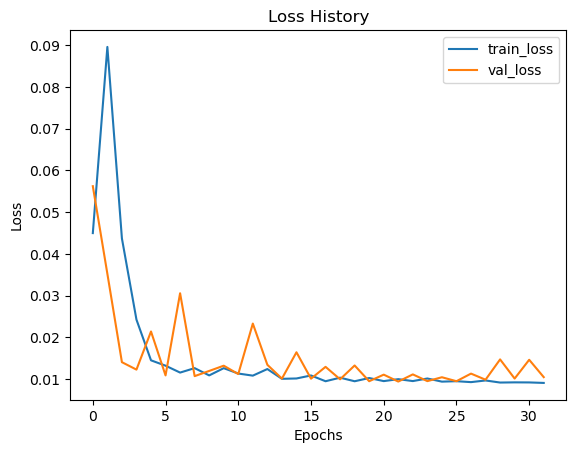

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

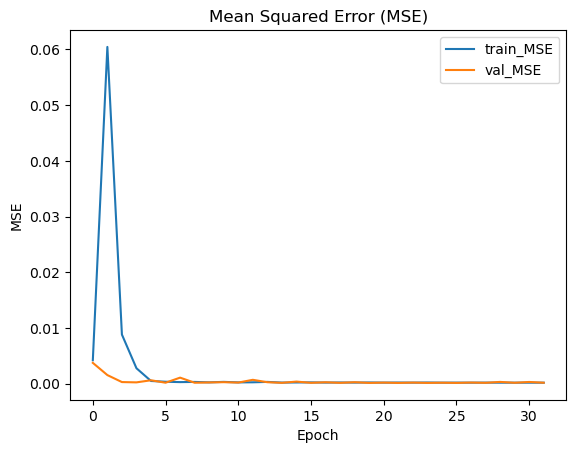

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

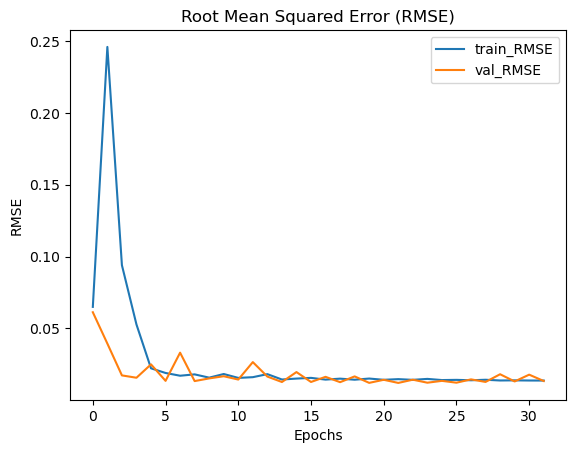

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

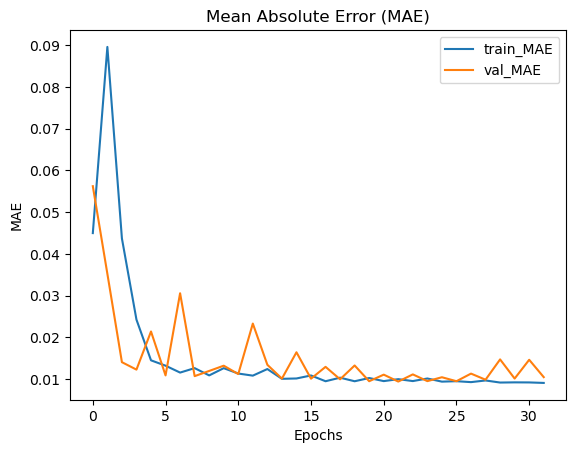

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

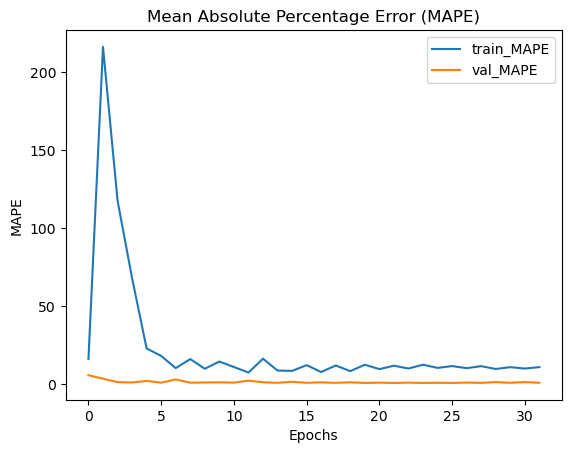

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:01:34.857560: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


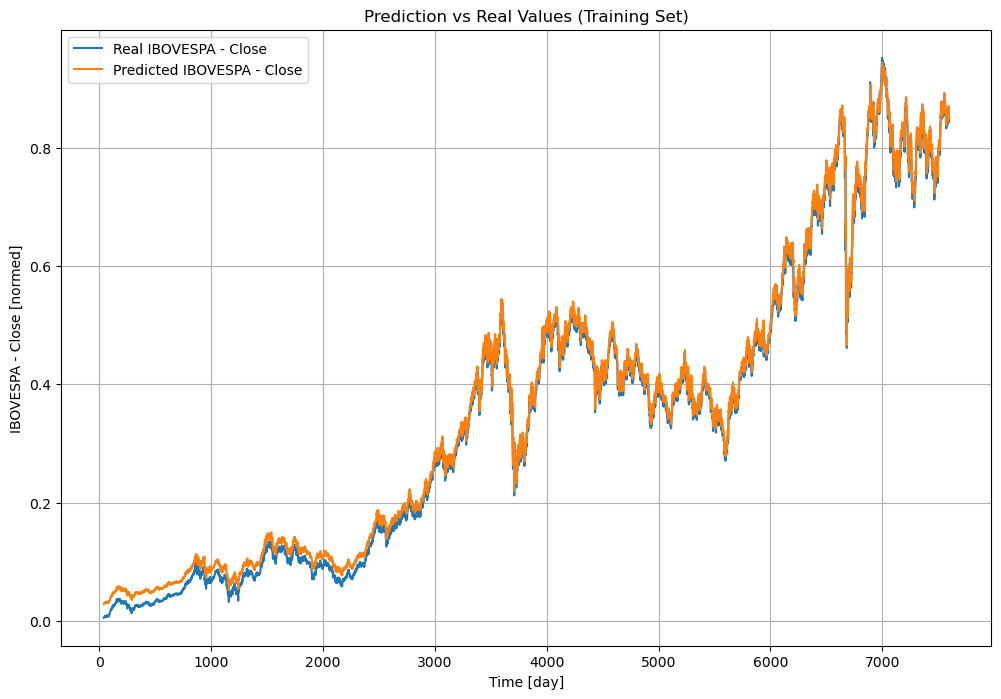

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


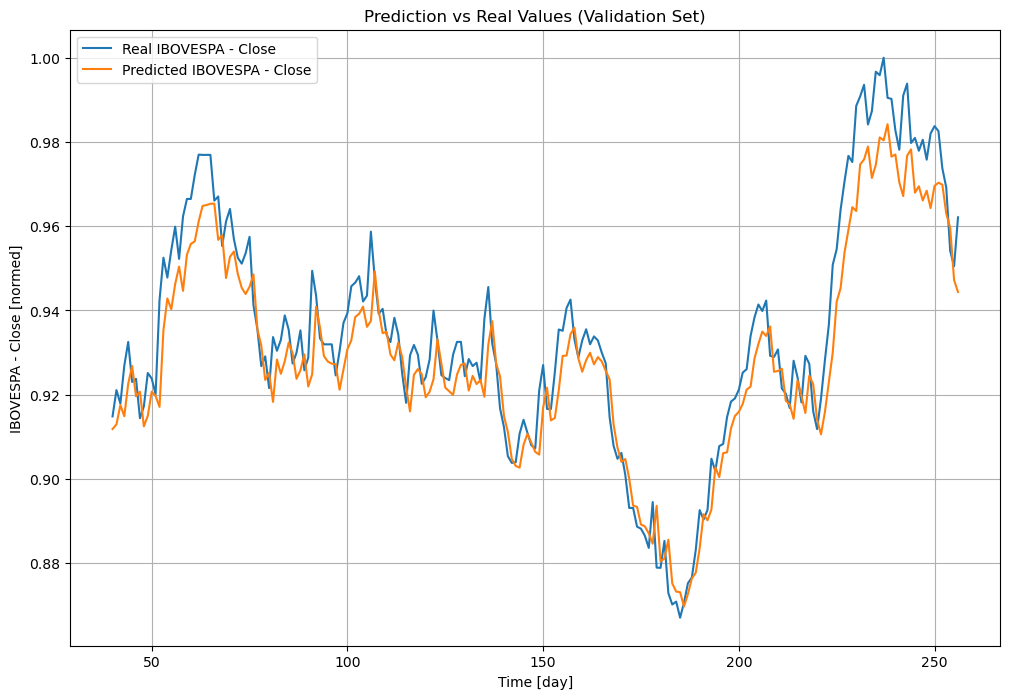

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


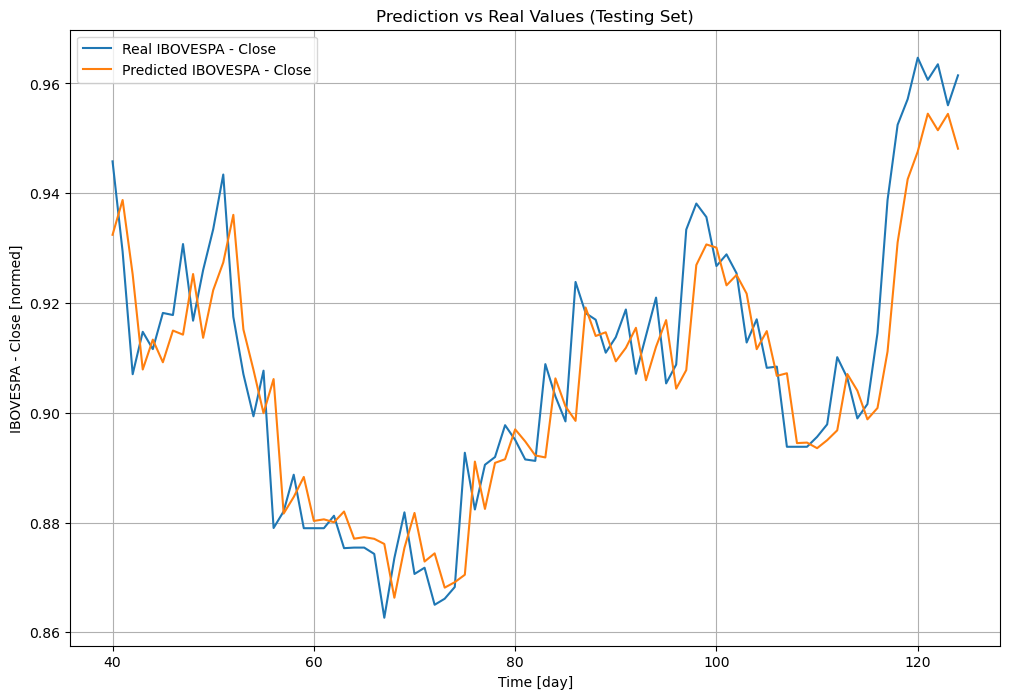

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

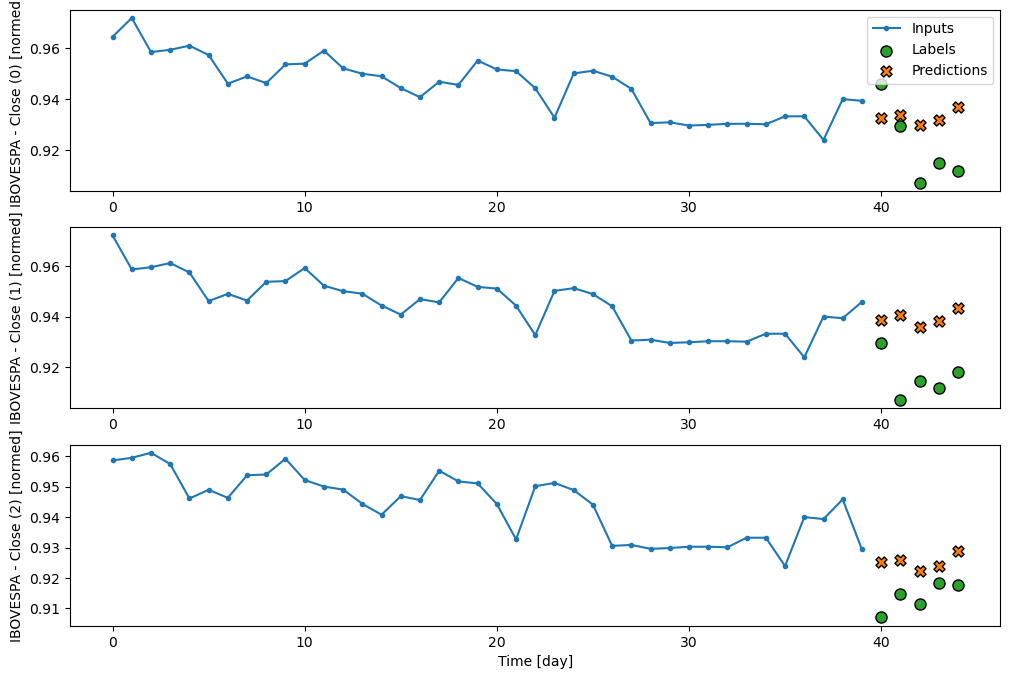

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:33s:176ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[[0.9324298 , 0.9324298 , 0.9324298 , ..., 0.9324298 ,
         0.9324298 , 0.9324298 ],
        [0.9338647 , 0.9338647 , 0.9338647 , ..., 0.9338647 ,
         0.9338647 , 0.9338647 ],
        [0.9296531 , 0.9296531 , 0.9296531 , ..., 0.9296531 ,
         0.9296531 , 0.9296531 ],
        [0.9318726 , 0.9318726 , 0.9318726 , ..., 0.9318726 ,
         0.9318726 , 0.9318726 ],
        [0.9367987 , 0.9367987 , 0.9367987 , ..., 0.9367987 ,
         0.93564487, 0.93564487]],

       [[0.9387675 , 0.9387675 , 0.9387675 , ..., 0.9387675 ,
         0.9387675 , 0.9387675 ],
        [0.9404789 , 0.9404789 , 0.9404789 , ..., 0.9404789 ,
         0.9404789 , 0.9404789 ],
        [0.936058  , 0.936058  , 0.936058  , ..., 0.936058  ,
         0.936058  , 0.936058  ],
        [0.938384  , 0.938384  , 0.938384  , ..., 0.938384  ,
         0.938384  , 0.938384  ],
        [0.94339305, 0.94339305, 0.94339305, ..., 0.94339305,
         0.9422184 , 0.9422184 ]],

       [[0.92520654, 0.92520654, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')